# Reinforcement Learning 

* Optimizing to find the best possible method and earn maximum rewards
* **Model free Learning:** Learning based on interaction where environment is unknown
* **Model based learning:** Prior knowledge of environment
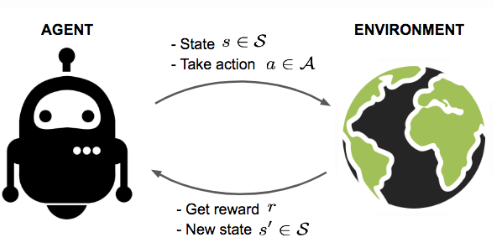
* Agent: Learner and decision maker
* Finite Markov Decision Processes (MDPs): Sequential decision making, where actions influence immediate rewards as well as future rewards (delayed reward) 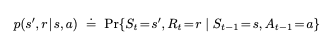
                                    S0, A0, R1, S1, A1, R2, S2, A2, R3,... !
* Policy: Mapping a state to probability of selecting an action π(a|s)
* Rewards 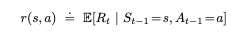
* Return 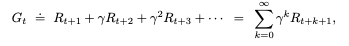
* Value function: Expectation of returns for a state s, while policy π is followed 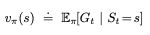
* action-value function:  value of taking action a in state s while policy π is followed 

**Target:** to find optimal policy i.e maximize q(s,a)

**Homer and Bart (Simpsons ^‿^)**

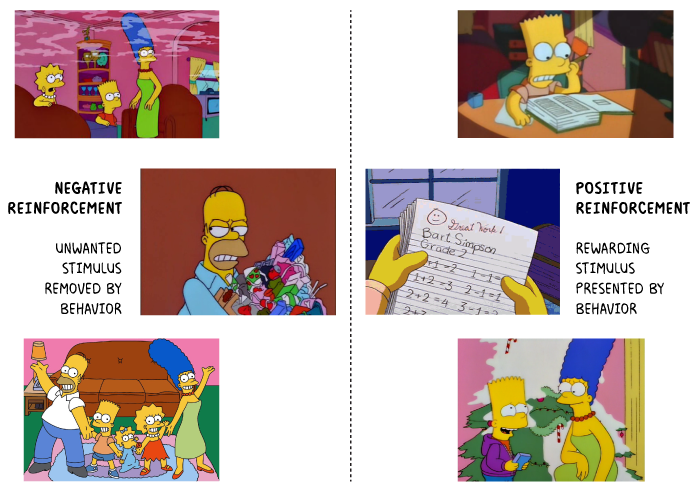


# OpenAI Gym

Website: https://gym.openai.com/

* Gym provides environment, for which we can develop different algorithms for agent and compare the learning curves
* Compatible with Tensorflow and PyTorch
* Can also develop custom environments

In [1]:
#!pip install gym
#!apt-get install -y xvfb python-opengl > /dev/null 2>&1
#!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from collections import defaultdict

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

## CartPole Environment

* A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track, with the pendulum upright
* Control: Apply force +1 or -1 to the cart 
* Goal: Prevent pendulum from falling over
* Reward: A reward of +1 is provided for every timestep that the pole remains upright.
* End of episode: Pole is > 15 degrees from vertical or the cart moves > 2.4 units from the center.

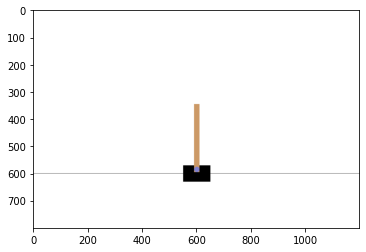

In [2]:
#define environment and reset
env = gym.make("CartPole-v0")
env.reset() 
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

In [ ]:
for i in range(50000):
  #valid format of actionparameters
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  # obs - next state
  # reward - reward from previous action
  # done - goal is achieved or time to reset env
  # info - dictionary for any debugging if reqd. 
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

All RL techniques are concerned with synthesizing a policy,π, for autononmouscontrol.  To achieve this we address two subproblems:

* **policy evaluation (Eval):** (also called prediction):  given a policy,π, obtain the associated value function (i.e.,vπ(s) or qπ(s,a))
* **policy  improvement  (Impr):**  given  a  policy,π k,  synthesize  an  improved policy,π(k+1), whose value function exceeds that of the k-th policy


**Generalised Policy Iterations:**
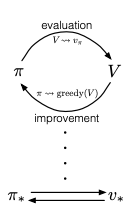

**On-Policy**: On Policy learning, we are executing GPI to identify the optimal control policy, pi_*, and we're using the instantaneous policy, pi_k, as the behaviour generation policy

**Off-Policy**: we have two policies of interest, pi and b. Pi is the policy we are trying to solve for in GPI -- the optimal policy that will allow our agent to control the environment optimally. Policy b is a behaviour generation ("exploratory") policy
=>freedom to sample the SxA space

## Monte Carlo Control
Model is unknown, and we sample rewards and average them to estimate return and action-value function

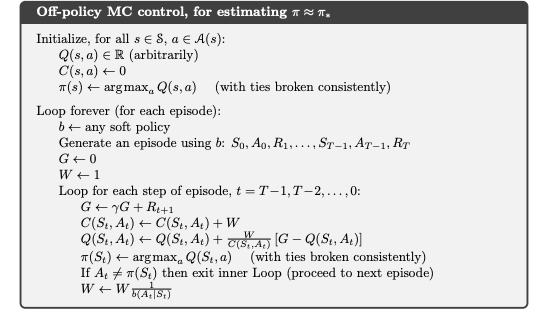

In [4]:
#discretize env states
def get_state_indices(state, num_states=100):
  all_states = np.array([np.linspace(-2.4, 2.4, num_states), np.linspace(-10, 10, num_states), np.linspace(-0.209, 0.209, num_states), np.linspace(-10, 10, num_states)])
  return tuple((np.abs(all_states[i,:] - state[i])).argmin() for i in range(len(state)))

def generate_episode(env, num_states, max_iterations=50000):
  state = env.reset() # Get first state
  episode = []
  for _ in range(max_iterations):
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    episode.append((get_state_indices(state, num_states), action, reward))
    if done:
      break
    state = next_state
  return episode

def off_policy_mc_control(env, num_states, num_episodes, gamma):
  Q = defaultdict(int)
  C = defaultdict(int)
  pi = {}

  for i in range(num_episodes):
    print("On Episode {}".format(i))
    episode = generate_episode(env, num_states)
    G, W = 0, 1
    for state_action_reward in reversed(episode):
      state, action, reward = state_action_reward
      G += gamma*G + reward
      state_action = state + (action,)
      C[state_action] += W
      Q[state_action] += W/C[state_action]*(G - Q[state_action])
      pi[state] = 0 if Q[state + (0,)] > Q[state + (1,)] else 1
      if not action == pi[state]:
        break
      W *= 2 # This assumes b randomly chooses one action or the other uniformly

  return pi

env = gym.make("CartPole-v0")
num_states = 500
num_episodes = 150000
gamma = 0.9
pi = off_policy_mc_control(env, num_states, num_episodes, gamma)

On Episode 0
On Episode 1
On Episode 2
On Episode 3
On Episode 4
On Episode 5
On Episode 6
On Episode 7
On Episode 8
On Episode 9
On Episode 10
On Episode 11
On Episode 12
On Episode 13
On Episode 14
On Episode 15
On Episode 16
On Episode 17
On Episode 18
On Episode 19
On Episode 20
On Episode 21
On Episode 22
On Episode 23
On Episode 24
On Episode 25
On Episode 26
On Episode 27
On Episode 28
On Episode 29
On Episode 30
On Episode 31
On Episode 32
On Episode 33
On Episode 34
On Episode 35
On Episode 36
On Episode 37
On Episode 38
On Episode 39
On Episode 40
On Episode 41
On Episode 42
On Episode 43
On Episode 44
On Episode 45
On Episode 46
On Episode 47
On Episode 48
On Episode 49
On Episode 50
On Episode 51
On Episode 52
On Episode 53
On Episode 54
On Episode 55
On Episode 56
On Episode 57
On Episode 58
On Episode 59
On Episode 60
On Episode 61
On Episode 62
On Episode 63
On Episode 64
On Episode 65
On Episode 66
On Episode 67
On Episode 68
On Episode 69
On Episode 70
On Episode 71
On

On Episode 577
On Episode 578
On Episode 579
On Episode 580
On Episode 581
On Episode 582
On Episode 583
On Episode 584
On Episode 585
On Episode 586
On Episode 587
On Episode 588
On Episode 589
On Episode 590
On Episode 591
On Episode 592
On Episode 593
On Episode 594
On Episode 595
On Episode 596
On Episode 597
On Episode 598
On Episode 599
On Episode 600
On Episode 601
On Episode 602
On Episode 603
On Episode 604
On Episode 605
On Episode 606
On Episode 607
On Episode 608
On Episode 609
On Episode 610
On Episode 611
On Episode 612
On Episode 613
On Episode 614
On Episode 615
On Episode 616
On Episode 617
On Episode 618
On Episode 619
On Episode 620
On Episode 621
On Episode 622
On Episode 623
On Episode 624
On Episode 625
On Episode 626
On Episode 627
On Episode 628
On Episode 629
On Episode 630
On Episode 631
On Episode 632
On Episode 633
On Episode 634
On Episode 635
On Episode 636
On Episode 637
On Episode 638
On Episode 639
On Episode 640
On Episode 641
On Episode 642
On Episode

On Episode 1123
On Episode 1124
On Episode 1125
On Episode 1126
On Episode 1127
On Episode 1128
On Episode 1129
On Episode 1130
On Episode 1131
On Episode 1132
On Episode 1133
On Episode 1134
On Episode 1135
On Episode 1136
On Episode 1137
On Episode 1138
On Episode 1139
On Episode 1140
On Episode 1141
On Episode 1142
On Episode 1143
On Episode 1144
On Episode 1145
On Episode 1146
On Episode 1147
On Episode 1148
On Episode 1149
On Episode 1150
On Episode 1151
On Episode 1152
On Episode 1153
On Episode 1154
On Episode 1155
On Episode 1156
On Episode 1157
On Episode 1158
On Episode 1159
On Episode 1160
On Episode 1161
On Episode 1162
On Episode 1163
On Episode 1164
On Episode 1165
On Episode 1166
On Episode 1167
On Episode 1168
On Episode 1169
On Episode 1170
On Episode 1171
On Episode 1172
On Episode 1173
On Episode 1174
On Episode 1175
On Episode 1176
On Episode 1177
On Episode 1178
On Episode 1179
On Episode 1180
On Episode 1181
On Episode 1182
On Episode 1183
On Episode 1184
On Episo

On Episode 1661
On Episode 1662
On Episode 1663
On Episode 1664
On Episode 1665
On Episode 1666
On Episode 1667
On Episode 1668
On Episode 1669
On Episode 1670
On Episode 1671
On Episode 1672
On Episode 1673
On Episode 1674
On Episode 1675
On Episode 1676
On Episode 1677
On Episode 1678
On Episode 1679
On Episode 1680
On Episode 1681
On Episode 1682
On Episode 1683
On Episode 1684
On Episode 1685
On Episode 1686
On Episode 1687
On Episode 1688
On Episode 1689
On Episode 1690
On Episode 1691
On Episode 1692
On Episode 1693
On Episode 1694
On Episode 1695
On Episode 1696
On Episode 1697
On Episode 1698
On Episode 1699
On Episode 1700
On Episode 1701
On Episode 1702
On Episode 1703
On Episode 1704
On Episode 1705
On Episode 1706
On Episode 1707
On Episode 1708
On Episode 1709
On Episode 1710
On Episode 1711
On Episode 1712
On Episode 1713
On Episode 1714
On Episode 1715
On Episode 1716
On Episode 1717
On Episode 1718
On Episode 1719
On Episode 1720
On Episode 1721
On Episode 1722
On Episo

On Episode 2179
On Episode 2180
On Episode 2181
On Episode 2182
On Episode 2183
On Episode 2184
On Episode 2185
On Episode 2186
On Episode 2187
On Episode 2188
On Episode 2189
On Episode 2190
On Episode 2191
On Episode 2192
On Episode 2193
On Episode 2194
On Episode 2195
On Episode 2196
On Episode 2197
On Episode 2198
On Episode 2199
On Episode 2200
On Episode 2201
On Episode 2202
On Episode 2203
On Episode 2204
On Episode 2205
On Episode 2206
On Episode 2207
On Episode 2208
On Episode 2209
On Episode 2210
On Episode 2211
On Episode 2212
On Episode 2213
On Episode 2214
On Episode 2215
On Episode 2216
On Episode 2217
On Episode 2218
On Episode 2219
On Episode 2220
On Episode 2221
On Episode 2222
On Episode 2223
On Episode 2224
On Episode 2225
On Episode 2226
On Episode 2227
On Episode 2228
On Episode 2229
On Episode 2230
On Episode 2231
On Episode 2232
On Episode 2233
On Episode 2234
On Episode 2235
On Episode 2236
On Episode 2237
On Episode 2238
On Episode 2239
On Episode 2240
On Episo

On Episode 2694
On Episode 2695
On Episode 2696
On Episode 2697
On Episode 2698
On Episode 2699
On Episode 2700
On Episode 2701
On Episode 2702
On Episode 2703
On Episode 2704
On Episode 2705
On Episode 2706
On Episode 2707
On Episode 2708
On Episode 2709
On Episode 2710
On Episode 2711
On Episode 2712
On Episode 2713
On Episode 2714
On Episode 2715
On Episode 2716
On Episode 2717
On Episode 2718
On Episode 2719
On Episode 2720
On Episode 2721
On Episode 2722
On Episode 2723
On Episode 2724
On Episode 2725
On Episode 2726
On Episode 2727
On Episode 2728
On Episode 2729
On Episode 2730
On Episode 2731
On Episode 2732
On Episode 2733
On Episode 2734
On Episode 2735
On Episode 2736
On Episode 2737
On Episode 2738
On Episode 2739
On Episode 2740
On Episode 2741
On Episode 2742
On Episode 2743
On Episode 2744
On Episode 2745
On Episode 2746
On Episode 2747
On Episode 2748
On Episode 2749
On Episode 2750
On Episode 2751
On Episode 2752
On Episode 2753
On Episode 2754
On Episode 2755
On Episo

On Episode 3230
On Episode 3231
On Episode 3232
On Episode 3233
On Episode 3234
On Episode 3235
On Episode 3236
On Episode 3237
On Episode 3238
On Episode 3239
On Episode 3240
On Episode 3241
On Episode 3242
On Episode 3243
On Episode 3244
On Episode 3245
On Episode 3246
On Episode 3247
On Episode 3248
On Episode 3249
On Episode 3250
On Episode 3251
On Episode 3252
On Episode 3253
On Episode 3254
On Episode 3255
On Episode 3256
On Episode 3257
On Episode 3258
On Episode 3259
On Episode 3260
On Episode 3261
On Episode 3262
On Episode 3263
On Episode 3264
On Episode 3265
On Episode 3266
On Episode 3267
On Episode 3268
On Episode 3269
On Episode 3270
On Episode 3271
On Episode 3272
On Episode 3273
On Episode 3274
On Episode 3275
On Episode 3276
On Episode 3277
On Episode 3278
On Episode 3279
On Episode 3280
On Episode 3281
On Episode 3282
On Episode 3283
On Episode 3284
On Episode 3285
On Episode 3286
On Episode 3287
On Episode 3288
On Episode 3289
On Episode 3290
On Episode 3291
On Episo

On Episode 3747
On Episode 3748
On Episode 3749
On Episode 3750
On Episode 3751
On Episode 3752
On Episode 3753
On Episode 3754
On Episode 3755
On Episode 3756
On Episode 3757
On Episode 3758
On Episode 3759
On Episode 3760
On Episode 3761
On Episode 3762
On Episode 3763
On Episode 3764
On Episode 3765
On Episode 3766
On Episode 3767
On Episode 3768
On Episode 3769
On Episode 3770
On Episode 3771
On Episode 3772
On Episode 3773
On Episode 3774
On Episode 3775
On Episode 3776
On Episode 3777
On Episode 3778
On Episode 3779
On Episode 3780
On Episode 3781
On Episode 3782
On Episode 3783
On Episode 3784
On Episode 3785
On Episode 3786
On Episode 3787
On Episode 3788
On Episode 3789
On Episode 3790
On Episode 3791
On Episode 3792
On Episode 3793
On Episode 3794
On Episode 3795
On Episode 3796
On Episode 3797
On Episode 3798
On Episode 3799
On Episode 3800
On Episode 3801
On Episode 3802
On Episode 3803
On Episode 3804
On Episode 3805
On Episode 3806
On Episode 3807
On Episode 3808
On Episo

On Episode 4272
On Episode 4273
On Episode 4274
On Episode 4275
On Episode 4276
On Episode 4277
On Episode 4278
On Episode 4279
On Episode 4280
On Episode 4281
On Episode 4282
On Episode 4283
On Episode 4284
On Episode 4285
On Episode 4286
On Episode 4287
On Episode 4288
On Episode 4289
On Episode 4290
On Episode 4291
On Episode 4292
On Episode 4293
On Episode 4294
On Episode 4295
On Episode 4296
On Episode 4297
On Episode 4298
On Episode 4299
On Episode 4300
On Episode 4301
On Episode 4302
On Episode 4303
On Episode 4304
On Episode 4305
On Episode 4306
On Episode 4307
On Episode 4308
On Episode 4309
On Episode 4310
On Episode 4311
On Episode 4312
On Episode 4313
On Episode 4314
On Episode 4315
On Episode 4316
On Episode 4317
On Episode 4318
On Episode 4319
On Episode 4320
On Episode 4321
On Episode 4322
On Episode 4323
On Episode 4324
On Episode 4325
On Episode 4326
On Episode 4327
On Episode 4328
On Episode 4329
On Episode 4330
On Episode 4331
On Episode 4332
On Episode 4333
On Episo

On Episode 4788
On Episode 4789
On Episode 4790
On Episode 4791
On Episode 4792
On Episode 4793
On Episode 4794
On Episode 4795
On Episode 4796
On Episode 4797
On Episode 4798
On Episode 4799
On Episode 4800
On Episode 4801
On Episode 4802
On Episode 4803
On Episode 4804
On Episode 4805
On Episode 4806
On Episode 4807
On Episode 4808
On Episode 4809
On Episode 4810
On Episode 4811
On Episode 4812
On Episode 4813
On Episode 4814
On Episode 4815
On Episode 4816
On Episode 4817
On Episode 4818
On Episode 4819
On Episode 4820
On Episode 4821
On Episode 4822
On Episode 4823
On Episode 4824
On Episode 4825
On Episode 4826
On Episode 4827
On Episode 4828
On Episode 4829
On Episode 4830
On Episode 4831
On Episode 4832
On Episode 4833
On Episode 4834
On Episode 4835
On Episode 4836
On Episode 4837
On Episode 4838
On Episode 4839
On Episode 4840
On Episode 4841
On Episode 4842
On Episode 4843
On Episode 4844
On Episode 4845
On Episode 4846
On Episode 4847
On Episode 4848
On Episode 4849
On Episo

On Episode 5301
On Episode 5302
On Episode 5303
On Episode 5304
On Episode 5305
On Episode 5306
On Episode 5307
On Episode 5308
On Episode 5309
On Episode 5310
On Episode 5311
On Episode 5312
On Episode 5313
On Episode 5314
On Episode 5315
On Episode 5316
On Episode 5317
On Episode 5318
On Episode 5319
On Episode 5320
On Episode 5321
On Episode 5322
On Episode 5323
On Episode 5324
On Episode 5325
On Episode 5326
On Episode 5327
On Episode 5328
On Episode 5329
On Episode 5330
On Episode 5331
On Episode 5332
On Episode 5333
On Episode 5334
On Episode 5335
On Episode 5336
On Episode 5337
On Episode 5338
On Episode 5339
On Episode 5340
On Episode 5341
On Episode 5342
On Episode 5343
On Episode 5344
On Episode 5345
On Episode 5346
On Episode 5347
On Episode 5348
On Episode 5349
On Episode 5350
On Episode 5351
On Episode 5352
On Episode 5353
On Episode 5354
On Episode 5355
On Episode 5356
On Episode 5357
On Episode 5358
On Episode 5359
On Episode 5360
On Episode 5361
On Episode 5362
On Episo

On Episode 5828
On Episode 5829
On Episode 5830
On Episode 5831
On Episode 5832
On Episode 5833
On Episode 5834
On Episode 5835
On Episode 5836
On Episode 5837
On Episode 5838
On Episode 5839
On Episode 5840
On Episode 5841
On Episode 5842
On Episode 5843
On Episode 5844
On Episode 5845
On Episode 5846
On Episode 5847
On Episode 5848
On Episode 5849
On Episode 5850
On Episode 5851
On Episode 5852
On Episode 5853
On Episode 5854
On Episode 5855
On Episode 5856
On Episode 5857
On Episode 5858
On Episode 5859
On Episode 5860
On Episode 5861
On Episode 5862
On Episode 5863
On Episode 5864
On Episode 5865
On Episode 5866
On Episode 5867
On Episode 5868
On Episode 5869
On Episode 5870
On Episode 5871
On Episode 5872
On Episode 5873
On Episode 5874
On Episode 5875
On Episode 5876
On Episode 5877
On Episode 5878
On Episode 5879
On Episode 5880
On Episode 5881
On Episode 5882
On Episode 5883
On Episode 5884
On Episode 5885
On Episode 5886
On Episode 5887
On Episode 5888
On Episode 5889
On Episo

On Episode 6357
On Episode 6358
On Episode 6359
On Episode 6360
On Episode 6361
On Episode 6362
On Episode 6363
On Episode 6364
On Episode 6365
On Episode 6366
On Episode 6367
On Episode 6368
On Episode 6369
On Episode 6370
On Episode 6371
On Episode 6372
On Episode 6373
On Episode 6374
On Episode 6375
On Episode 6376
On Episode 6377
On Episode 6378
On Episode 6379
On Episode 6380
On Episode 6381
On Episode 6382
On Episode 6383
On Episode 6384
On Episode 6385
On Episode 6386
On Episode 6387
On Episode 6388
On Episode 6389
On Episode 6390
On Episode 6391
On Episode 6392
On Episode 6393
On Episode 6394
On Episode 6395
On Episode 6396
On Episode 6397
On Episode 6398
On Episode 6399
On Episode 6400
On Episode 6401
On Episode 6402
On Episode 6403
On Episode 6404
On Episode 6405
On Episode 6406
On Episode 6407
On Episode 6408
On Episode 6409
On Episode 6410
On Episode 6411
On Episode 6412
On Episode 6413
On Episode 6414
On Episode 6415
On Episode 6416
On Episode 6417
On Episode 6418
On Episo

On Episode 6876
On Episode 6877
On Episode 6878
On Episode 6879
On Episode 6880
On Episode 6881
On Episode 6882
On Episode 6883
On Episode 6884
On Episode 6885
On Episode 6886
On Episode 6887
On Episode 6888
On Episode 6889
On Episode 6890
On Episode 6891
On Episode 6892
On Episode 6893
On Episode 6894
On Episode 6895
On Episode 6896
On Episode 6897
On Episode 6898
On Episode 6899
On Episode 6900
On Episode 6901
On Episode 6902
On Episode 6903
On Episode 6904
On Episode 6905
On Episode 6906
On Episode 6907
On Episode 6908
On Episode 6909
On Episode 6910
On Episode 6911
On Episode 6912
On Episode 6913
On Episode 6914
On Episode 6915
On Episode 6916
On Episode 6917
On Episode 6918
On Episode 6919
On Episode 6920
On Episode 6921
On Episode 6922
On Episode 6923
On Episode 6924
On Episode 6925
On Episode 6926
On Episode 6927
On Episode 6928
On Episode 6929
On Episode 6930
On Episode 6931
On Episode 6932
On Episode 6933
On Episode 6934
On Episode 6935
On Episode 6936
On Episode 6937
On Episo

On Episode 7391
On Episode 7392
On Episode 7393
On Episode 7394
On Episode 7395
On Episode 7396
On Episode 7397
On Episode 7398
On Episode 7399
On Episode 7400
On Episode 7401
On Episode 7402
On Episode 7403
On Episode 7404
On Episode 7405
On Episode 7406
On Episode 7407
On Episode 7408
On Episode 7409
On Episode 7410
On Episode 7411
On Episode 7412
On Episode 7413
On Episode 7414
On Episode 7415
On Episode 7416
On Episode 7417
On Episode 7418
On Episode 7419
On Episode 7420
On Episode 7421
On Episode 7422
On Episode 7423
On Episode 7424
On Episode 7425
On Episode 7426
On Episode 7427
On Episode 7428
On Episode 7429
On Episode 7430
On Episode 7431
On Episode 7432
On Episode 7433
On Episode 7434
On Episode 7435
On Episode 7436
On Episode 7437
On Episode 7438
On Episode 7439
On Episode 7440
On Episode 7441
On Episode 7442
On Episode 7443
On Episode 7444
On Episode 7445
On Episode 7446
On Episode 7447
On Episode 7448
On Episode 7449
On Episode 7450
On Episode 7451
On Episode 7452
On Episo

On Episode 7924
On Episode 7925
On Episode 7926
On Episode 7927
On Episode 7928
On Episode 7929
On Episode 7930
On Episode 7931
On Episode 7932
On Episode 7933
On Episode 7934
On Episode 7935
On Episode 7936
On Episode 7937
On Episode 7938
On Episode 7939
On Episode 7940
On Episode 7941
On Episode 7942
On Episode 7943
On Episode 7944
On Episode 7945
On Episode 7946
On Episode 7947
On Episode 7948
On Episode 7949
On Episode 7950
On Episode 7951
On Episode 7952
On Episode 7953
On Episode 7954
On Episode 7955
On Episode 7956
On Episode 7957
On Episode 7958
On Episode 7959
On Episode 7960
On Episode 7961
On Episode 7962
On Episode 7963
On Episode 7964
On Episode 7965
On Episode 7966
On Episode 7967
On Episode 7968
On Episode 7969
On Episode 7970
On Episode 7971
On Episode 7972
On Episode 7973
On Episode 7974
On Episode 7975
On Episode 7976
On Episode 7977
On Episode 7978
On Episode 7979
On Episode 7980
On Episode 7981
On Episode 7982
On Episode 7983
On Episode 7984
On Episode 7985
On Episo

On Episode 8454
On Episode 8455
On Episode 8456
On Episode 8457
On Episode 8458
On Episode 8459
On Episode 8460
On Episode 8461
On Episode 8462
On Episode 8463
On Episode 8464
On Episode 8465
On Episode 8466
On Episode 8467
On Episode 8468
On Episode 8469
On Episode 8470
On Episode 8471
On Episode 8472
On Episode 8473
On Episode 8474
On Episode 8475
On Episode 8476
On Episode 8477
On Episode 8478
On Episode 8479
On Episode 8480
On Episode 8481
On Episode 8482
On Episode 8483
On Episode 8484
On Episode 8485
On Episode 8486
On Episode 8487
On Episode 8488
On Episode 8489
On Episode 8490
On Episode 8491
On Episode 8492
On Episode 8493
On Episode 8494
On Episode 8495
On Episode 8496
On Episode 8497
On Episode 8498
On Episode 8499
On Episode 8500
On Episode 8501
On Episode 8502
On Episode 8503
On Episode 8504
On Episode 8505
On Episode 8506
On Episode 8507
On Episode 8508
On Episode 8509
On Episode 8510
On Episode 8511
On Episode 8512
On Episode 8513
On Episode 8514
On Episode 8515
On Episo

On Episode 8984
On Episode 8985
On Episode 8986
On Episode 8987
On Episode 8988
On Episode 8989
On Episode 8990
On Episode 8991
On Episode 8992
On Episode 8993
On Episode 8994
On Episode 8995
On Episode 8996
On Episode 8997
On Episode 8998
On Episode 8999
On Episode 9000
On Episode 9001
On Episode 9002
On Episode 9003
On Episode 9004
On Episode 9005
On Episode 9006
On Episode 9007
On Episode 9008
On Episode 9009
On Episode 9010
On Episode 9011
On Episode 9012
On Episode 9013
On Episode 9014
On Episode 9015
On Episode 9016
On Episode 9017
On Episode 9018
On Episode 9019
On Episode 9020
On Episode 9021
On Episode 9022
On Episode 9023
On Episode 9024
On Episode 9025
On Episode 9026
On Episode 9027
On Episode 9028
On Episode 9029
On Episode 9030
On Episode 9031
On Episode 9032
On Episode 9033
On Episode 9034
On Episode 9035
On Episode 9036
On Episode 9037
On Episode 9038
On Episode 9039
On Episode 9040
On Episode 9041
On Episode 9042
On Episode 9043
On Episode 9044
On Episode 9045
On Episo

On Episode 9514
On Episode 9515
On Episode 9516
On Episode 9517
On Episode 9518
On Episode 9519
On Episode 9520
On Episode 9521
On Episode 9522
On Episode 9523
On Episode 9524
On Episode 9525
On Episode 9526
On Episode 9527
On Episode 9528
On Episode 9529
On Episode 9530
On Episode 9531
On Episode 9532
On Episode 9533
On Episode 9534
On Episode 9535
On Episode 9536
On Episode 9537
On Episode 9538
On Episode 9539
On Episode 9540
On Episode 9541
On Episode 9542
On Episode 9543
On Episode 9544
On Episode 9545
On Episode 9546
On Episode 9547
On Episode 9548
On Episode 9549
On Episode 9550
On Episode 9551
On Episode 9552
On Episode 9553
On Episode 9554
On Episode 9555
On Episode 9556
On Episode 9557
On Episode 9558
On Episode 9559
On Episode 9560
On Episode 9561
On Episode 9562
On Episode 9563
On Episode 9564
On Episode 9565
On Episode 9566
On Episode 9567
On Episode 9568
On Episode 9569
On Episode 9570
On Episode 9571
On Episode 9572
On Episode 9573
On Episode 9574
On Episode 9575
On Episo

On Episode 10049
On Episode 10050
On Episode 10051
On Episode 10052
On Episode 10053
On Episode 10054
On Episode 10055
On Episode 10056
On Episode 10057
On Episode 10058
On Episode 10059
On Episode 10060
On Episode 10061
On Episode 10062
On Episode 10063
On Episode 10064
On Episode 10065
On Episode 10066
On Episode 10067
On Episode 10068
On Episode 10069
On Episode 10070
On Episode 10071
On Episode 10072
On Episode 10073
On Episode 10074
On Episode 10075
On Episode 10076
On Episode 10077
On Episode 10078
On Episode 10079
On Episode 10080
On Episode 10081
On Episode 10082
On Episode 10083
On Episode 10084
On Episode 10085
On Episode 10086
On Episode 10087
On Episode 10088
On Episode 10089
On Episode 10090
On Episode 10091
On Episode 10092
On Episode 10093
On Episode 10094
On Episode 10095
On Episode 10096
On Episode 10097
On Episode 10098
On Episode 10099
On Episode 10100
On Episode 10101
On Episode 10102
On Episode 10103
On Episode 10104
On Episode 10105
On Episode 10106
On Episode 101

On Episode 10542
On Episode 10543
On Episode 10544
On Episode 10545
On Episode 10546
On Episode 10547
On Episode 10548
On Episode 10549
On Episode 10550
On Episode 10551
On Episode 10552
On Episode 10553
On Episode 10554
On Episode 10555
On Episode 10556
On Episode 10557
On Episode 10558
On Episode 10559
On Episode 10560
On Episode 10561
On Episode 10562
On Episode 10563
On Episode 10564
On Episode 10565
On Episode 10566
On Episode 10567
On Episode 10568
On Episode 10569
On Episode 10570
On Episode 10571
On Episode 10572
On Episode 10573
On Episode 10574
On Episode 10575
On Episode 10576
On Episode 10577
On Episode 10578
On Episode 10579
On Episode 10580
On Episode 10581
On Episode 10582
On Episode 10583
On Episode 10584
On Episode 10585
On Episode 10586
On Episode 10587
On Episode 10588
On Episode 10589
On Episode 10590
On Episode 10591
On Episode 10592
On Episode 10593
On Episode 10594
On Episode 10595
On Episode 10596
On Episode 10597
On Episode 10598
On Episode 10599
On Episode 106

On Episode 11025
On Episode 11026
On Episode 11027
On Episode 11028
On Episode 11029
On Episode 11030
On Episode 11031
On Episode 11032
On Episode 11033
On Episode 11034
On Episode 11035
On Episode 11036
On Episode 11037
On Episode 11038
On Episode 11039
On Episode 11040
On Episode 11041
On Episode 11042
On Episode 11043
On Episode 11044
On Episode 11045
On Episode 11046
On Episode 11047
On Episode 11048
On Episode 11049
On Episode 11050
On Episode 11051
On Episode 11052
On Episode 11053
On Episode 11054
On Episode 11055
On Episode 11056
On Episode 11057
On Episode 11058
On Episode 11059
On Episode 11060
On Episode 11061
On Episode 11062
On Episode 11063
On Episode 11064
On Episode 11065
On Episode 11066
On Episode 11067
On Episode 11068
On Episode 11069
On Episode 11070
On Episode 11071
On Episode 11072
On Episode 11073
On Episode 11074
On Episode 11075
On Episode 11076
On Episode 11077
On Episode 11078
On Episode 11079
On Episode 11080
On Episode 11081
On Episode 11082
On Episode 110

On Episode 11536
On Episode 11537
On Episode 11538
On Episode 11539
On Episode 11540
On Episode 11541
On Episode 11542
On Episode 11543
On Episode 11544
On Episode 11545
On Episode 11546
On Episode 11547
On Episode 11548
On Episode 11549
On Episode 11550
On Episode 11551
On Episode 11552
On Episode 11553
On Episode 11554
On Episode 11555
On Episode 11556
On Episode 11557
On Episode 11558
On Episode 11559
On Episode 11560
On Episode 11561
On Episode 11562
On Episode 11563
On Episode 11564
On Episode 11565
On Episode 11566
On Episode 11567
On Episode 11568
On Episode 11569
On Episode 11570
On Episode 11571
On Episode 11572
On Episode 11573
On Episode 11574
On Episode 11575
On Episode 11576
On Episode 11577
On Episode 11578
On Episode 11579
On Episode 11580
On Episode 11581
On Episode 11582
On Episode 11583
On Episode 11584
On Episode 11585
On Episode 11586
On Episode 11587
On Episode 11588
On Episode 11589
On Episode 11590
On Episode 11591
On Episode 11592
On Episode 11593
On Episode 115

On Episode 12022
On Episode 12023
On Episode 12024
On Episode 12025
On Episode 12026
On Episode 12027
On Episode 12028
On Episode 12029
On Episode 12030
On Episode 12031
On Episode 12032
On Episode 12033
On Episode 12034
On Episode 12035
On Episode 12036
On Episode 12037
On Episode 12038
On Episode 12039
On Episode 12040
On Episode 12041
On Episode 12042
On Episode 12043
On Episode 12044
On Episode 12045
On Episode 12046
On Episode 12047
On Episode 12048
On Episode 12049
On Episode 12050
On Episode 12051
On Episode 12052
On Episode 12053
On Episode 12054
On Episode 12055
On Episode 12056
On Episode 12057
On Episode 12058
On Episode 12059
On Episode 12060
On Episode 12061
On Episode 12062
On Episode 12063
On Episode 12064
On Episode 12065
On Episode 12066
On Episode 12067
On Episode 12068
On Episode 12069
On Episode 12070
On Episode 12071
On Episode 12072
On Episode 12073
On Episode 12074
On Episode 12075
On Episode 12076
On Episode 12077
On Episode 12078
On Episode 12079
On Episode 120

On Episode 12534
On Episode 12535
On Episode 12536
On Episode 12537
On Episode 12538
On Episode 12539
On Episode 12540
On Episode 12541
On Episode 12542
On Episode 12543
On Episode 12544
On Episode 12545
On Episode 12546
On Episode 12547
On Episode 12548
On Episode 12549
On Episode 12550
On Episode 12551
On Episode 12552
On Episode 12553
On Episode 12554
On Episode 12555
On Episode 12556
On Episode 12557
On Episode 12558
On Episode 12559
On Episode 12560
On Episode 12561
On Episode 12562
On Episode 12563
On Episode 12564
On Episode 12565
On Episode 12566
On Episode 12567
On Episode 12568
On Episode 12569
On Episode 12570
On Episode 12571
On Episode 12572
On Episode 12573
On Episode 12574
On Episode 12575
On Episode 12576
On Episode 12577
On Episode 12578
On Episode 12579
On Episode 12580
On Episode 12581
On Episode 12582
On Episode 12583
On Episode 12584
On Episode 12585
On Episode 12586
On Episode 12587
On Episode 12588
On Episode 12589
On Episode 12590
On Episode 12591
On Episode 125

On Episode 13046
On Episode 13047
On Episode 13048
On Episode 13049
On Episode 13050
On Episode 13051
On Episode 13052
On Episode 13053
On Episode 13054
On Episode 13055
On Episode 13056
On Episode 13057
On Episode 13058
On Episode 13059
On Episode 13060
On Episode 13061
On Episode 13062
On Episode 13063
On Episode 13064
On Episode 13065
On Episode 13066
On Episode 13067
On Episode 13068
On Episode 13069
On Episode 13070
On Episode 13071
On Episode 13072
On Episode 13073
On Episode 13074
On Episode 13075
On Episode 13076
On Episode 13077
On Episode 13078
On Episode 13079
On Episode 13080
On Episode 13081
On Episode 13082
On Episode 13083
On Episode 13084
On Episode 13085
On Episode 13086
On Episode 13087
On Episode 13088
On Episode 13089
On Episode 13090
On Episode 13091
On Episode 13092
On Episode 13093
On Episode 13094
On Episode 13095
On Episode 13096
On Episode 13097
On Episode 13098
On Episode 13099
On Episode 13100
On Episode 13101
On Episode 13102
On Episode 13103
On Episode 131

On Episode 13563
On Episode 13564
On Episode 13565
On Episode 13566
On Episode 13567
On Episode 13568
On Episode 13569
On Episode 13570
On Episode 13571
On Episode 13572
On Episode 13573
On Episode 13574
On Episode 13575
On Episode 13576
On Episode 13577
On Episode 13578
On Episode 13579
On Episode 13580
On Episode 13581
On Episode 13582
On Episode 13583
On Episode 13584
On Episode 13585
On Episode 13586
On Episode 13587
On Episode 13588
On Episode 13589
On Episode 13590
On Episode 13591
On Episode 13592
On Episode 13593
On Episode 13594
On Episode 13595
On Episode 13596
On Episode 13597
On Episode 13598
On Episode 13599
On Episode 13600
On Episode 13601
On Episode 13602
On Episode 13603
On Episode 13604
On Episode 13605
On Episode 13606
On Episode 13607
On Episode 13608
On Episode 13609
On Episode 13610
On Episode 13611
On Episode 13612
On Episode 13613
On Episode 13614
On Episode 13615
On Episode 13616
On Episode 13617
On Episode 13618
On Episode 13619
On Episode 13620
On Episode 136

On Episode 14071
On Episode 14072
On Episode 14073
On Episode 14074
On Episode 14075
On Episode 14076
On Episode 14077
On Episode 14078
On Episode 14079
On Episode 14080
On Episode 14081
On Episode 14082
On Episode 14083
On Episode 14084
On Episode 14085
On Episode 14086
On Episode 14087
On Episode 14088
On Episode 14089
On Episode 14090
On Episode 14091
On Episode 14092
On Episode 14093
On Episode 14094
On Episode 14095
On Episode 14096
On Episode 14097
On Episode 14098
On Episode 14099
On Episode 14100
On Episode 14101
On Episode 14102
On Episode 14103
On Episode 14104
On Episode 14105
On Episode 14106
On Episode 14107
On Episode 14108
On Episode 14109
On Episode 14110
On Episode 14111
On Episode 14112
On Episode 14113
On Episode 14114
On Episode 14115
On Episode 14116
On Episode 14117
On Episode 14118
On Episode 14119
On Episode 14120
On Episode 14121
On Episode 14122
On Episode 14123
On Episode 14124
On Episode 14125
On Episode 14126
On Episode 14127
On Episode 14128
On Episode 141

On Episode 14559
On Episode 14560
On Episode 14561
On Episode 14562
On Episode 14563
On Episode 14564
On Episode 14565
On Episode 14566
On Episode 14567
On Episode 14568
On Episode 14569
On Episode 14570
On Episode 14571
On Episode 14572
On Episode 14573
On Episode 14574
On Episode 14575
On Episode 14576
On Episode 14577
On Episode 14578
On Episode 14579
On Episode 14580
On Episode 14581
On Episode 14582
On Episode 14583
On Episode 14584
On Episode 14585
On Episode 14586
On Episode 14587
On Episode 14588
On Episode 14589
On Episode 14590
On Episode 14591
On Episode 14592
On Episode 14593
On Episode 14594
On Episode 14595
On Episode 14596
On Episode 14597
On Episode 14598
On Episode 14599
On Episode 14600
On Episode 14601
On Episode 14602
On Episode 14603
On Episode 14604
On Episode 14605
On Episode 14606
On Episode 14607
On Episode 14608
On Episode 14609
On Episode 14610
On Episode 14611
On Episode 14612
On Episode 14613
On Episode 14614
On Episode 14615
On Episode 14616
On Episode 146

On Episode 15051
On Episode 15052
On Episode 15053
On Episode 15054
On Episode 15055
On Episode 15056
On Episode 15057
On Episode 15058
On Episode 15059
On Episode 15060
On Episode 15061
On Episode 15062
On Episode 15063
On Episode 15064
On Episode 15065
On Episode 15066
On Episode 15067
On Episode 15068
On Episode 15069
On Episode 15070
On Episode 15071
On Episode 15072
On Episode 15073
On Episode 15074
On Episode 15075
On Episode 15076
On Episode 15077
On Episode 15078
On Episode 15079
On Episode 15080
On Episode 15081
On Episode 15082
On Episode 15083
On Episode 15084
On Episode 15085
On Episode 15086
On Episode 15087
On Episode 15088
On Episode 15089
On Episode 15090
On Episode 15091
On Episode 15092
On Episode 15093
On Episode 15094
On Episode 15095
On Episode 15096
On Episode 15097
On Episode 15098
On Episode 15099
On Episode 15100
On Episode 15101
On Episode 15102
On Episode 15103
On Episode 15104
On Episode 15105
On Episode 15106
On Episode 15107
On Episode 15108
On Episode 151

On Episode 15562
On Episode 15563
On Episode 15564
On Episode 15565
On Episode 15566
On Episode 15567
On Episode 15568
On Episode 15569
On Episode 15570
On Episode 15571
On Episode 15572
On Episode 15573
On Episode 15574
On Episode 15575
On Episode 15576
On Episode 15577
On Episode 15578
On Episode 15579
On Episode 15580
On Episode 15581
On Episode 15582
On Episode 15583
On Episode 15584
On Episode 15585
On Episode 15586
On Episode 15587
On Episode 15588
On Episode 15589
On Episode 15590
On Episode 15591
On Episode 15592
On Episode 15593
On Episode 15594
On Episode 15595
On Episode 15596
On Episode 15597
On Episode 15598
On Episode 15599
On Episode 15600
On Episode 15601
On Episode 15602
On Episode 15603
On Episode 15604
On Episode 15605
On Episode 15606
On Episode 15607
On Episode 15608
On Episode 15609
On Episode 15610
On Episode 15611
On Episode 15612
On Episode 15613
On Episode 15614
On Episode 15615
On Episode 15616
On Episode 15617
On Episode 15618
On Episode 15619
On Episode 156

On Episode 16061
On Episode 16062
On Episode 16063
On Episode 16064
On Episode 16065
On Episode 16066
On Episode 16067
On Episode 16068
On Episode 16069
On Episode 16070
On Episode 16071
On Episode 16072
On Episode 16073
On Episode 16074
On Episode 16075
On Episode 16076
On Episode 16077
On Episode 16078
On Episode 16079
On Episode 16080
On Episode 16081
On Episode 16082
On Episode 16083
On Episode 16084
On Episode 16085
On Episode 16086
On Episode 16087
On Episode 16088
On Episode 16089
On Episode 16090
On Episode 16091
On Episode 16092
On Episode 16093
On Episode 16094
On Episode 16095
On Episode 16096
On Episode 16097
On Episode 16098
On Episode 16099
On Episode 16100
On Episode 16101
On Episode 16102
On Episode 16103
On Episode 16104
On Episode 16105
On Episode 16106
On Episode 16107
On Episode 16108
On Episode 16109
On Episode 16110
On Episode 16111
On Episode 16112
On Episode 16113
On Episode 16114
On Episode 16115
On Episode 16116
On Episode 16117
On Episode 16118
On Episode 161

On Episode 16551
On Episode 16552
On Episode 16553
On Episode 16554
On Episode 16555
On Episode 16556
On Episode 16557
On Episode 16558
On Episode 16559
On Episode 16560
On Episode 16561
On Episode 16562
On Episode 16563
On Episode 16564
On Episode 16565
On Episode 16566
On Episode 16567
On Episode 16568
On Episode 16569
On Episode 16570
On Episode 16571
On Episode 16572
On Episode 16573
On Episode 16574
On Episode 16575
On Episode 16576
On Episode 16577
On Episode 16578
On Episode 16579
On Episode 16580
On Episode 16581
On Episode 16582
On Episode 16583
On Episode 16584
On Episode 16585
On Episode 16586
On Episode 16587
On Episode 16588
On Episode 16589
On Episode 16590
On Episode 16591
On Episode 16592
On Episode 16593
On Episode 16594
On Episode 16595
On Episode 16596
On Episode 16597
On Episode 16598
On Episode 16599
On Episode 16600
On Episode 16601
On Episode 16602
On Episode 16603
On Episode 16604
On Episode 16605
On Episode 16606
On Episode 16607
On Episode 16608
On Episode 166

On Episode 17059
On Episode 17060
On Episode 17061
On Episode 17062
On Episode 17063
On Episode 17064
On Episode 17065
On Episode 17066
On Episode 17067
On Episode 17068
On Episode 17069
On Episode 17070
On Episode 17071
On Episode 17072
On Episode 17073
On Episode 17074
On Episode 17075
On Episode 17076
On Episode 17077
On Episode 17078
On Episode 17079
On Episode 17080
On Episode 17081
On Episode 17082
On Episode 17083
On Episode 17084
On Episode 17085
On Episode 17086
On Episode 17087
On Episode 17088
On Episode 17089
On Episode 17090
On Episode 17091
On Episode 17092
On Episode 17093
On Episode 17094
On Episode 17095
On Episode 17096
On Episode 17097
On Episode 17098
On Episode 17099
On Episode 17100
On Episode 17101
On Episode 17102
On Episode 17103
On Episode 17104
On Episode 17105
On Episode 17106
On Episode 17107
On Episode 17108
On Episode 17109
On Episode 17110
On Episode 17111
On Episode 17112
On Episode 17113
On Episode 17114
On Episode 17115
On Episode 17116
On Episode 171

On Episode 17550
On Episode 17551
On Episode 17552
On Episode 17553
On Episode 17554
On Episode 17555
On Episode 17556
On Episode 17557
On Episode 17558
On Episode 17559
On Episode 17560
On Episode 17561
On Episode 17562
On Episode 17563
On Episode 17564
On Episode 17565
On Episode 17566
On Episode 17567
On Episode 17568
On Episode 17569
On Episode 17570
On Episode 17571
On Episode 17572
On Episode 17573
On Episode 17574
On Episode 17575
On Episode 17576
On Episode 17577
On Episode 17578
On Episode 17579
On Episode 17580
On Episode 17581
On Episode 17582
On Episode 17583
On Episode 17584
On Episode 17585
On Episode 17586
On Episode 17587
On Episode 17588
On Episode 17589
On Episode 17590
On Episode 17591
On Episode 17592
On Episode 17593
On Episode 17594
On Episode 17595
On Episode 17596
On Episode 17597
On Episode 17598
On Episode 17599
On Episode 17600
On Episode 17601
On Episode 17602
On Episode 17603
On Episode 17604
On Episode 17605
On Episode 17606
On Episode 17607
On Episode 176

On Episode 18053
On Episode 18054
On Episode 18055
On Episode 18056
On Episode 18057
On Episode 18058
On Episode 18059
On Episode 18060
On Episode 18061
On Episode 18062
On Episode 18063
On Episode 18064
On Episode 18065
On Episode 18066
On Episode 18067
On Episode 18068
On Episode 18069
On Episode 18070
On Episode 18071
On Episode 18072
On Episode 18073
On Episode 18074
On Episode 18075
On Episode 18076
On Episode 18077
On Episode 18078
On Episode 18079
On Episode 18080
On Episode 18081
On Episode 18082
On Episode 18083
On Episode 18084
On Episode 18085
On Episode 18086
On Episode 18087
On Episode 18088
On Episode 18089
On Episode 18090
On Episode 18091
On Episode 18092
On Episode 18093
On Episode 18094
On Episode 18095
On Episode 18096
On Episode 18097
On Episode 18098
On Episode 18099
On Episode 18100
On Episode 18101
On Episode 18102
On Episode 18103
On Episode 18104
On Episode 18105
On Episode 18106
On Episode 18107
On Episode 18108
On Episode 18109
On Episode 18110
On Episode 181

On Episode 18537
On Episode 18538
On Episode 18539
On Episode 18540
On Episode 18541
On Episode 18542
On Episode 18543
On Episode 18544
On Episode 18545
On Episode 18546
On Episode 18547
On Episode 18548
On Episode 18549
On Episode 18550
On Episode 18551
On Episode 18552
On Episode 18553
On Episode 18554
On Episode 18555
On Episode 18556
On Episode 18557
On Episode 18558
On Episode 18559
On Episode 18560
On Episode 18561
On Episode 18562
On Episode 18563
On Episode 18564
On Episode 18565
On Episode 18566
On Episode 18567
On Episode 18568
On Episode 18569
On Episode 18570
On Episode 18571
On Episode 18572
On Episode 18573
On Episode 18574
On Episode 18575
On Episode 18576
On Episode 18577
On Episode 18578
On Episode 18579
On Episode 18580
On Episode 18581
On Episode 18582
On Episode 18583
On Episode 18584
On Episode 18585
On Episode 18586
On Episode 18587
On Episode 18588
On Episode 18589
On Episode 18590
On Episode 18591
On Episode 18592
On Episode 18593
On Episode 18594
On Episode 185

On Episode 19026
On Episode 19027
On Episode 19028
On Episode 19029
On Episode 19030
On Episode 19031
On Episode 19032
On Episode 19033
On Episode 19034
On Episode 19035
On Episode 19036
On Episode 19037
On Episode 19038
On Episode 19039
On Episode 19040
On Episode 19041
On Episode 19042
On Episode 19043
On Episode 19044
On Episode 19045
On Episode 19046
On Episode 19047
On Episode 19048
On Episode 19049
On Episode 19050
On Episode 19051
On Episode 19052
On Episode 19053
On Episode 19054
On Episode 19055
On Episode 19056
On Episode 19057
On Episode 19058
On Episode 19059
On Episode 19060
On Episode 19061
On Episode 19062
On Episode 19063
On Episode 19064
On Episode 19065
On Episode 19066
On Episode 19067
On Episode 19068
On Episode 19069
On Episode 19070
On Episode 19071
On Episode 19072
On Episode 19073
On Episode 19074
On Episode 19075
On Episode 19076
On Episode 19077
On Episode 19078
On Episode 19079
On Episode 19080
On Episode 19081
On Episode 19082
On Episode 19083
On Episode 190

On Episode 19513
On Episode 19514
On Episode 19515
On Episode 19516
On Episode 19517
On Episode 19518
On Episode 19519
On Episode 19520
On Episode 19521
On Episode 19522
On Episode 19523
On Episode 19524
On Episode 19525
On Episode 19526
On Episode 19527
On Episode 19528
On Episode 19529
On Episode 19530
On Episode 19531
On Episode 19532
On Episode 19533
On Episode 19534
On Episode 19535
On Episode 19536
On Episode 19537
On Episode 19538
On Episode 19539
On Episode 19540
On Episode 19541
On Episode 19542
On Episode 19543
On Episode 19544
On Episode 19545
On Episode 19546
On Episode 19547
On Episode 19548
On Episode 19549
On Episode 19550
On Episode 19551
On Episode 19552
On Episode 19553
On Episode 19554
On Episode 19555
On Episode 19556
On Episode 19557
On Episode 19558
On Episode 19559
On Episode 19560
On Episode 19561
On Episode 19562
On Episode 19563
On Episode 19564
On Episode 19565
On Episode 19566
On Episode 19567
On Episode 19568
On Episode 19569
On Episode 19570
On Episode 195

On Episode 20000
On Episode 20001
On Episode 20002
On Episode 20003
On Episode 20004
On Episode 20005
On Episode 20006
On Episode 20007
On Episode 20008
On Episode 20009
On Episode 20010
On Episode 20011
On Episode 20012
On Episode 20013
On Episode 20014
On Episode 20015
On Episode 20016
On Episode 20017
On Episode 20018
On Episode 20019
On Episode 20020
On Episode 20021
On Episode 20022
On Episode 20023
On Episode 20024
On Episode 20025
On Episode 20026
On Episode 20027
On Episode 20028
On Episode 20029
On Episode 20030
On Episode 20031
On Episode 20032
On Episode 20033
On Episode 20034
On Episode 20035
On Episode 20036
On Episode 20037
On Episode 20038
On Episode 20039
On Episode 20040
On Episode 20041
On Episode 20042
On Episode 20043
On Episode 20044
On Episode 20045
On Episode 20046
On Episode 20047
On Episode 20048
On Episode 20049
On Episode 20050
On Episode 20051
On Episode 20052
On Episode 20053
On Episode 20054
On Episode 20055
On Episode 20056
On Episode 20057
On Episode 200

On Episode 20491
On Episode 20492
On Episode 20493
On Episode 20494
On Episode 20495
On Episode 20496
On Episode 20497
On Episode 20498
On Episode 20499
On Episode 20500
On Episode 20501
On Episode 20502
On Episode 20503
On Episode 20504
On Episode 20505
On Episode 20506
On Episode 20507
On Episode 20508
On Episode 20509
On Episode 20510
On Episode 20511
On Episode 20512
On Episode 20513
On Episode 20514
On Episode 20515
On Episode 20516
On Episode 20517
On Episode 20518
On Episode 20519
On Episode 20520
On Episode 20521
On Episode 20522
On Episode 20523
On Episode 20524
On Episode 20525
On Episode 20526
On Episode 20527
On Episode 20528
On Episode 20529
On Episode 20530
On Episode 20531
On Episode 20532
On Episode 20533
On Episode 20534
On Episode 20535
On Episode 20536
On Episode 20537
On Episode 20538
On Episode 20539
On Episode 20540
On Episode 20541
On Episode 20542
On Episode 20543
On Episode 20544
On Episode 20545
On Episode 20546
On Episode 20547
On Episode 20548
On Episode 205

On Episode 20985
On Episode 20986
On Episode 20987
On Episode 20988
On Episode 20989
On Episode 20990
On Episode 20991
On Episode 20992
On Episode 20993
On Episode 20994
On Episode 20995
On Episode 20996
On Episode 20997
On Episode 20998
On Episode 20999
On Episode 21000
On Episode 21001
On Episode 21002
On Episode 21003
On Episode 21004
On Episode 21005
On Episode 21006
On Episode 21007
On Episode 21008
On Episode 21009
On Episode 21010
On Episode 21011
On Episode 21012
On Episode 21013
On Episode 21014
On Episode 21015
On Episode 21016
On Episode 21017
On Episode 21018
On Episode 21019
On Episode 21020
On Episode 21021
On Episode 21022
On Episode 21023
On Episode 21024
On Episode 21025
On Episode 21026
On Episode 21027
On Episode 21028
On Episode 21029
On Episode 21030
On Episode 21031
On Episode 21032
On Episode 21033
On Episode 21034
On Episode 21035
On Episode 21036
On Episode 21037
On Episode 21038
On Episode 21039
On Episode 21040
On Episode 21041
On Episode 21042
On Episode 210

On Episode 21467
On Episode 21468
On Episode 21469
On Episode 21470
On Episode 21471
On Episode 21472
On Episode 21473
On Episode 21474
On Episode 21475
On Episode 21476
On Episode 21477
On Episode 21478
On Episode 21479
On Episode 21480
On Episode 21481
On Episode 21482
On Episode 21483
On Episode 21484
On Episode 21485
On Episode 21486
On Episode 21487
On Episode 21488
On Episode 21489
On Episode 21490
On Episode 21491
On Episode 21492
On Episode 21493
On Episode 21494
On Episode 21495
On Episode 21496
On Episode 21497
On Episode 21498
On Episode 21499
On Episode 21500
On Episode 21501
On Episode 21502
On Episode 21503
On Episode 21504
On Episode 21505
On Episode 21506
On Episode 21507
On Episode 21508
On Episode 21509
On Episode 21510
On Episode 21511
On Episode 21512
On Episode 21513
On Episode 21514
On Episode 21515
On Episode 21516
On Episode 21517
On Episode 21518
On Episode 21519
On Episode 21520
On Episode 21521
On Episode 21522
On Episode 21523
On Episode 21524
On Episode 215

On Episode 21969
On Episode 21970
On Episode 21971
On Episode 21972
On Episode 21973
On Episode 21974
On Episode 21975
On Episode 21976
On Episode 21977
On Episode 21978
On Episode 21979
On Episode 21980
On Episode 21981
On Episode 21982
On Episode 21983
On Episode 21984
On Episode 21985
On Episode 21986
On Episode 21987
On Episode 21988
On Episode 21989
On Episode 21990
On Episode 21991
On Episode 21992
On Episode 21993
On Episode 21994
On Episode 21995
On Episode 21996
On Episode 21997
On Episode 21998
On Episode 21999
On Episode 22000
On Episode 22001
On Episode 22002
On Episode 22003
On Episode 22004
On Episode 22005
On Episode 22006
On Episode 22007
On Episode 22008
On Episode 22009
On Episode 22010
On Episode 22011
On Episode 22012
On Episode 22013
On Episode 22014
On Episode 22015
On Episode 22016
On Episode 22017
On Episode 22018
On Episode 22019
On Episode 22020
On Episode 22021
On Episode 22022
On Episode 22023
On Episode 22024
On Episode 22025
On Episode 22026
On Episode 220

On Episode 22462
On Episode 22463
On Episode 22464
On Episode 22465
On Episode 22466
On Episode 22467
On Episode 22468
On Episode 22469
On Episode 22470
On Episode 22471
On Episode 22472
On Episode 22473
On Episode 22474
On Episode 22475
On Episode 22476
On Episode 22477
On Episode 22478
On Episode 22479
On Episode 22480
On Episode 22481
On Episode 22482
On Episode 22483
On Episode 22484
On Episode 22485
On Episode 22486
On Episode 22487
On Episode 22488
On Episode 22489
On Episode 22490
On Episode 22491
On Episode 22492
On Episode 22493
On Episode 22494
On Episode 22495
On Episode 22496
On Episode 22497
On Episode 22498
On Episode 22499
On Episode 22500
On Episode 22501
On Episode 22502
On Episode 22503
On Episode 22504
On Episode 22505
On Episode 22506
On Episode 22507
On Episode 22508
On Episode 22509
On Episode 22510
On Episode 22511
On Episode 22512
On Episode 22513
On Episode 22514
On Episode 22515
On Episode 22516
On Episode 22517
On Episode 22518
On Episode 22519
On Episode 225

On Episode 22953
On Episode 22954
On Episode 22955
On Episode 22956
On Episode 22957
On Episode 22958
On Episode 22959
On Episode 22960
On Episode 22961
On Episode 22962
On Episode 22963
On Episode 22964
On Episode 22965
On Episode 22966
On Episode 22967
On Episode 22968
On Episode 22969
On Episode 22970
On Episode 22971
On Episode 22972
On Episode 22973
On Episode 22974
On Episode 22975
On Episode 22976
On Episode 22977
On Episode 22978
On Episode 22979
On Episode 22980
On Episode 22981
On Episode 22982
On Episode 22983
On Episode 22984
On Episode 22985
On Episode 22986
On Episode 22987
On Episode 22988
On Episode 22989
On Episode 22990
On Episode 22991
On Episode 22992
On Episode 22993
On Episode 22994
On Episode 22995
On Episode 22996
On Episode 22997
On Episode 22998
On Episode 22999
On Episode 23000
On Episode 23001
On Episode 23002
On Episode 23003
On Episode 23004
On Episode 23005
On Episode 23006
On Episode 23007
On Episode 23008
On Episode 23009
On Episode 23010
On Episode 230

On Episode 23458
On Episode 23459
On Episode 23460
On Episode 23461
On Episode 23462
On Episode 23463
On Episode 23464
On Episode 23465
On Episode 23466
On Episode 23467
On Episode 23468
On Episode 23469
On Episode 23470
On Episode 23471
On Episode 23472
On Episode 23473
On Episode 23474
On Episode 23475
On Episode 23476
On Episode 23477
On Episode 23478
On Episode 23479
On Episode 23480
On Episode 23481
On Episode 23482
On Episode 23483
On Episode 23484
On Episode 23485
On Episode 23486
On Episode 23487
On Episode 23488
On Episode 23489
On Episode 23490
On Episode 23491
On Episode 23492
On Episode 23493
On Episode 23494
On Episode 23495
On Episode 23496
On Episode 23497
On Episode 23498
On Episode 23499
On Episode 23500
On Episode 23501
On Episode 23502
On Episode 23503
On Episode 23504
On Episode 23505
On Episode 23506
On Episode 23507
On Episode 23508
On Episode 23509
On Episode 23510
On Episode 23511
On Episode 23512
On Episode 23513
On Episode 23514
On Episode 23515
On Episode 235

On Episode 23948
On Episode 23949
On Episode 23950
On Episode 23951
On Episode 23952
On Episode 23953
On Episode 23954
On Episode 23955
On Episode 23956
On Episode 23957
On Episode 23958
On Episode 23959
On Episode 23960
On Episode 23961
On Episode 23962
On Episode 23963
On Episode 23964
On Episode 23965
On Episode 23966
On Episode 23967
On Episode 23968
On Episode 23969
On Episode 23970
On Episode 23971
On Episode 23972
On Episode 23973
On Episode 23974
On Episode 23975
On Episode 23976
On Episode 23977
On Episode 23978
On Episode 23979
On Episode 23980
On Episode 23981
On Episode 23982
On Episode 23983
On Episode 23984
On Episode 23985
On Episode 23986
On Episode 23987
On Episode 23988
On Episode 23989
On Episode 23990
On Episode 23991
On Episode 23992
On Episode 23993
On Episode 23994
On Episode 23995
On Episode 23996
On Episode 23997
On Episode 23998
On Episode 23999
On Episode 24000
On Episode 24001
On Episode 24002
On Episode 24003
On Episode 24004
On Episode 24005
On Episode 240

On Episode 24443
On Episode 24444
On Episode 24445
On Episode 24446
On Episode 24447
On Episode 24448
On Episode 24449
On Episode 24450
On Episode 24451
On Episode 24452
On Episode 24453
On Episode 24454
On Episode 24455
On Episode 24456
On Episode 24457
On Episode 24458
On Episode 24459
On Episode 24460
On Episode 24461
On Episode 24462
On Episode 24463
On Episode 24464
On Episode 24465
On Episode 24466
On Episode 24467
On Episode 24468
On Episode 24469
On Episode 24470
On Episode 24471
On Episode 24472
On Episode 24473
On Episode 24474
On Episode 24475
On Episode 24476
On Episode 24477
On Episode 24478
On Episode 24479
On Episode 24480
On Episode 24481
On Episode 24482
On Episode 24483
On Episode 24484
On Episode 24485
On Episode 24486
On Episode 24487
On Episode 24488
On Episode 24489
On Episode 24490
On Episode 24491
On Episode 24492
On Episode 24493
On Episode 24494
On Episode 24495
On Episode 24496
On Episode 24497
On Episode 24498
On Episode 24499
On Episode 24500
On Episode 245

On Episode 24942
On Episode 24943
On Episode 24944
On Episode 24945
On Episode 24946
On Episode 24947
On Episode 24948
On Episode 24949
On Episode 24950
On Episode 24951
On Episode 24952
On Episode 24953
On Episode 24954
On Episode 24955
On Episode 24956
On Episode 24957
On Episode 24958
On Episode 24959
On Episode 24960
On Episode 24961
On Episode 24962
On Episode 24963
On Episode 24964
On Episode 24965
On Episode 24966
On Episode 24967
On Episode 24968
On Episode 24969
On Episode 24970
On Episode 24971
On Episode 24972
On Episode 24973
On Episode 24974
On Episode 24975
On Episode 24976
On Episode 24977
On Episode 24978
On Episode 24979
On Episode 24980
On Episode 24981
On Episode 24982
On Episode 24983
On Episode 24984
On Episode 24985
On Episode 24986
On Episode 24987
On Episode 24988
On Episode 24989
On Episode 24990
On Episode 24991
On Episode 24992
On Episode 24993
On Episode 24994
On Episode 24995
On Episode 24996
On Episode 24997
On Episode 24998
On Episode 24999
On Episode 250

On Episode 25441
On Episode 25442
On Episode 25443
On Episode 25444
On Episode 25445
On Episode 25446
On Episode 25447
On Episode 25448
On Episode 25449
On Episode 25450
On Episode 25451
On Episode 25452
On Episode 25453
On Episode 25454
On Episode 25455
On Episode 25456
On Episode 25457
On Episode 25458
On Episode 25459
On Episode 25460
On Episode 25461
On Episode 25462
On Episode 25463
On Episode 25464
On Episode 25465
On Episode 25466
On Episode 25467
On Episode 25468
On Episode 25469
On Episode 25470
On Episode 25471
On Episode 25472
On Episode 25473
On Episode 25474
On Episode 25475
On Episode 25476
On Episode 25477
On Episode 25478
On Episode 25479
On Episode 25480
On Episode 25481
On Episode 25482
On Episode 25483
On Episode 25484
On Episode 25485
On Episode 25486
On Episode 25487
On Episode 25488
On Episode 25489
On Episode 25490
On Episode 25491
On Episode 25492
On Episode 25493
On Episode 25494
On Episode 25495
On Episode 25496
On Episode 25497
On Episode 25498
On Episode 254

On Episode 25935
On Episode 25936
On Episode 25937
On Episode 25938
On Episode 25939
On Episode 25940
On Episode 25941
On Episode 25942
On Episode 25943
On Episode 25944
On Episode 25945
On Episode 25946
On Episode 25947
On Episode 25948
On Episode 25949
On Episode 25950
On Episode 25951
On Episode 25952
On Episode 25953
On Episode 25954
On Episode 25955
On Episode 25956
On Episode 25957
On Episode 25958
On Episode 25959
On Episode 25960
On Episode 25961
On Episode 25962
On Episode 25963
On Episode 25964
On Episode 25965
On Episode 25966
On Episode 25967
On Episode 25968
On Episode 25969
On Episode 25970
On Episode 25971
On Episode 25972
On Episode 25973
On Episode 25974
On Episode 25975
On Episode 25976
On Episode 25977
On Episode 25978
On Episode 25979
On Episode 25980
On Episode 25981
On Episode 25982
On Episode 25983
On Episode 25984
On Episode 25985
On Episode 25986
On Episode 25987
On Episode 25988
On Episode 25989
On Episode 25990
On Episode 25991
On Episode 25992
On Episode 259

On Episode 26429
On Episode 26430
On Episode 26431
On Episode 26432
On Episode 26433
On Episode 26434
On Episode 26435
On Episode 26436
On Episode 26437
On Episode 26438
On Episode 26439
On Episode 26440
On Episode 26441
On Episode 26442
On Episode 26443
On Episode 26444
On Episode 26445
On Episode 26446
On Episode 26447
On Episode 26448
On Episode 26449
On Episode 26450
On Episode 26451
On Episode 26452
On Episode 26453
On Episode 26454
On Episode 26455
On Episode 26456
On Episode 26457
On Episode 26458
On Episode 26459
On Episode 26460
On Episode 26461
On Episode 26462
On Episode 26463
On Episode 26464
On Episode 26465
On Episode 26466
On Episode 26467
On Episode 26468
On Episode 26469
On Episode 26470
On Episode 26471
On Episode 26472
On Episode 26473
On Episode 26474
On Episode 26475
On Episode 26476
On Episode 26477
On Episode 26478
On Episode 26479
On Episode 26480
On Episode 26481
On Episode 26482
On Episode 26483
On Episode 26484
On Episode 26485
On Episode 26486
On Episode 264

On Episode 26919
On Episode 26920
On Episode 26921
On Episode 26922
On Episode 26923
On Episode 26924
On Episode 26925
On Episode 26926
On Episode 26927
On Episode 26928
On Episode 26929
On Episode 26930
On Episode 26931
On Episode 26932
On Episode 26933
On Episode 26934
On Episode 26935
On Episode 26936
On Episode 26937
On Episode 26938
On Episode 26939
On Episode 26940
On Episode 26941
On Episode 26942
On Episode 26943
On Episode 26944
On Episode 26945
On Episode 26946
On Episode 26947
On Episode 26948
On Episode 26949
On Episode 26950
On Episode 26951
On Episode 26952
On Episode 26953
On Episode 26954
On Episode 26955
On Episode 26956
On Episode 26957
On Episode 26958
On Episode 26959
On Episode 26960
On Episode 26961
On Episode 26962
On Episode 26963
On Episode 26964
On Episode 26965
On Episode 26966
On Episode 26967
On Episode 26968
On Episode 26969
On Episode 26970
On Episode 26971
On Episode 26972
On Episode 26973
On Episode 26974
On Episode 26975
On Episode 26976
On Episode 269

On Episode 27415
On Episode 27416
On Episode 27417
On Episode 27418
On Episode 27419
On Episode 27420
On Episode 27421
On Episode 27422
On Episode 27423
On Episode 27424
On Episode 27425
On Episode 27426
On Episode 27427
On Episode 27428
On Episode 27429
On Episode 27430
On Episode 27431
On Episode 27432
On Episode 27433
On Episode 27434
On Episode 27435
On Episode 27436
On Episode 27437
On Episode 27438
On Episode 27439
On Episode 27440
On Episode 27441
On Episode 27442
On Episode 27443
On Episode 27444
On Episode 27445
On Episode 27446
On Episode 27447
On Episode 27448
On Episode 27449
On Episode 27450
On Episode 27451
On Episode 27452
On Episode 27453
On Episode 27454
On Episode 27455
On Episode 27456
On Episode 27457
On Episode 27458
On Episode 27459
On Episode 27460
On Episode 27461
On Episode 27462
On Episode 27463
On Episode 27464
On Episode 27465
On Episode 27466
On Episode 27467
On Episode 27468
On Episode 27469
On Episode 27470
On Episode 27471
On Episode 27472
On Episode 274

On Episode 27913
On Episode 27914
On Episode 27915
On Episode 27916
On Episode 27917
On Episode 27918
On Episode 27919
On Episode 27920
On Episode 27921
On Episode 27922
On Episode 27923
On Episode 27924
On Episode 27925
On Episode 27926
On Episode 27927
On Episode 27928
On Episode 27929
On Episode 27930
On Episode 27931
On Episode 27932
On Episode 27933
On Episode 27934
On Episode 27935
On Episode 27936
On Episode 27937
On Episode 27938
On Episode 27939
On Episode 27940
On Episode 27941
On Episode 27942
On Episode 27943
On Episode 27944
On Episode 27945
On Episode 27946
On Episode 27947
On Episode 27948
On Episode 27949
On Episode 27950
On Episode 27951
On Episode 27952
On Episode 27953
On Episode 27954
On Episode 27955
On Episode 27956
On Episode 27957
On Episode 27958
On Episode 27959
On Episode 27960
On Episode 27961
On Episode 27962
On Episode 27963
On Episode 27964
On Episode 27965
On Episode 27966
On Episode 27967
On Episode 27968
On Episode 27969
On Episode 27970
On Episode 279

On Episode 28421
On Episode 28422
On Episode 28423
On Episode 28424
On Episode 28425
On Episode 28426
On Episode 28427
On Episode 28428
On Episode 28429
On Episode 28430
On Episode 28431
On Episode 28432
On Episode 28433
On Episode 28434
On Episode 28435
On Episode 28436
On Episode 28437
On Episode 28438
On Episode 28439
On Episode 28440
On Episode 28441
On Episode 28442
On Episode 28443
On Episode 28444
On Episode 28445
On Episode 28446
On Episode 28447
On Episode 28448
On Episode 28449
On Episode 28450
On Episode 28451
On Episode 28452
On Episode 28453
On Episode 28454
On Episode 28455
On Episode 28456
On Episode 28457
On Episode 28458
On Episode 28459
On Episode 28460
On Episode 28461
On Episode 28462
On Episode 28463
On Episode 28464
On Episode 28465
On Episode 28466
On Episode 28467
On Episode 28468
On Episode 28469
On Episode 28470
On Episode 28471
On Episode 28472
On Episode 28473
On Episode 28474
On Episode 28475
On Episode 28476
On Episode 28477
On Episode 28478
On Episode 284

On Episode 28908
On Episode 28909
On Episode 28910
On Episode 28911
On Episode 28912
On Episode 28913
On Episode 28914
On Episode 28915
On Episode 28916
On Episode 28917
On Episode 28918
On Episode 28919
On Episode 28920
On Episode 28921
On Episode 28922
On Episode 28923
On Episode 28924
On Episode 28925
On Episode 28926
On Episode 28927
On Episode 28928
On Episode 28929
On Episode 28930
On Episode 28931
On Episode 28932
On Episode 28933
On Episode 28934
On Episode 28935
On Episode 28936
On Episode 28937
On Episode 28938
On Episode 28939
On Episode 28940
On Episode 28941
On Episode 28942
On Episode 28943
On Episode 28944
On Episode 28945
On Episode 28946
On Episode 28947
On Episode 28948
On Episode 28949
On Episode 28950
On Episode 28951
On Episode 28952
On Episode 28953
On Episode 28954
On Episode 28955
On Episode 28956
On Episode 28957
On Episode 28958
On Episode 28959
On Episode 28960
On Episode 28961
On Episode 28962
On Episode 28963
On Episode 28964
On Episode 28965
On Episode 289

On Episode 29420
On Episode 29421
On Episode 29422
On Episode 29423
On Episode 29424
On Episode 29425
On Episode 29426
On Episode 29427
On Episode 29428
On Episode 29429
On Episode 29430
On Episode 29431
On Episode 29432
On Episode 29433
On Episode 29434
On Episode 29435
On Episode 29436
On Episode 29437
On Episode 29438
On Episode 29439
On Episode 29440
On Episode 29441
On Episode 29442
On Episode 29443
On Episode 29444
On Episode 29445
On Episode 29446
On Episode 29447
On Episode 29448
On Episode 29449
On Episode 29450
On Episode 29451
On Episode 29452
On Episode 29453
On Episode 29454
On Episode 29455
On Episode 29456
On Episode 29457
On Episode 29458
On Episode 29459
On Episode 29460
On Episode 29461
On Episode 29462
On Episode 29463
On Episode 29464
On Episode 29465
On Episode 29466
On Episode 29467
On Episode 29468
On Episode 29469
On Episode 29470
On Episode 29471
On Episode 29472
On Episode 29473
On Episode 29474
On Episode 29475
On Episode 29476
On Episode 29477
On Episode 294

On Episode 29929
On Episode 29930
On Episode 29931
On Episode 29932
On Episode 29933
On Episode 29934
On Episode 29935
On Episode 29936
On Episode 29937
On Episode 29938
On Episode 29939
On Episode 29940
On Episode 29941
On Episode 29942
On Episode 29943
On Episode 29944
On Episode 29945
On Episode 29946
On Episode 29947
On Episode 29948
On Episode 29949
On Episode 29950
On Episode 29951
On Episode 29952
On Episode 29953
On Episode 29954
On Episode 29955
On Episode 29956
On Episode 29957
On Episode 29958
On Episode 29959
On Episode 29960
On Episode 29961
On Episode 29962
On Episode 29963
On Episode 29964
On Episode 29965
On Episode 29966
On Episode 29967
On Episode 29968
On Episode 29969
On Episode 29970
On Episode 29971
On Episode 29972
On Episode 29973
On Episode 29974
On Episode 29975
On Episode 29976
On Episode 29977
On Episode 29978
On Episode 29979
On Episode 29980
On Episode 29981
On Episode 29982
On Episode 29983
On Episode 29984
On Episode 29985
On Episode 29986
On Episode 299

On Episode 30429
On Episode 30430
On Episode 30431
On Episode 30432
On Episode 30433
On Episode 30434
On Episode 30435
On Episode 30436
On Episode 30437
On Episode 30438
On Episode 30439
On Episode 30440
On Episode 30441
On Episode 30442
On Episode 30443
On Episode 30444
On Episode 30445
On Episode 30446
On Episode 30447
On Episode 30448
On Episode 30449
On Episode 30450
On Episode 30451
On Episode 30452
On Episode 30453
On Episode 30454
On Episode 30455
On Episode 30456
On Episode 30457
On Episode 30458
On Episode 30459
On Episode 30460
On Episode 30461
On Episode 30462
On Episode 30463
On Episode 30464
On Episode 30465
On Episode 30466
On Episode 30467
On Episode 30468
On Episode 30469
On Episode 30470
On Episode 30471
On Episode 30472
On Episode 30473
On Episode 30474
On Episode 30475
On Episode 30476
On Episode 30477
On Episode 30478
On Episode 30479
On Episode 30480
On Episode 30481
On Episode 30482
On Episode 30483
On Episode 30484
On Episode 30485
On Episode 30486
On Episode 304

On Episode 30927
On Episode 30928
On Episode 30929
On Episode 30930
On Episode 30931
On Episode 30932
On Episode 30933
On Episode 30934
On Episode 30935
On Episode 30936
On Episode 30937
On Episode 30938
On Episode 30939
On Episode 30940
On Episode 30941
On Episode 30942
On Episode 30943
On Episode 30944
On Episode 30945
On Episode 30946
On Episode 30947
On Episode 30948
On Episode 30949
On Episode 30950
On Episode 30951
On Episode 30952
On Episode 30953
On Episode 30954
On Episode 30955
On Episode 30956
On Episode 30957
On Episode 30958
On Episode 30959
On Episode 30960
On Episode 30961
On Episode 30962
On Episode 30963
On Episode 30964
On Episode 30965
On Episode 30966
On Episode 30967
On Episode 30968
On Episode 30969
On Episode 30970
On Episode 30971
On Episode 30972
On Episode 30973
On Episode 30974
On Episode 30975
On Episode 30976
On Episode 30977
On Episode 30978
On Episode 30979
On Episode 30980
On Episode 30981
On Episode 30982
On Episode 30983
On Episode 30984
On Episode 309

On Episode 31410
On Episode 31411
On Episode 31412
On Episode 31413
On Episode 31414
On Episode 31415
On Episode 31416
On Episode 31417
On Episode 31418
On Episode 31419
On Episode 31420
On Episode 31421
On Episode 31422
On Episode 31423
On Episode 31424
On Episode 31425
On Episode 31426
On Episode 31427
On Episode 31428
On Episode 31429
On Episode 31430
On Episode 31431
On Episode 31432
On Episode 31433
On Episode 31434
On Episode 31435
On Episode 31436
On Episode 31437
On Episode 31438
On Episode 31439
On Episode 31440
On Episode 31441
On Episode 31442
On Episode 31443
On Episode 31444
On Episode 31445
On Episode 31446
On Episode 31447
On Episode 31448
On Episode 31449
On Episode 31450
On Episode 31451
On Episode 31452
On Episode 31453
On Episode 31454
On Episode 31455
On Episode 31456
On Episode 31457
On Episode 31458
On Episode 31459
On Episode 31460
On Episode 31461
On Episode 31462
On Episode 31463
On Episode 31464
On Episode 31465
On Episode 31466
On Episode 31467
On Episode 314

On Episode 31923
On Episode 31924
On Episode 31925
On Episode 31926
On Episode 31927
On Episode 31928
On Episode 31929
On Episode 31930
On Episode 31931
On Episode 31932
On Episode 31933
On Episode 31934
On Episode 31935
On Episode 31936
On Episode 31937
On Episode 31938
On Episode 31939
On Episode 31940
On Episode 31941
On Episode 31942
On Episode 31943
On Episode 31944
On Episode 31945
On Episode 31946
On Episode 31947
On Episode 31948
On Episode 31949
On Episode 31950
On Episode 31951
On Episode 31952
On Episode 31953
On Episode 31954
On Episode 31955
On Episode 31956
On Episode 31957
On Episode 31958
On Episode 31959
On Episode 31960
On Episode 31961
On Episode 31962
On Episode 31963
On Episode 31964
On Episode 31965
On Episode 31966
On Episode 31967
On Episode 31968
On Episode 31969
On Episode 31970
On Episode 31971
On Episode 31972
On Episode 31973
On Episode 31974
On Episode 31975
On Episode 31976
On Episode 31977
On Episode 31978
On Episode 31979
On Episode 31980
On Episode 319

On Episode 32424
On Episode 32425
On Episode 32426
On Episode 32427
On Episode 32428
On Episode 32429
On Episode 32430
On Episode 32431
On Episode 32432
On Episode 32433
On Episode 32434
On Episode 32435
On Episode 32436
On Episode 32437
On Episode 32438
On Episode 32439
On Episode 32440
On Episode 32441
On Episode 32442
On Episode 32443
On Episode 32444
On Episode 32445
On Episode 32446
On Episode 32447
On Episode 32448
On Episode 32449
On Episode 32450
On Episode 32451
On Episode 32452
On Episode 32453
On Episode 32454
On Episode 32455
On Episode 32456
On Episode 32457
On Episode 32458
On Episode 32459
On Episode 32460
On Episode 32461
On Episode 32462
On Episode 32463
On Episode 32464
On Episode 32465
On Episode 32466
On Episode 32467
On Episode 32468
On Episode 32469
On Episode 32470
On Episode 32471
On Episode 32472
On Episode 32473
On Episode 32474
On Episode 32475
On Episode 32476
On Episode 32477
On Episode 32478
On Episode 32479
On Episode 32480
On Episode 32481
On Episode 324

On Episode 32922
On Episode 32923
On Episode 32924
On Episode 32925
On Episode 32926
On Episode 32927
On Episode 32928
On Episode 32929
On Episode 32930
On Episode 32931
On Episode 32932
On Episode 32933
On Episode 32934
On Episode 32935
On Episode 32936
On Episode 32937
On Episode 32938
On Episode 32939
On Episode 32940
On Episode 32941
On Episode 32942
On Episode 32943
On Episode 32944
On Episode 32945
On Episode 32946
On Episode 32947
On Episode 32948
On Episode 32949
On Episode 32950
On Episode 32951
On Episode 32952
On Episode 32953
On Episode 32954
On Episode 32955
On Episode 32956
On Episode 32957
On Episode 32958
On Episode 32959
On Episode 32960
On Episode 32961
On Episode 32962
On Episode 32963
On Episode 32964
On Episode 32965
On Episode 32966
On Episode 32967
On Episode 32968
On Episode 32969
On Episode 32970
On Episode 32971
On Episode 32972
On Episode 32973
On Episode 32974
On Episode 32975
On Episode 32976
On Episode 32977
On Episode 32978
On Episode 32979
On Episode 329

On Episode 33425
On Episode 33426
On Episode 33427
On Episode 33428
On Episode 33429
On Episode 33430
On Episode 33431
On Episode 33432
On Episode 33433
On Episode 33434
On Episode 33435
On Episode 33436
On Episode 33437
On Episode 33438
On Episode 33439
On Episode 33440
On Episode 33441
On Episode 33442
On Episode 33443
On Episode 33444
On Episode 33445
On Episode 33446
On Episode 33447
On Episode 33448
On Episode 33449
On Episode 33450
On Episode 33451
On Episode 33452
On Episode 33453
On Episode 33454
On Episode 33455
On Episode 33456
On Episode 33457
On Episode 33458
On Episode 33459
On Episode 33460
On Episode 33461
On Episode 33462
On Episode 33463
On Episode 33464
On Episode 33465
On Episode 33466
On Episode 33467
On Episode 33468
On Episode 33469
On Episode 33470
On Episode 33471
On Episode 33472
On Episode 33473
On Episode 33474
On Episode 33475
On Episode 33476
On Episode 33477
On Episode 33478
On Episode 33479
On Episode 33480
On Episode 33481
On Episode 33482
On Episode 334

On Episode 33911
On Episode 33912
On Episode 33913
On Episode 33914
On Episode 33915
On Episode 33916
On Episode 33917
On Episode 33918
On Episode 33919
On Episode 33920
On Episode 33921
On Episode 33922
On Episode 33923
On Episode 33924
On Episode 33925
On Episode 33926
On Episode 33927
On Episode 33928
On Episode 33929
On Episode 33930
On Episode 33931
On Episode 33932
On Episode 33933
On Episode 33934
On Episode 33935
On Episode 33936
On Episode 33937
On Episode 33938
On Episode 33939
On Episode 33940
On Episode 33941
On Episode 33942
On Episode 33943
On Episode 33944
On Episode 33945
On Episode 33946
On Episode 33947
On Episode 33948
On Episode 33949
On Episode 33950
On Episode 33951
On Episode 33952
On Episode 33953
On Episode 33954
On Episode 33955
On Episode 33956
On Episode 33957
On Episode 33958
On Episode 33959
On Episode 33960
On Episode 33961
On Episode 33962
On Episode 33963
On Episode 33964
On Episode 33965
On Episode 33966
On Episode 33967
On Episode 33968
On Episode 339

On Episode 34415
On Episode 34416
On Episode 34417
On Episode 34418
On Episode 34419
On Episode 34420
On Episode 34421
On Episode 34422
On Episode 34423
On Episode 34424
On Episode 34425
On Episode 34426
On Episode 34427
On Episode 34428
On Episode 34429
On Episode 34430
On Episode 34431
On Episode 34432
On Episode 34433
On Episode 34434
On Episode 34435
On Episode 34436
On Episode 34437
On Episode 34438
On Episode 34439
On Episode 34440
On Episode 34441
On Episode 34442
On Episode 34443
On Episode 34444
On Episode 34445
On Episode 34446
On Episode 34447
On Episode 34448
On Episode 34449
On Episode 34450
On Episode 34451
On Episode 34452
On Episode 34453
On Episode 34454
On Episode 34455
On Episode 34456
On Episode 34457
On Episode 34458
On Episode 34459
On Episode 34460
On Episode 34461
On Episode 34462
On Episode 34463
On Episode 34464
On Episode 34465
On Episode 34466
On Episode 34467
On Episode 34468
On Episode 34469
On Episode 34470
On Episode 34471
On Episode 34472
On Episode 344

On Episode 34931
On Episode 34932
On Episode 34933
On Episode 34934
On Episode 34935
On Episode 34936
On Episode 34937
On Episode 34938
On Episode 34939
On Episode 34940
On Episode 34941
On Episode 34942
On Episode 34943
On Episode 34944
On Episode 34945
On Episode 34946
On Episode 34947
On Episode 34948
On Episode 34949
On Episode 34950
On Episode 34951
On Episode 34952
On Episode 34953
On Episode 34954
On Episode 34955
On Episode 34956
On Episode 34957
On Episode 34958
On Episode 34959
On Episode 34960
On Episode 34961
On Episode 34962
On Episode 34963
On Episode 34964
On Episode 34965
On Episode 34966
On Episode 34967
On Episode 34968
On Episode 34969
On Episode 34970
On Episode 34971
On Episode 34972
On Episode 34973
On Episode 34974
On Episode 34975
On Episode 34976
On Episode 34977
On Episode 34978
On Episode 34979
On Episode 34980
On Episode 34981
On Episode 34982
On Episode 34983
On Episode 34984
On Episode 34985
On Episode 34986
On Episode 34987
On Episode 34988
On Episode 349

On Episode 35431
On Episode 35432
On Episode 35433
On Episode 35434
On Episode 35435
On Episode 35436
On Episode 35437
On Episode 35438
On Episode 35439
On Episode 35440
On Episode 35441
On Episode 35442
On Episode 35443
On Episode 35444
On Episode 35445
On Episode 35446
On Episode 35447
On Episode 35448
On Episode 35449
On Episode 35450
On Episode 35451
On Episode 35452
On Episode 35453
On Episode 35454
On Episode 35455
On Episode 35456
On Episode 35457
On Episode 35458
On Episode 35459
On Episode 35460
On Episode 35461
On Episode 35462
On Episode 35463
On Episode 35464
On Episode 35465
On Episode 35466
On Episode 35467
On Episode 35468
On Episode 35469
On Episode 35470
On Episode 35471
On Episode 35472
On Episode 35473
On Episode 35474
On Episode 35475
On Episode 35476
On Episode 35477
On Episode 35478
On Episode 35479
On Episode 35480
On Episode 35481
On Episode 35482
On Episode 35483
On Episode 35484
On Episode 35485
On Episode 35486
On Episode 35487
On Episode 35488
On Episode 354

On Episode 35929
On Episode 35930
On Episode 35931
On Episode 35932
On Episode 35933
On Episode 35934
On Episode 35935
On Episode 35936
On Episode 35937
On Episode 35938
On Episode 35939
On Episode 35940
On Episode 35941
On Episode 35942
On Episode 35943
On Episode 35944
On Episode 35945
On Episode 35946
On Episode 35947
On Episode 35948
On Episode 35949
On Episode 35950
On Episode 35951
On Episode 35952
On Episode 35953
On Episode 35954
On Episode 35955
On Episode 35956
On Episode 35957
On Episode 35958
On Episode 35959
On Episode 35960
On Episode 35961
On Episode 35962
On Episode 35963
On Episode 35964
On Episode 35965
On Episode 35966
On Episode 35967
On Episode 35968
On Episode 35969
On Episode 35970
On Episode 35971
On Episode 35972
On Episode 35973
On Episode 35974
On Episode 35975
On Episode 35976
On Episode 35977
On Episode 35978
On Episode 35979
On Episode 35980
On Episode 35981
On Episode 35982
On Episode 35983
On Episode 35984
On Episode 35985
On Episode 35986
On Episode 359

On Episode 36437
On Episode 36438
On Episode 36439
On Episode 36440
On Episode 36441
On Episode 36442
On Episode 36443
On Episode 36444
On Episode 36445
On Episode 36446
On Episode 36447
On Episode 36448
On Episode 36449
On Episode 36450
On Episode 36451
On Episode 36452
On Episode 36453
On Episode 36454
On Episode 36455
On Episode 36456
On Episode 36457
On Episode 36458
On Episode 36459
On Episode 36460
On Episode 36461
On Episode 36462
On Episode 36463
On Episode 36464
On Episode 36465
On Episode 36466
On Episode 36467
On Episode 36468
On Episode 36469
On Episode 36470
On Episode 36471
On Episode 36472
On Episode 36473
On Episode 36474
On Episode 36475
On Episode 36476
On Episode 36477
On Episode 36478
On Episode 36479
On Episode 36480
On Episode 36481
On Episode 36482
On Episode 36483
On Episode 36484
On Episode 36485
On Episode 36486
On Episode 36487
On Episode 36488
On Episode 36489
On Episode 36490
On Episode 36491
On Episode 36492
On Episode 36493
On Episode 36494
On Episode 364

On Episode 36923
On Episode 36924
On Episode 36925
On Episode 36926
On Episode 36927
On Episode 36928
On Episode 36929
On Episode 36930
On Episode 36931
On Episode 36932
On Episode 36933
On Episode 36934
On Episode 36935
On Episode 36936
On Episode 36937
On Episode 36938
On Episode 36939
On Episode 36940
On Episode 36941
On Episode 36942
On Episode 36943
On Episode 36944
On Episode 36945
On Episode 36946
On Episode 36947
On Episode 36948
On Episode 36949
On Episode 36950
On Episode 36951
On Episode 36952
On Episode 36953
On Episode 36954
On Episode 36955
On Episode 36956
On Episode 36957
On Episode 36958
On Episode 36959
On Episode 36960
On Episode 36961
On Episode 36962
On Episode 36963
On Episode 36964
On Episode 36965
On Episode 36966
On Episode 36967
On Episode 36968
On Episode 36969
On Episode 36970
On Episode 36971
On Episode 36972
On Episode 36973
On Episode 36974
On Episode 36975
On Episode 36976
On Episode 36977
On Episode 36978
On Episode 36979
On Episode 36980
On Episode 369

On Episode 37407
On Episode 37408
On Episode 37409
On Episode 37410
On Episode 37411
On Episode 37412
On Episode 37413
On Episode 37414
On Episode 37415
On Episode 37416
On Episode 37417
On Episode 37418
On Episode 37419
On Episode 37420
On Episode 37421
On Episode 37422
On Episode 37423
On Episode 37424
On Episode 37425
On Episode 37426
On Episode 37427
On Episode 37428
On Episode 37429
On Episode 37430
On Episode 37431
On Episode 37432
On Episode 37433
On Episode 37434
On Episode 37435
On Episode 37436
On Episode 37437
On Episode 37438
On Episode 37439
On Episode 37440
On Episode 37441
On Episode 37442
On Episode 37443
On Episode 37444
On Episode 37445
On Episode 37446
On Episode 37447
On Episode 37448
On Episode 37449
On Episode 37450
On Episode 37451
On Episode 37452
On Episode 37453
On Episode 37454
On Episode 37455
On Episode 37456
On Episode 37457
On Episode 37458
On Episode 37459
On Episode 37460
On Episode 37461
On Episode 37462
On Episode 37463
On Episode 37464
On Episode 374

On Episode 37919
On Episode 37920
On Episode 37921
On Episode 37922
On Episode 37923
On Episode 37924
On Episode 37925
On Episode 37926
On Episode 37927
On Episode 37928
On Episode 37929
On Episode 37930
On Episode 37931
On Episode 37932
On Episode 37933
On Episode 37934
On Episode 37935
On Episode 37936
On Episode 37937
On Episode 37938
On Episode 37939
On Episode 37940
On Episode 37941
On Episode 37942
On Episode 37943
On Episode 37944
On Episode 37945
On Episode 37946
On Episode 37947
On Episode 37948
On Episode 37949
On Episode 37950
On Episode 37951
On Episode 37952
On Episode 37953
On Episode 37954
On Episode 37955
On Episode 37956
On Episode 37957
On Episode 37958
On Episode 37959
On Episode 37960
On Episode 37961
On Episode 37962
On Episode 37963
On Episode 37964
On Episode 37965
On Episode 37966
On Episode 37967
On Episode 37968
On Episode 37969
On Episode 37970
On Episode 37971
On Episode 37972
On Episode 37973
On Episode 37974
On Episode 37975
On Episode 37976
On Episode 379

On Episode 38418
On Episode 38419
On Episode 38420
On Episode 38421
On Episode 38422
On Episode 38423
On Episode 38424
On Episode 38425
On Episode 38426
On Episode 38427
On Episode 38428
On Episode 38429
On Episode 38430
On Episode 38431
On Episode 38432
On Episode 38433
On Episode 38434
On Episode 38435
On Episode 38436
On Episode 38437
On Episode 38438
On Episode 38439
On Episode 38440
On Episode 38441
On Episode 38442
On Episode 38443
On Episode 38444
On Episode 38445
On Episode 38446
On Episode 38447
On Episode 38448
On Episode 38449
On Episode 38450
On Episode 38451
On Episode 38452
On Episode 38453
On Episode 38454
On Episode 38455
On Episode 38456
On Episode 38457
On Episode 38458
On Episode 38459
On Episode 38460
On Episode 38461
On Episode 38462
On Episode 38463
On Episode 38464
On Episode 38465
On Episode 38466
On Episode 38467
On Episode 38468
On Episode 38469
On Episode 38470
On Episode 38471
On Episode 38472
On Episode 38473
On Episode 38474
On Episode 38475
On Episode 384

On Episode 38919
On Episode 38920
On Episode 38921
On Episode 38922
On Episode 38923
On Episode 38924
On Episode 38925
On Episode 38926
On Episode 38927
On Episode 38928
On Episode 38929
On Episode 38930
On Episode 38931
On Episode 38932
On Episode 38933
On Episode 38934
On Episode 38935
On Episode 38936
On Episode 38937
On Episode 38938
On Episode 38939
On Episode 38940
On Episode 38941
On Episode 38942
On Episode 38943
On Episode 38944
On Episode 38945
On Episode 38946
On Episode 38947
On Episode 38948
On Episode 38949
On Episode 38950
On Episode 38951
On Episode 38952
On Episode 38953
On Episode 38954
On Episode 38955
On Episode 38956
On Episode 38957
On Episode 38958
On Episode 38959
On Episode 38960
On Episode 38961
On Episode 38962
On Episode 38963
On Episode 38964
On Episode 38965
On Episode 38966
On Episode 38967
On Episode 38968
On Episode 38969
On Episode 38970
On Episode 38971
On Episode 38972
On Episode 38973
On Episode 38974
On Episode 38975
On Episode 38976
On Episode 389

On Episode 39416
On Episode 39417
On Episode 39418
On Episode 39419
On Episode 39420
On Episode 39421
On Episode 39422
On Episode 39423
On Episode 39424
On Episode 39425
On Episode 39426
On Episode 39427
On Episode 39428
On Episode 39429
On Episode 39430
On Episode 39431
On Episode 39432
On Episode 39433
On Episode 39434
On Episode 39435
On Episode 39436
On Episode 39437
On Episode 39438
On Episode 39439
On Episode 39440
On Episode 39441
On Episode 39442
On Episode 39443
On Episode 39444
On Episode 39445
On Episode 39446
On Episode 39447
On Episode 39448
On Episode 39449
On Episode 39450
On Episode 39451
On Episode 39452
On Episode 39453
On Episode 39454
On Episode 39455
On Episode 39456
On Episode 39457
On Episode 39458
On Episode 39459
On Episode 39460
On Episode 39461
On Episode 39462
On Episode 39463
On Episode 39464
On Episode 39465
On Episode 39466
On Episode 39467
On Episode 39468
On Episode 39469
On Episode 39470
On Episode 39471
On Episode 39472
On Episode 39473
On Episode 394

On Episode 39902
On Episode 39903
On Episode 39904
On Episode 39905
On Episode 39906
On Episode 39907
On Episode 39908
On Episode 39909
On Episode 39910
On Episode 39911
On Episode 39912
On Episode 39913
On Episode 39914
On Episode 39915
On Episode 39916
On Episode 39917
On Episode 39918
On Episode 39919
On Episode 39920
On Episode 39921
On Episode 39922
On Episode 39923
On Episode 39924
On Episode 39925
On Episode 39926
On Episode 39927
On Episode 39928
On Episode 39929
On Episode 39930
On Episode 39931
On Episode 39932
On Episode 39933
On Episode 39934
On Episode 39935
On Episode 39936
On Episode 39937
On Episode 39938
On Episode 39939
On Episode 39940
On Episode 39941
On Episode 39942
On Episode 39943
On Episode 39944
On Episode 39945
On Episode 39946
On Episode 39947
On Episode 39948
On Episode 39949
On Episode 39950
On Episode 39951
On Episode 39952
On Episode 39953
On Episode 39954
On Episode 39955
On Episode 39956
On Episode 39957
On Episode 39958
On Episode 39959
On Episode 399

On Episode 40405
On Episode 40406
On Episode 40407
On Episode 40408
On Episode 40409
On Episode 40410
On Episode 40411
On Episode 40412
On Episode 40413
On Episode 40414
On Episode 40415
On Episode 40416
On Episode 40417
On Episode 40418
On Episode 40419
On Episode 40420
On Episode 40421
On Episode 40422
On Episode 40423
On Episode 40424
On Episode 40425
On Episode 40426
On Episode 40427
On Episode 40428
On Episode 40429
On Episode 40430
On Episode 40431
On Episode 40432
On Episode 40433
On Episode 40434
On Episode 40435
On Episode 40436
On Episode 40437
On Episode 40438
On Episode 40439
On Episode 40440
On Episode 40441
On Episode 40442
On Episode 40443
On Episode 40444
On Episode 40445
On Episode 40446
On Episode 40447
On Episode 40448
On Episode 40449
On Episode 40450
On Episode 40451
On Episode 40452
On Episode 40453
On Episode 40454
On Episode 40455
On Episode 40456
On Episode 40457
On Episode 40458
On Episode 40459
On Episode 40460
On Episode 40461
On Episode 40462
On Episode 404

On Episode 40897
On Episode 40898
On Episode 40899
On Episode 40900
On Episode 40901
On Episode 40902
On Episode 40903
On Episode 40904
On Episode 40905
On Episode 40906
On Episode 40907
On Episode 40908
On Episode 40909
On Episode 40910
On Episode 40911
On Episode 40912
On Episode 40913
On Episode 40914
On Episode 40915
On Episode 40916
On Episode 40917
On Episode 40918
On Episode 40919
On Episode 40920
On Episode 40921
On Episode 40922
On Episode 40923
On Episode 40924
On Episode 40925
On Episode 40926
On Episode 40927
On Episode 40928
On Episode 40929
On Episode 40930
On Episode 40931
On Episode 40932
On Episode 40933
On Episode 40934
On Episode 40935
On Episode 40936
On Episode 40937
On Episode 40938
On Episode 40939
On Episode 40940
On Episode 40941
On Episode 40942
On Episode 40943
On Episode 40944
On Episode 40945
On Episode 40946
On Episode 40947
On Episode 40948
On Episode 40949
On Episode 40950
On Episode 40951
On Episode 40952
On Episode 40953
On Episode 40954
On Episode 409

On Episode 41387
On Episode 41388
On Episode 41389
On Episode 41390
On Episode 41391
On Episode 41392
On Episode 41393
On Episode 41394
On Episode 41395
On Episode 41396
On Episode 41397
On Episode 41398
On Episode 41399
On Episode 41400
On Episode 41401
On Episode 41402
On Episode 41403
On Episode 41404
On Episode 41405
On Episode 41406
On Episode 41407
On Episode 41408
On Episode 41409
On Episode 41410
On Episode 41411
On Episode 41412
On Episode 41413
On Episode 41414
On Episode 41415
On Episode 41416
On Episode 41417
On Episode 41418
On Episode 41419
On Episode 41420
On Episode 41421
On Episode 41422
On Episode 41423
On Episode 41424
On Episode 41425
On Episode 41426
On Episode 41427
On Episode 41428
On Episode 41429
On Episode 41430
On Episode 41431
On Episode 41432
On Episode 41433
On Episode 41434
On Episode 41435
On Episode 41436
On Episode 41437
On Episode 41438
On Episode 41439
On Episode 41440
On Episode 41441
On Episode 41442
On Episode 41443
On Episode 41444
On Episode 414

On Episode 41888
On Episode 41889
On Episode 41890
On Episode 41891
On Episode 41892
On Episode 41893
On Episode 41894
On Episode 41895
On Episode 41896
On Episode 41897
On Episode 41898
On Episode 41899
On Episode 41900
On Episode 41901
On Episode 41902
On Episode 41903
On Episode 41904
On Episode 41905
On Episode 41906
On Episode 41907
On Episode 41908
On Episode 41909
On Episode 41910
On Episode 41911
On Episode 41912
On Episode 41913
On Episode 41914
On Episode 41915
On Episode 41916
On Episode 41917
On Episode 41918
On Episode 41919
On Episode 41920
On Episode 41921
On Episode 41922
On Episode 41923
On Episode 41924
On Episode 41925
On Episode 41926
On Episode 41927
On Episode 41928
On Episode 41929
On Episode 41930
On Episode 41931
On Episode 41932
On Episode 41933
On Episode 41934
On Episode 41935
On Episode 41936
On Episode 41937
On Episode 41938
On Episode 41939
On Episode 41940
On Episode 41941
On Episode 41942
On Episode 41943
On Episode 41944
On Episode 41945
On Episode 419

On Episode 42386
On Episode 42387
On Episode 42388
On Episode 42389
On Episode 42390
On Episode 42391
On Episode 42392
On Episode 42393
On Episode 42394
On Episode 42395
On Episode 42396
On Episode 42397
On Episode 42398
On Episode 42399
On Episode 42400
On Episode 42401
On Episode 42402
On Episode 42403
On Episode 42404
On Episode 42405
On Episode 42406
On Episode 42407
On Episode 42408
On Episode 42409
On Episode 42410
On Episode 42411
On Episode 42412
On Episode 42413
On Episode 42414
On Episode 42415
On Episode 42416
On Episode 42417
On Episode 42418
On Episode 42419
On Episode 42420
On Episode 42421
On Episode 42422
On Episode 42423
On Episode 42424
On Episode 42425
On Episode 42426
On Episode 42427
On Episode 42428
On Episode 42429
On Episode 42430
On Episode 42431
On Episode 42432
On Episode 42433
On Episode 42434
On Episode 42435
On Episode 42436
On Episode 42437
On Episode 42438
On Episode 42439
On Episode 42440
On Episode 42441
On Episode 42442
On Episode 42443
On Episode 424

On Episode 42895
On Episode 42896
On Episode 42897
On Episode 42898
On Episode 42899
On Episode 42900
On Episode 42901
On Episode 42902
On Episode 42903
On Episode 42904
On Episode 42905
On Episode 42906
On Episode 42907
On Episode 42908
On Episode 42909
On Episode 42910
On Episode 42911
On Episode 42912
On Episode 42913
On Episode 42914
On Episode 42915
On Episode 42916
On Episode 42917
On Episode 42918
On Episode 42919
On Episode 42920
On Episode 42921
On Episode 42922
On Episode 42923
On Episode 42924
On Episode 42925
On Episode 42926
On Episode 42927
On Episode 42928
On Episode 42929
On Episode 42930
On Episode 42931
On Episode 42932
On Episode 42933
On Episode 42934
On Episode 42935
On Episode 42936
On Episode 42937
On Episode 42938
On Episode 42939
On Episode 42940
On Episode 42941
On Episode 42942
On Episode 42943
On Episode 42944
On Episode 42945
On Episode 42946
On Episode 42947
On Episode 42948
On Episode 42949
On Episode 42950
On Episode 42951
On Episode 42952
On Episode 429

On Episode 43400
On Episode 43401
On Episode 43402
On Episode 43403
On Episode 43404
On Episode 43405
On Episode 43406
On Episode 43407
On Episode 43408
On Episode 43409
On Episode 43410
On Episode 43411
On Episode 43412
On Episode 43413
On Episode 43414
On Episode 43415
On Episode 43416
On Episode 43417
On Episode 43418
On Episode 43419
On Episode 43420
On Episode 43421
On Episode 43422
On Episode 43423
On Episode 43424
On Episode 43425
On Episode 43426
On Episode 43427
On Episode 43428
On Episode 43429
On Episode 43430
On Episode 43431
On Episode 43432
On Episode 43433
On Episode 43434
On Episode 43435
On Episode 43436
On Episode 43437
On Episode 43438
On Episode 43439
On Episode 43440
On Episode 43441
On Episode 43442
On Episode 43443
On Episode 43444
On Episode 43445
On Episode 43446
On Episode 43447
On Episode 43448
On Episode 43449
On Episode 43450
On Episode 43451
On Episode 43452
On Episode 43453
On Episode 43454
On Episode 43455
On Episode 43456
On Episode 43457
On Episode 434

On Episode 43890
On Episode 43891
On Episode 43892
On Episode 43893
On Episode 43894
On Episode 43895
On Episode 43896
On Episode 43897
On Episode 43898
On Episode 43899
On Episode 43900
On Episode 43901
On Episode 43902
On Episode 43903
On Episode 43904
On Episode 43905
On Episode 43906
On Episode 43907
On Episode 43908
On Episode 43909
On Episode 43910
On Episode 43911
On Episode 43912
On Episode 43913
On Episode 43914
On Episode 43915
On Episode 43916
On Episode 43917
On Episode 43918
On Episode 43919
On Episode 43920
On Episode 43921
On Episode 43922
On Episode 43923
On Episode 43924
On Episode 43925
On Episode 43926
On Episode 43927
On Episode 43928
On Episode 43929
On Episode 43930
On Episode 43931
On Episode 43932
On Episode 43933
On Episode 43934
On Episode 43935
On Episode 43936
On Episode 43937
On Episode 43938
On Episode 43939
On Episode 43940
On Episode 43941
On Episode 43942
On Episode 43943
On Episode 43944
On Episode 43945
On Episode 43946
On Episode 43947
On Episode 439

On Episode 44379
On Episode 44380
On Episode 44381
On Episode 44382
On Episode 44383
On Episode 44384
On Episode 44385
On Episode 44386
On Episode 44387
On Episode 44388
On Episode 44389
On Episode 44390
On Episode 44391
On Episode 44392
On Episode 44393
On Episode 44394
On Episode 44395
On Episode 44396
On Episode 44397
On Episode 44398
On Episode 44399
On Episode 44400
On Episode 44401
On Episode 44402
On Episode 44403
On Episode 44404
On Episode 44405
On Episode 44406
On Episode 44407
On Episode 44408
On Episode 44409
On Episode 44410
On Episode 44411
On Episode 44412
On Episode 44413
On Episode 44414
On Episode 44415
On Episode 44416
On Episode 44417
On Episode 44418
On Episode 44419
On Episode 44420
On Episode 44421
On Episode 44422
On Episode 44423
On Episode 44424
On Episode 44425
On Episode 44426
On Episode 44427
On Episode 44428
On Episode 44429
On Episode 44430
On Episode 44431
On Episode 44432
On Episode 44433
On Episode 44434
On Episode 44435
On Episode 44436
On Episode 444

On Episode 44881
On Episode 44882
On Episode 44883
On Episode 44884
On Episode 44885
On Episode 44886
On Episode 44887
On Episode 44888
On Episode 44889
On Episode 44890
On Episode 44891
On Episode 44892
On Episode 44893
On Episode 44894
On Episode 44895
On Episode 44896
On Episode 44897
On Episode 44898
On Episode 44899
On Episode 44900
On Episode 44901
On Episode 44902
On Episode 44903
On Episode 44904
On Episode 44905
On Episode 44906
On Episode 44907
On Episode 44908
On Episode 44909
On Episode 44910
On Episode 44911
On Episode 44912
On Episode 44913
On Episode 44914
On Episode 44915
On Episode 44916
On Episode 44917
On Episode 44918
On Episode 44919
On Episode 44920
On Episode 44921
On Episode 44922
On Episode 44923
On Episode 44924
On Episode 44925
On Episode 44926
On Episode 44927
On Episode 44928
On Episode 44929
On Episode 44930
On Episode 44931
On Episode 44932
On Episode 44933
On Episode 44934
On Episode 44935
On Episode 44936
On Episode 44937
On Episode 44938
On Episode 449

On Episode 45378
On Episode 45379
On Episode 45380
On Episode 45381
On Episode 45382
On Episode 45383
On Episode 45384
On Episode 45385
On Episode 45386
On Episode 45387
On Episode 45388
On Episode 45389
On Episode 45390
On Episode 45391
On Episode 45392
On Episode 45393
On Episode 45394
On Episode 45395
On Episode 45396
On Episode 45397
On Episode 45398
On Episode 45399
On Episode 45400
On Episode 45401
On Episode 45402
On Episode 45403
On Episode 45404
On Episode 45405
On Episode 45406
On Episode 45407
On Episode 45408
On Episode 45409
On Episode 45410
On Episode 45411
On Episode 45412
On Episode 45413
On Episode 45414
On Episode 45415
On Episode 45416
On Episode 45417
On Episode 45418
On Episode 45419
On Episode 45420
On Episode 45421
On Episode 45422
On Episode 45423
On Episode 45424
On Episode 45425
On Episode 45426
On Episode 45427
On Episode 45428
On Episode 45429
On Episode 45430
On Episode 45431
On Episode 45432
On Episode 45433
On Episode 45434
On Episode 45435
On Episode 454

On Episode 45870
On Episode 45871
On Episode 45872
On Episode 45873
On Episode 45874
On Episode 45875
On Episode 45876
On Episode 45877
On Episode 45878
On Episode 45879
On Episode 45880
On Episode 45881
On Episode 45882
On Episode 45883
On Episode 45884
On Episode 45885
On Episode 45886
On Episode 45887
On Episode 45888
On Episode 45889
On Episode 45890
On Episode 45891
On Episode 45892
On Episode 45893
On Episode 45894
On Episode 45895
On Episode 45896
On Episode 45897
On Episode 45898
On Episode 45899
On Episode 45900
On Episode 45901
On Episode 45902
On Episode 45903
On Episode 45904
On Episode 45905
On Episode 45906
On Episode 45907
On Episode 45908
On Episode 45909
On Episode 45910
On Episode 45911
On Episode 45912
On Episode 45913
On Episode 45914
On Episode 45915
On Episode 45916
On Episode 45917
On Episode 45918
On Episode 45919
On Episode 45920
On Episode 45921
On Episode 45922
On Episode 45923
On Episode 45924
On Episode 45925
On Episode 45926
On Episode 45927
On Episode 459

On Episode 46373
On Episode 46374
On Episode 46375
On Episode 46376
On Episode 46377
On Episode 46378
On Episode 46379
On Episode 46380
On Episode 46381
On Episode 46382
On Episode 46383
On Episode 46384
On Episode 46385
On Episode 46386
On Episode 46387
On Episode 46388
On Episode 46389
On Episode 46390
On Episode 46391
On Episode 46392
On Episode 46393
On Episode 46394
On Episode 46395
On Episode 46396
On Episode 46397
On Episode 46398
On Episode 46399
On Episode 46400
On Episode 46401
On Episode 46402
On Episode 46403
On Episode 46404
On Episode 46405
On Episode 46406
On Episode 46407
On Episode 46408
On Episode 46409
On Episode 46410
On Episode 46411
On Episode 46412
On Episode 46413
On Episode 46414
On Episode 46415
On Episode 46416
On Episode 46417
On Episode 46418
On Episode 46419
On Episode 46420
On Episode 46421
On Episode 46422
On Episode 46423
On Episode 46424
On Episode 46425
On Episode 46426
On Episode 46427
On Episode 46428
On Episode 46429
On Episode 46430
On Episode 464

On Episode 46857
On Episode 46858
On Episode 46859
On Episode 46860
On Episode 46861
On Episode 46862
On Episode 46863
On Episode 46864
On Episode 46865
On Episode 46866
On Episode 46867
On Episode 46868
On Episode 46869
On Episode 46870
On Episode 46871
On Episode 46872
On Episode 46873
On Episode 46874
On Episode 46875
On Episode 46876
On Episode 46877
On Episode 46878
On Episode 46879
On Episode 46880
On Episode 46881
On Episode 46882
On Episode 46883
On Episode 46884
On Episode 46885
On Episode 46886
On Episode 46887
On Episode 46888
On Episode 46889
On Episode 46890
On Episode 46891
On Episode 46892
On Episode 46893
On Episode 46894
On Episode 46895
On Episode 46896
On Episode 46897
On Episode 46898
On Episode 46899
On Episode 46900
On Episode 46901
On Episode 46902
On Episode 46903
On Episode 46904
On Episode 46905
On Episode 46906
On Episode 46907
On Episode 46908
On Episode 46909
On Episode 46910
On Episode 46911
On Episode 46912
On Episode 46913
On Episode 46914
On Episode 469

On Episode 47352
On Episode 47353
On Episode 47354
On Episode 47355
On Episode 47356
On Episode 47357
On Episode 47358
On Episode 47359
On Episode 47360
On Episode 47361
On Episode 47362
On Episode 47363
On Episode 47364
On Episode 47365
On Episode 47366
On Episode 47367
On Episode 47368
On Episode 47369
On Episode 47370
On Episode 47371
On Episode 47372
On Episode 47373
On Episode 47374
On Episode 47375
On Episode 47376
On Episode 47377
On Episode 47378
On Episode 47379
On Episode 47380
On Episode 47381
On Episode 47382
On Episode 47383
On Episode 47384
On Episode 47385
On Episode 47386
On Episode 47387
On Episode 47388
On Episode 47389
On Episode 47390
On Episode 47391
On Episode 47392
On Episode 47393
On Episode 47394
On Episode 47395
On Episode 47396
On Episode 47397
On Episode 47398
On Episode 47399
On Episode 47400
On Episode 47401
On Episode 47402
On Episode 47403
On Episode 47404
On Episode 47405
On Episode 47406
On Episode 47407
On Episode 47408
On Episode 47409
On Episode 474

On Episode 47858
On Episode 47859
On Episode 47860
On Episode 47861
On Episode 47862
On Episode 47863
On Episode 47864
On Episode 47865
On Episode 47866
On Episode 47867
On Episode 47868
On Episode 47869
On Episode 47870
On Episode 47871
On Episode 47872
On Episode 47873
On Episode 47874
On Episode 47875
On Episode 47876
On Episode 47877
On Episode 47878
On Episode 47879
On Episode 47880
On Episode 47881
On Episode 47882
On Episode 47883
On Episode 47884
On Episode 47885
On Episode 47886
On Episode 47887
On Episode 47888
On Episode 47889
On Episode 47890
On Episode 47891
On Episode 47892
On Episode 47893
On Episode 47894
On Episode 47895
On Episode 47896
On Episode 47897
On Episode 47898
On Episode 47899
On Episode 47900
On Episode 47901
On Episode 47902
On Episode 47903
On Episode 47904
On Episode 47905
On Episode 47906
On Episode 47907
On Episode 47908
On Episode 47909
On Episode 47910
On Episode 47911
On Episode 47912
On Episode 47913
On Episode 47914
On Episode 47915
On Episode 479

On Episode 48374
On Episode 48375
On Episode 48376
On Episode 48377
On Episode 48378
On Episode 48379
On Episode 48380
On Episode 48381
On Episode 48382
On Episode 48383
On Episode 48384
On Episode 48385
On Episode 48386
On Episode 48387
On Episode 48388
On Episode 48389
On Episode 48390
On Episode 48391
On Episode 48392
On Episode 48393
On Episode 48394
On Episode 48395
On Episode 48396
On Episode 48397
On Episode 48398
On Episode 48399
On Episode 48400
On Episode 48401
On Episode 48402
On Episode 48403
On Episode 48404
On Episode 48405
On Episode 48406
On Episode 48407
On Episode 48408
On Episode 48409
On Episode 48410
On Episode 48411
On Episode 48412
On Episode 48413
On Episode 48414
On Episode 48415
On Episode 48416
On Episode 48417
On Episode 48418
On Episode 48419
On Episode 48420
On Episode 48421
On Episode 48422
On Episode 48423
On Episode 48424
On Episode 48425
On Episode 48426
On Episode 48427
On Episode 48428
On Episode 48429
On Episode 48430
On Episode 48431
On Episode 484

On Episode 48861
On Episode 48862
On Episode 48863
On Episode 48864
On Episode 48865
On Episode 48866
On Episode 48867
On Episode 48868
On Episode 48869
On Episode 48870
On Episode 48871
On Episode 48872
On Episode 48873
On Episode 48874
On Episode 48875
On Episode 48876
On Episode 48877
On Episode 48878
On Episode 48879
On Episode 48880
On Episode 48881
On Episode 48882
On Episode 48883
On Episode 48884
On Episode 48885
On Episode 48886
On Episode 48887
On Episode 48888
On Episode 48889
On Episode 48890
On Episode 48891
On Episode 48892
On Episode 48893
On Episode 48894
On Episode 48895
On Episode 48896
On Episode 48897
On Episode 48898
On Episode 48899
On Episode 48900
On Episode 48901
On Episode 48902
On Episode 48903
On Episode 48904
On Episode 48905
On Episode 48906
On Episode 48907
On Episode 48908
On Episode 48909
On Episode 48910
On Episode 48911
On Episode 48912
On Episode 48913
On Episode 48914
On Episode 48915
On Episode 48916
On Episode 48917
On Episode 48918
On Episode 489

On Episode 49368
On Episode 49369
On Episode 49370
On Episode 49371
On Episode 49372
On Episode 49373
On Episode 49374
On Episode 49375
On Episode 49376
On Episode 49377
On Episode 49378
On Episode 49379
On Episode 49380
On Episode 49381
On Episode 49382
On Episode 49383
On Episode 49384
On Episode 49385
On Episode 49386
On Episode 49387
On Episode 49388
On Episode 49389
On Episode 49390
On Episode 49391
On Episode 49392
On Episode 49393
On Episode 49394
On Episode 49395
On Episode 49396
On Episode 49397
On Episode 49398
On Episode 49399
On Episode 49400
On Episode 49401
On Episode 49402
On Episode 49403
On Episode 49404
On Episode 49405
On Episode 49406
On Episode 49407
On Episode 49408
On Episode 49409
On Episode 49410
On Episode 49411
On Episode 49412
On Episode 49413
On Episode 49414
On Episode 49415
On Episode 49416
On Episode 49417
On Episode 49418
On Episode 49419
On Episode 49420
On Episode 49421
On Episode 49422
On Episode 49423
On Episode 49424
On Episode 49425
On Episode 494

On Episode 49870
On Episode 49871
On Episode 49872
On Episode 49873
On Episode 49874
On Episode 49875
On Episode 49876
On Episode 49877
On Episode 49878
On Episode 49879
On Episode 49880
On Episode 49881
On Episode 49882
On Episode 49883
On Episode 49884
On Episode 49885
On Episode 49886
On Episode 49887
On Episode 49888
On Episode 49889
On Episode 49890
On Episode 49891
On Episode 49892
On Episode 49893
On Episode 49894
On Episode 49895
On Episode 49896
On Episode 49897
On Episode 49898
On Episode 49899
On Episode 49900
On Episode 49901
On Episode 49902
On Episode 49903
On Episode 49904
On Episode 49905
On Episode 49906
On Episode 49907
On Episode 49908
On Episode 49909
On Episode 49910
On Episode 49911
On Episode 49912
On Episode 49913
On Episode 49914
On Episode 49915
On Episode 49916
On Episode 49917
On Episode 49918
On Episode 49919
On Episode 49920
On Episode 49921
On Episode 49922
On Episode 49923
On Episode 49924
On Episode 49925
On Episode 49926
On Episode 49927
On Episode 499

On Episode 50386
On Episode 50387
On Episode 50388
On Episode 50389
On Episode 50390
On Episode 50391
On Episode 50392
On Episode 50393
On Episode 50394
On Episode 50395
On Episode 50396
On Episode 50397
On Episode 50398
On Episode 50399
On Episode 50400
On Episode 50401
On Episode 50402
On Episode 50403
On Episode 50404
On Episode 50405
On Episode 50406
On Episode 50407
On Episode 50408
On Episode 50409
On Episode 50410
On Episode 50411
On Episode 50412
On Episode 50413
On Episode 50414
On Episode 50415
On Episode 50416
On Episode 50417
On Episode 50418
On Episode 50419
On Episode 50420
On Episode 50421
On Episode 50422
On Episode 50423
On Episode 50424
On Episode 50425
On Episode 50426
On Episode 50427
On Episode 50428
On Episode 50429
On Episode 50430
On Episode 50431
On Episode 50432
On Episode 50433
On Episode 50434
On Episode 50435
On Episode 50436
On Episode 50437
On Episode 50438
On Episode 50439
On Episode 50440
On Episode 50441
On Episode 50442
On Episode 50443
On Episode 504

On Episode 50875
On Episode 50876
On Episode 50877
On Episode 50878
On Episode 50879
On Episode 50880
On Episode 50881
On Episode 50882
On Episode 50883
On Episode 50884
On Episode 50885
On Episode 50886
On Episode 50887
On Episode 50888
On Episode 50889
On Episode 50890
On Episode 50891
On Episode 50892
On Episode 50893
On Episode 50894
On Episode 50895
On Episode 50896
On Episode 50897
On Episode 50898
On Episode 50899
On Episode 50900
On Episode 50901
On Episode 50902
On Episode 50903
On Episode 50904
On Episode 50905
On Episode 50906
On Episode 50907
On Episode 50908
On Episode 50909
On Episode 50910
On Episode 50911
On Episode 50912
On Episode 50913
On Episode 50914
On Episode 50915
On Episode 50916
On Episode 50917
On Episode 50918
On Episode 50919
On Episode 50920
On Episode 50921
On Episode 50922
On Episode 50923
On Episode 50924
On Episode 50925
On Episode 50926
On Episode 50927
On Episode 50928
On Episode 50929
On Episode 50930
On Episode 50931
On Episode 50932
On Episode 509

On Episode 51361
On Episode 51362
On Episode 51363
On Episode 51364
On Episode 51365
On Episode 51366
On Episode 51367
On Episode 51368
On Episode 51369
On Episode 51370
On Episode 51371
On Episode 51372
On Episode 51373
On Episode 51374
On Episode 51375
On Episode 51376
On Episode 51377
On Episode 51378
On Episode 51379
On Episode 51380
On Episode 51381
On Episode 51382
On Episode 51383
On Episode 51384
On Episode 51385
On Episode 51386
On Episode 51387
On Episode 51388
On Episode 51389
On Episode 51390
On Episode 51391
On Episode 51392
On Episode 51393
On Episode 51394
On Episode 51395
On Episode 51396
On Episode 51397
On Episode 51398
On Episode 51399
On Episode 51400
On Episode 51401
On Episode 51402
On Episode 51403
On Episode 51404
On Episode 51405
On Episode 51406
On Episode 51407
On Episode 51408
On Episode 51409
On Episode 51410
On Episode 51411
On Episode 51412
On Episode 51413
On Episode 51414
On Episode 51415
On Episode 51416
On Episode 51417
On Episode 51418
On Episode 514

On Episode 51855
On Episode 51856
On Episode 51857
On Episode 51858
On Episode 51859
On Episode 51860
On Episode 51861
On Episode 51862
On Episode 51863
On Episode 51864
On Episode 51865
On Episode 51866
On Episode 51867
On Episode 51868
On Episode 51869
On Episode 51870
On Episode 51871
On Episode 51872
On Episode 51873
On Episode 51874
On Episode 51875
On Episode 51876
On Episode 51877
On Episode 51878
On Episode 51879
On Episode 51880
On Episode 51881
On Episode 51882
On Episode 51883
On Episode 51884
On Episode 51885
On Episode 51886
On Episode 51887
On Episode 51888
On Episode 51889
On Episode 51890
On Episode 51891
On Episode 51892
On Episode 51893
On Episode 51894
On Episode 51895
On Episode 51896
On Episode 51897
On Episode 51898
On Episode 51899
On Episode 51900
On Episode 51901
On Episode 51902
On Episode 51903
On Episode 51904
On Episode 51905
On Episode 51906
On Episode 51907
On Episode 51908
On Episode 51909
On Episode 51910
On Episode 51911
On Episode 51912
On Episode 519

On Episode 52341
On Episode 52342
On Episode 52343
On Episode 52344
On Episode 52345
On Episode 52346
On Episode 52347
On Episode 52348
On Episode 52349
On Episode 52350
On Episode 52351
On Episode 52352
On Episode 52353
On Episode 52354
On Episode 52355
On Episode 52356
On Episode 52357
On Episode 52358
On Episode 52359
On Episode 52360
On Episode 52361
On Episode 52362
On Episode 52363
On Episode 52364
On Episode 52365
On Episode 52366
On Episode 52367
On Episode 52368
On Episode 52369
On Episode 52370
On Episode 52371
On Episode 52372
On Episode 52373
On Episode 52374
On Episode 52375
On Episode 52376
On Episode 52377
On Episode 52378
On Episode 52379
On Episode 52380
On Episode 52381
On Episode 52382
On Episode 52383
On Episode 52384
On Episode 52385
On Episode 52386
On Episode 52387
On Episode 52388
On Episode 52389
On Episode 52390
On Episode 52391
On Episode 52392
On Episode 52393
On Episode 52394
On Episode 52395
On Episode 52396
On Episode 52397
On Episode 52398
On Episode 523

On Episode 52839
On Episode 52840
On Episode 52841
On Episode 52842
On Episode 52843
On Episode 52844
On Episode 52845
On Episode 52846
On Episode 52847
On Episode 52848
On Episode 52849
On Episode 52850
On Episode 52851
On Episode 52852
On Episode 52853
On Episode 52854
On Episode 52855
On Episode 52856
On Episode 52857
On Episode 52858
On Episode 52859
On Episode 52860
On Episode 52861
On Episode 52862
On Episode 52863
On Episode 52864
On Episode 52865
On Episode 52866
On Episode 52867
On Episode 52868
On Episode 52869
On Episode 52870
On Episode 52871
On Episode 52872
On Episode 52873
On Episode 52874
On Episode 52875
On Episode 52876
On Episode 52877
On Episode 52878
On Episode 52879
On Episode 52880
On Episode 52881
On Episode 52882
On Episode 52883
On Episode 52884
On Episode 52885
On Episode 52886
On Episode 52887
On Episode 52888
On Episode 52889
On Episode 52890
On Episode 52891
On Episode 52892
On Episode 52893
On Episode 52894
On Episode 52895
On Episode 52896
On Episode 528

On Episode 53325
On Episode 53326
On Episode 53327
On Episode 53328
On Episode 53329
On Episode 53330
On Episode 53331
On Episode 53332
On Episode 53333
On Episode 53334
On Episode 53335
On Episode 53336
On Episode 53337
On Episode 53338
On Episode 53339
On Episode 53340
On Episode 53341
On Episode 53342
On Episode 53343
On Episode 53344
On Episode 53345
On Episode 53346
On Episode 53347
On Episode 53348
On Episode 53349
On Episode 53350
On Episode 53351
On Episode 53352
On Episode 53353
On Episode 53354
On Episode 53355
On Episode 53356
On Episode 53357
On Episode 53358
On Episode 53359
On Episode 53360
On Episode 53361
On Episode 53362
On Episode 53363
On Episode 53364
On Episode 53365
On Episode 53366
On Episode 53367
On Episode 53368
On Episode 53369
On Episode 53370
On Episode 53371
On Episode 53372
On Episode 53373
On Episode 53374
On Episode 53375
On Episode 53376
On Episode 53377
On Episode 53378
On Episode 53379
On Episode 53380
On Episode 53381
On Episode 53382
On Episode 533

On Episode 53822
On Episode 53823
On Episode 53824
On Episode 53825
On Episode 53826
On Episode 53827
On Episode 53828
On Episode 53829
On Episode 53830
On Episode 53831
On Episode 53832
On Episode 53833
On Episode 53834
On Episode 53835
On Episode 53836
On Episode 53837
On Episode 53838
On Episode 53839
On Episode 53840
On Episode 53841
On Episode 53842
On Episode 53843
On Episode 53844
On Episode 53845
On Episode 53846
On Episode 53847
On Episode 53848
On Episode 53849
On Episode 53850
On Episode 53851
On Episode 53852
On Episode 53853
On Episode 53854
On Episode 53855
On Episode 53856
On Episode 53857
On Episode 53858
On Episode 53859
On Episode 53860
On Episode 53861
On Episode 53862
On Episode 53863
On Episode 53864
On Episode 53865
On Episode 53866
On Episode 53867
On Episode 53868
On Episode 53869
On Episode 53870
On Episode 53871
On Episode 53872
On Episode 53873
On Episode 53874
On Episode 53875
On Episode 53876
On Episode 53877
On Episode 53878
On Episode 53879
On Episode 538

On Episode 54320
On Episode 54321
On Episode 54322
On Episode 54323
On Episode 54324
On Episode 54325
On Episode 54326
On Episode 54327
On Episode 54328
On Episode 54329
On Episode 54330
On Episode 54331
On Episode 54332
On Episode 54333
On Episode 54334
On Episode 54335
On Episode 54336
On Episode 54337
On Episode 54338
On Episode 54339
On Episode 54340
On Episode 54341
On Episode 54342
On Episode 54343
On Episode 54344
On Episode 54345
On Episode 54346
On Episode 54347
On Episode 54348
On Episode 54349
On Episode 54350
On Episode 54351
On Episode 54352
On Episode 54353
On Episode 54354
On Episode 54355
On Episode 54356
On Episode 54357
On Episode 54358
On Episode 54359
On Episode 54360
On Episode 54361
On Episode 54362
On Episode 54363
On Episode 54364
On Episode 54365
On Episode 54366
On Episode 54367
On Episode 54368
On Episode 54369
On Episode 54370
On Episode 54371
On Episode 54372
On Episode 54373
On Episode 54374
On Episode 54375
On Episode 54376
On Episode 54377
On Episode 543

On Episode 54829
On Episode 54830
On Episode 54831
On Episode 54832
On Episode 54833
On Episode 54834
On Episode 54835
On Episode 54836
On Episode 54837
On Episode 54838
On Episode 54839
On Episode 54840
On Episode 54841
On Episode 54842
On Episode 54843
On Episode 54844
On Episode 54845
On Episode 54846
On Episode 54847
On Episode 54848
On Episode 54849
On Episode 54850
On Episode 54851
On Episode 54852
On Episode 54853
On Episode 54854
On Episode 54855
On Episode 54856
On Episode 54857
On Episode 54858
On Episode 54859
On Episode 54860
On Episode 54861
On Episode 54862
On Episode 54863
On Episode 54864
On Episode 54865
On Episode 54866
On Episode 54867
On Episode 54868
On Episode 54869
On Episode 54870
On Episode 54871
On Episode 54872
On Episode 54873
On Episode 54874
On Episode 54875
On Episode 54876
On Episode 54877
On Episode 54878
On Episode 54879
On Episode 54880
On Episode 54881
On Episode 54882
On Episode 54883
On Episode 54884
On Episode 54885
On Episode 54886
On Episode 548

On Episode 55325
On Episode 55326
On Episode 55327
On Episode 55328
On Episode 55329
On Episode 55330
On Episode 55331
On Episode 55332
On Episode 55333
On Episode 55334
On Episode 55335
On Episode 55336
On Episode 55337
On Episode 55338
On Episode 55339
On Episode 55340
On Episode 55341
On Episode 55342
On Episode 55343
On Episode 55344
On Episode 55345
On Episode 55346
On Episode 55347
On Episode 55348
On Episode 55349
On Episode 55350
On Episode 55351
On Episode 55352
On Episode 55353
On Episode 55354
On Episode 55355
On Episode 55356
On Episode 55357
On Episode 55358
On Episode 55359
On Episode 55360
On Episode 55361
On Episode 55362
On Episode 55363
On Episode 55364
On Episode 55365
On Episode 55366
On Episode 55367
On Episode 55368
On Episode 55369
On Episode 55370
On Episode 55371
On Episode 55372
On Episode 55373
On Episode 55374
On Episode 55375
On Episode 55376
On Episode 55377
On Episode 55378
On Episode 55379
On Episode 55380
On Episode 55381
On Episode 55382
On Episode 553

On Episode 55841
On Episode 55842
On Episode 55843
On Episode 55844
On Episode 55845
On Episode 55846
On Episode 55847
On Episode 55848
On Episode 55849
On Episode 55850
On Episode 55851
On Episode 55852
On Episode 55853
On Episode 55854
On Episode 55855
On Episode 55856
On Episode 55857
On Episode 55858
On Episode 55859
On Episode 55860
On Episode 55861
On Episode 55862
On Episode 55863
On Episode 55864
On Episode 55865
On Episode 55866
On Episode 55867
On Episode 55868
On Episode 55869
On Episode 55870
On Episode 55871
On Episode 55872
On Episode 55873
On Episode 55874
On Episode 55875
On Episode 55876
On Episode 55877
On Episode 55878
On Episode 55879
On Episode 55880
On Episode 55881
On Episode 55882
On Episode 55883
On Episode 55884
On Episode 55885
On Episode 55886
On Episode 55887
On Episode 55888
On Episode 55889
On Episode 55890
On Episode 55891
On Episode 55892
On Episode 55893
On Episode 55894
On Episode 55895
On Episode 55896
On Episode 55897
On Episode 55898
On Episode 558

On Episode 56331
On Episode 56332
On Episode 56333
On Episode 56334
On Episode 56335
On Episode 56336
On Episode 56337
On Episode 56338
On Episode 56339
On Episode 56340
On Episode 56341
On Episode 56342
On Episode 56343
On Episode 56344
On Episode 56345
On Episode 56346
On Episode 56347
On Episode 56348
On Episode 56349
On Episode 56350
On Episode 56351
On Episode 56352
On Episode 56353
On Episode 56354
On Episode 56355
On Episode 56356
On Episode 56357
On Episode 56358
On Episode 56359
On Episode 56360
On Episode 56361
On Episode 56362
On Episode 56363
On Episode 56364
On Episode 56365
On Episode 56366
On Episode 56367
On Episode 56368
On Episode 56369
On Episode 56370
On Episode 56371
On Episode 56372
On Episode 56373
On Episode 56374
On Episode 56375
On Episode 56376
On Episode 56377
On Episode 56378
On Episode 56379
On Episode 56380
On Episode 56381
On Episode 56382
On Episode 56383
On Episode 56384
On Episode 56385
On Episode 56386
On Episode 56387
On Episode 56388
On Episode 563

On Episode 56822
On Episode 56823
On Episode 56824
On Episode 56825
On Episode 56826
On Episode 56827
On Episode 56828
On Episode 56829
On Episode 56830
On Episode 56831
On Episode 56832
On Episode 56833
On Episode 56834
On Episode 56835
On Episode 56836
On Episode 56837
On Episode 56838
On Episode 56839
On Episode 56840
On Episode 56841
On Episode 56842
On Episode 56843
On Episode 56844
On Episode 56845
On Episode 56846
On Episode 56847
On Episode 56848
On Episode 56849
On Episode 56850
On Episode 56851
On Episode 56852
On Episode 56853
On Episode 56854
On Episode 56855
On Episode 56856
On Episode 56857
On Episode 56858
On Episode 56859
On Episode 56860
On Episode 56861
On Episode 56862
On Episode 56863
On Episode 56864
On Episode 56865
On Episode 56866
On Episode 56867
On Episode 56868
On Episode 56869
On Episode 56870
On Episode 56871
On Episode 56872
On Episode 56873
On Episode 56874
On Episode 56875
On Episode 56876
On Episode 56877
On Episode 56878
On Episode 56879
On Episode 568

On Episode 57311
On Episode 57312
On Episode 57313
On Episode 57314
On Episode 57315
On Episode 57316
On Episode 57317
On Episode 57318
On Episode 57319
On Episode 57320
On Episode 57321
On Episode 57322
On Episode 57323
On Episode 57324
On Episode 57325
On Episode 57326
On Episode 57327
On Episode 57328
On Episode 57329
On Episode 57330
On Episode 57331
On Episode 57332
On Episode 57333
On Episode 57334
On Episode 57335
On Episode 57336
On Episode 57337
On Episode 57338
On Episode 57339
On Episode 57340
On Episode 57341
On Episode 57342
On Episode 57343
On Episode 57344
On Episode 57345
On Episode 57346
On Episode 57347
On Episode 57348
On Episode 57349
On Episode 57350
On Episode 57351
On Episode 57352
On Episode 57353
On Episode 57354
On Episode 57355
On Episode 57356
On Episode 57357
On Episode 57358
On Episode 57359
On Episode 57360
On Episode 57361
On Episode 57362
On Episode 57363
On Episode 57364
On Episode 57365
On Episode 57366
On Episode 57367
On Episode 57368
On Episode 573

On Episode 57795
On Episode 57796
On Episode 57797
On Episode 57798
On Episode 57799
On Episode 57800
On Episode 57801
On Episode 57802
On Episode 57803
On Episode 57804
On Episode 57805
On Episode 57806
On Episode 57807
On Episode 57808
On Episode 57809
On Episode 57810
On Episode 57811
On Episode 57812
On Episode 57813
On Episode 57814
On Episode 57815
On Episode 57816
On Episode 57817
On Episode 57818
On Episode 57819
On Episode 57820
On Episode 57821
On Episode 57822
On Episode 57823
On Episode 57824
On Episode 57825
On Episode 57826
On Episode 57827
On Episode 57828
On Episode 57829
On Episode 57830
On Episode 57831
On Episode 57832
On Episode 57833
On Episode 57834
On Episode 57835
On Episode 57836
On Episode 57837
On Episode 57838
On Episode 57839
On Episode 57840
On Episode 57841
On Episode 57842
On Episode 57843
On Episode 57844
On Episode 57845
On Episode 57846
On Episode 57847
On Episode 57848
On Episode 57849
On Episode 57850
On Episode 57851
On Episode 57852
On Episode 578

On Episode 58287
On Episode 58288
On Episode 58289
On Episode 58290
On Episode 58291
On Episode 58292
On Episode 58293
On Episode 58294
On Episode 58295
On Episode 58296
On Episode 58297
On Episode 58298
On Episode 58299
On Episode 58300
On Episode 58301
On Episode 58302
On Episode 58303
On Episode 58304
On Episode 58305
On Episode 58306
On Episode 58307
On Episode 58308
On Episode 58309
On Episode 58310
On Episode 58311
On Episode 58312
On Episode 58313
On Episode 58314
On Episode 58315
On Episode 58316
On Episode 58317
On Episode 58318
On Episode 58319
On Episode 58320
On Episode 58321
On Episode 58322
On Episode 58323
On Episode 58324
On Episode 58325
On Episode 58326
On Episode 58327
On Episode 58328
On Episode 58329
On Episode 58330
On Episode 58331
On Episode 58332
On Episode 58333
On Episode 58334
On Episode 58335
On Episode 58336
On Episode 58337
On Episode 58338
On Episode 58339
On Episode 58340
On Episode 58341
On Episode 58342
On Episode 58343
On Episode 58344
On Episode 583

On Episode 58772
On Episode 58773
On Episode 58774
On Episode 58775
On Episode 58776
On Episode 58777
On Episode 58778
On Episode 58779
On Episode 58780
On Episode 58781
On Episode 58782
On Episode 58783
On Episode 58784
On Episode 58785
On Episode 58786
On Episode 58787
On Episode 58788
On Episode 58789
On Episode 58790
On Episode 58791
On Episode 58792
On Episode 58793
On Episode 58794
On Episode 58795
On Episode 58796
On Episode 58797
On Episode 58798
On Episode 58799
On Episode 58800
On Episode 58801
On Episode 58802
On Episode 58803
On Episode 58804
On Episode 58805
On Episode 58806
On Episode 58807
On Episode 58808
On Episode 58809
On Episode 58810
On Episode 58811
On Episode 58812
On Episode 58813
On Episode 58814
On Episode 58815
On Episode 58816
On Episode 58817
On Episode 58818
On Episode 58819
On Episode 58820
On Episode 58821
On Episode 58822
On Episode 58823
On Episode 58824
On Episode 58825
On Episode 58826
On Episode 58827
On Episode 58828
On Episode 58829
On Episode 588

On Episode 59281
On Episode 59282
On Episode 59283
On Episode 59284
On Episode 59285
On Episode 59286
On Episode 59287
On Episode 59288
On Episode 59289
On Episode 59290
On Episode 59291
On Episode 59292
On Episode 59293
On Episode 59294
On Episode 59295
On Episode 59296
On Episode 59297
On Episode 59298
On Episode 59299
On Episode 59300
On Episode 59301
On Episode 59302
On Episode 59303
On Episode 59304
On Episode 59305
On Episode 59306
On Episode 59307
On Episode 59308
On Episode 59309
On Episode 59310
On Episode 59311
On Episode 59312
On Episode 59313
On Episode 59314
On Episode 59315
On Episode 59316
On Episode 59317
On Episode 59318
On Episode 59319
On Episode 59320
On Episode 59321
On Episode 59322
On Episode 59323
On Episode 59324
On Episode 59325
On Episode 59326
On Episode 59327
On Episode 59328
On Episode 59329
On Episode 59330
On Episode 59331
On Episode 59332
On Episode 59333
On Episode 59334
On Episode 59335
On Episode 59336
On Episode 59337
On Episode 59338
On Episode 593

On Episode 59793
On Episode 59794
On Episode 59795
On Episode 59796
On Episode 59797
On Episode 59798
On Episode 59799
On Episode 59800
On Episode 59801
On Episode 59802
On Episode 59803
On Episode 59804
On Episode 59805
On Episode 59806
On Episode 59807
On Episode 59808
On Episode 59809
On Episode 59810
On Episode 59811
On Episode 59812
On Episode 59813
On Episode 59814
On Episode 59815
On Episode 59816
On Episode 59817
On Episode 59818
On Episode 59819
On Episode 59820
On Episode 59821
On Episode 59822
On Episode 59823
On Episode 59824
On Episode 59825
On Episode 59826
On Episode 59827
On Episode 59828
On Episode 59829
On Episode 59830
On Episode 59831
On Episode 59832
On Episode 59833
On Episode 59834
On Episode 59835
On Episode 59836
On Episode 59837
On Episode 59838
On Episode 59839
On Episode 59840
On Episode 59841
On Episode 59842
On Episode 59843
On Episode 59844
On Episode 59845
On Episode 59846
On Episode 59847
On Episode 59848
On Episode 59849
On Episode 59850
On Episode 598

On Episode 60276
On Episode 60277
On Episode 60278
On Episode 60279
On Episode 60280
On Episode 60281
On Episode 60282
On Episode 60283
On Episode 60284
On Episode 60285
On Episode 60286
On Episode 60287
On Episode 60288
On Episode 60289
On Episode 60290
On Episode 60291
On Episode 60292
On Episode 60293
On Episode 60294
On Episode 60295
On Episode 60296
On Episode 60297
On Episode 60298
On Episode 60299
On Episode 60300
On Episode 60301
On Episode 60302
On Episode 60303
On Episode 60304
On Episode 60305
On Episode 60306
On Episode 60307
On Episode 60308
On Episode 60309
On Episode 60310
On Episode 60311
On Episode 60312
On Episode 60313
On Episode 60314
On Episode 60315
On Episode 60316
On Episode 60317
On Episode 60318
On Episode 60319
On Episode 60320
On Episode 60321
On Episode 60322
On Episode 60323
On Episode 60324
On Episode 60325
On Episode 60326
On Episode 60327
On Episode 60328
On Episode 60329
On Episode 60330
On Episode 60331
On Episode 60332
On Episode 60333
On Episode 603

On Episode 60766
On Episode 60767
On Episode 60768
On Episode 60769
On Episode 60770
On Episode 60771
On Episode 60772
On Episode 60773
On Episode 60774
On Episode 60775
On Episode 60776
On Episode 60777
On Episode 60778
On Episode 60779
On Episode 60780
On Episode 60781
On Episode 60782
On Episode 60783
On Episode 60784
On Episode 60785
On Episode 60786
On Episode 60787
On Episode 60788
On Episode 60789
On Episode 60790
On Episode 60791
On Episode 60792
On Episode 60793
On Episode 60794
On Episode 60795
On Episode 60796
On Episode 60797
On Episode 60798
On Episode 60799
On Episode 60800
On Episode 60801
On Episode 60802
On Episode 60803
On Episode 60804
On Episode 60805
On Episode 60806
On Episode 60807
On Episode 60808
On Episode 60809
On Episode 60810
On Episode 60811
On Episode 60812
On Episode 60813
On Episode 60814
On Episode 60815
On Episode 60816
On Episode 60817
On Episode 60818
On Episode 60819
On Episode 60820
On Episode 60821
On Episode 60822
On Episode 60823
On Episode 608

On Episode 61274
On Episode 61275
On Episode 61276
On Episode 61277
On Episode 61278
On Episode 61279
On Episode 61280
On Episode 61281
On Episode 61282
On Episode 61283
On Episode 61284
On Episode 61285
On Episode 61286
On Episode 61287
On Episode 61288
On Episode 61289
On Episode 61290
On Episode 61291
On Episode 61292
On Episode 61293
On Episode 61294
On Episode 61295
On Episode 61296
On Episode 61297
On Episode 61298
On Episode 61299
On Episode 61300
On Episode 61301
On Episode 61302
On Episode 61303
On Episode 61304
On Episode 61305
On Episode 61306
On Episode 61307
On Episode 61308
On Episode 61309
On Episode 61310
On Episode 61311
On Episode 61312
On Episode 61313
On Episode 61314
On Episode 61315
On Episode 61316
On Episode 61317
On Episode 61318
On Episode 61319
On Episode 61320
On Episode 61321
On Episode 61322
On Episode 61323
On Episode 61324
On Episode 61325
On Episode 61326
On Episode 61327
On Episode 61328
On Episode 61329
On Episode 61330
On Episode 61331
On Episode 613

On Episode 61766
On Episode 61767
On Episode 61768
On Episode 61769
On Episode 61770
On Episode 61771
On Episode 61772
On Episode 61773
On Episode 61774
On Episode 61775
On Episode 61776
On Episode 61777
On Episode 61778
On Episode 61779
On Episode 61780
On Episode 61781
On Episode 61782
On Episode 61783
On Episode 61784
On Episode 61785
On Episode 61786
On Episode 61787
On Episode 61788
On Episode 61789
On Episode 61790
On Episode 61791
On Episode 61792
On Episode 61793
On Episode 61794
On Episode 61795
On Episode 61796
On Episode 61797
On Episode 61798
On Episode 61799
On Episode 61800
On Episode 61801
On Episode 61802
On Episode 61803
On Episode 61804
On Episode 61805
On Episode 61806
On Episode 61807
On Episode 61808
On Episode 61809
On Episode 61810
On Episode 61811
On Episode 61812
On Episode 61813
On Episode 61814
On Episode 61815
On Episode 61816
On Episode 61817
On Episode 61818
On Episode 61819
On Episode 61820
On Episode 61821
On Episode 61822
On Episode 61823
On Episode 618

On Episode 62266
On Episode 62267
On Episode 62268
On Episode 62269
On Episode 62270
On Episode 62271
On Episode 62272
On Episode 62273
On Episode 62274
On Episode 62275
On Episode 62276
On Episode 62277
On Episode 62278
On Episode 62279
On Episode 62280
On Episode 62281
On Episode 62282
On Episode 62283
On Episode 62284
On Episode 62285
On Episode 62286
On Episode 62287
On Episode 62288
On Episode 62289
On Episode 62290
On Episode 62291
On Episode 62292
On Episode 62293
On Episode 62294
On Episode 62295
On Episode 62296
On Episode 62297
On Episode 62298
On Episode 62299
On Episode 62300
On Episode 62301
On Episode 62302
On Episode 62303
On Episode 62304
On Episode 62305
On Episode 62306
On Episode 62307
On Episode 62308
On Episode 62309
On Episode 62310
On Episode 62311
On Episode 62312
On Episode 62313
On Episode 62314
On Episode 62315
On Episode 62316
On Episode 62317
On Episode 62318
On Episode 62319
On Episode 62320
On Episode 62321
On Episode 62322
On Episode 62323
On Episode 623

On Episode 62771
On Episode 62772
On Episode 62773
On Episode 62774
On Episode 62775
On Episode 62776
On Episode 62777
On Episode 62778
On Episode 62779
On Episode 62780
On Episode 62781
On Episode 62782
On Episode 62783
On Episode 62784
On Episode 62785
On Episode 62786
On Episode 62787
On Episode 62788
On Episode 62789
On Episode 62790
On Episode 62791
On Episode 62792
On Episode 62793
On Episode 62794
On Episode 62795
On Episode 62796
On Episode 62797
On Episode 62798
On Episode 62799
On Episode 62800
On Episode 62801
On Episode 62802
On Episode 62803
On Episode 62804
On Episode 62805
On Episode 62806
On Episode 62807
On Episode 62808
On Episode 62809
On Episode 62810
On Episode 62811
On Episode 62812
On Episode 62813
On Episode 62814
On Episode 62815
On Episode 62816
On Episode 62817
On Episode 62818
On Episode 62819
On Episode 62820
On Episode 62821
On Episode 62822
On Episode 62823
On Episode 62824
On Episode 62825
On Episode 62826
On Episode 62827
On Episode 62828
On Episode 628

On Episode 63256
On Episode 63257
On Episode 63258
On Episode 63259
On Episode 63260
On Episode 63261
On Episode 63262
On Episode 63263
On Episode 63264
On Episode 63265
On Episode 63266
On Episode 63267
On Episode 63268
On Episode 63269
On Episode 63270
On Episode 63271
On Episode 63272
On Episode 63273
On Episode 63274
On Episode 63275
On Episode 63276
On Episode 63277
On Episode 63278
On Episode 63279
On Episode 63280
On Episode 63281
On Episode 63282
On Episode 63283
On Episode 63284
On Episode 63285
On Episode 63286
On Episode 63287
On Episode 63288
On Episode 63289
On Episode 63290
On Episode 63291
On Episode 63292
On Episode 63293
On Episode 63294
On Episode 63295
On Episode 63296
On Episode 63297
On Episode 63298
On Episode 63299
On Episode 63300
On Episode 63301
On Episode 63302
On Episode 63303
On Episode 63304
On Episode 63305
On Episode 63306
On Episode 63307
On Episode 63308
On Episode 63309
On Episode 63310
On Episode 63311
On Episode 63312
On Episode 63313
On Episode 633

On Episode 63755
On Episode 63756
On Episode 63757
On Episode 63758
On Episode 63759
On Episode 63760
On Episode 63761
On Episode 63762
On Episode 63763
On Episode 63764
On Episode 63765
On Episode 63766
On Episode 63767
On Episode 63768
On Episode 63769
On Episode 63770
On Episode 63771
On Episode 63772
On Episode 63773
On Episode 63774
On Episode 63775
On Episode 63776
On Episode 63777
On Episode 63778
On Episode 63779
On Episode 63780
On Episode 63781
On Episode 63782
On Episode 63783
On Episode 63784
On Episode 63785
On Episode 63786
On Episode 63787
On Episode 63788
On Episode 63789
On Episode 63790
On Episode 63791
On Episode 63792
On Episode 63793
On Episode 63794
On Episode 63795
On Episode 63796
On Episode 63797
On Episode 63798
On Episode 63799
On Episode 63800
On Episode 63801
On Episode 63802
On Episode 63803
On Episode 63804
On Episode 63805
On Episode 63806
On Episode 63807
On Episode 63808
On Episode 63809
On Episode 63810
On Episode 63811
On Episode 63812
On Episode 638

On Episode 64243
On Episode 64244
On Episode 64245
On Episode 64246
On Episode 64247
On Episode 64248
On Episode 64249
On Episode 64250
On Episode 64251
On Episode 64252
On Episode 64253
On Episode 64254
On Episode 64255
On Episode 64256
On Episode 64257
On Episode 64258
On Episode 64259
On Episode 64260
On Episode 64261
On Episode 64262
On Episode 64263
On Episode 64264
On Episode 64265
On Episode 64266
On Episode 64267
On Episode 64268
On Episode 64269
On Episode 64270
On Episode 64271
On Episode 64272
On Episode 64273
On Episode 64274
On Episode 64275
On Episode 64276
On Episode 64277
On Episode 64278
On Episode 64279
On Episode 64280
On Episode 64281
On Episode 64282
On Episode 64283
On Episode 64284
On Episode 64285
On Episode 64286
On Episode 64287
On Episode 64288
On Episode 64289
On Episode 64290
On Episode 64291
On Episode 64292
On Episode 64293
On Episode 64294
On Episode 64295
On Episode 64296
On Episode 64297
On Episode 64298
On Episode 64299
On Episode 64300
On Episode 643

On Episode 64749
On Episode 64750
On Episode 64751
On Episode 64752
On Episode 64753
On Episode 64754
On Episode 64755
On Episode 64756
On Episode 64757
On Episode 64758
On Episode 64759
On Episode 64760
On Episode 64761
On Episode 64762
On Episode 64763
On Episode 64764
On Episode 64765
On Episode 64766
On Episode 64767
On Episode 64768
On Episode 64769
On Episode 64770
On Episode 64771
On Episode 64772
On Episode 64773
On Episode 64774
On Episode 64775
On Episode 64776
On Episode 64777
On Episode 64778
On Episode 64779
On Episode 64780
On Episode 64781
On Episode 64782
On Episode 64783
On Episode 64784
On Episode 64785
On Episode 64786
On Episode 64787
On Episode 64788
On Episode 64789
On Episode 64790
On Episode 64791
On Episode 64792
On Episode 64793
On Episode 64794
On Episode 64795
On Episode 64796
On Episode 64797
On Episode 64798
On Episode 64799
On Episode 64800
On Episode 64801
On Episode 64802
On Episode 64803
On Episode 64804
On Episode 64805
On Episode 64806
On Episode 648

On Episode 65252
On Episode 65253
On Episode 65254
On Episode 65255
On Episode 65256
On Episode 65257
On Episode 65258
On Episode 65259
On Episode 65260
On Episode 65261
On Episode 65262
On Episode 65263
On Episode 65264
On Episode 65265
On Episode 65266
On Episode 65267
On Episode 65268
On Episode 65269
On Episode 65270
On Episode 65271
On Episode 65272
On Episode 65273
On Episode 65274
On Episode 65275
On Episode 65276
On Episode 65277
On Episode 65278
On Episode 65279
On Episode 65280
On Episode 65281
On Episode 65282
On Episode 65283
On Episode 65284
On Episode 65285
On Episode 65286
On Episode 65287
On Episode 65288
On Episode 65289
On Episode 65290
On Episode 65291
On Episode 65292
On Episode 65293
On Episode 65294
On Episode 65295
On Episode 65296
On Episode 65297
On Episode 65298
On Episode 65299
On Episode 65300
On Episode 65301
On Episode 65302
On Episode 65303
On Episode 65304
On Episode 65305
On Episode 65306
On Episode 65307
On Episode 65308
On Episode 65309
On Episode 653

On Episode 65752
On Episode 65753
On Episode 65754
On Episode 65755
On Episode 65756
On Episode 65757
On Episode 65758
On Episode 65759
On Episode 65760
On Episode 65761
On Episode 65762
On Episode 65763
On Episode 65764
On Episode 65765
On Episode 65766
On Episode 65767
On Episode 65768
On Episode 65769
On Episode 65770
On Episode 65771
On Episode 65772
On Episode 65773
On Episode 65774
On Episode 65775
On Episode 65776
On Episode 65777
On Episode 65778
On Episode 65779
On Episode 65780
On Episode 65781
On Episode 65782
On Episode 65783
On Episode 65784
On Episode 65785
On Episode 65786
On Episode 65787
On Episode 65788
On Episode 65789
On Episode 65790
On Episode 65791
On Episode 65792
On Episode 65793
On Episode 65794
On Episode 65795
On Episode 65796
On Episode 65797
On Episode 65798
On Episode 65799
On Episode 65800
On Episode 65801
On Episode 65802
On Episode 65803
On Episode 65804
On Episode 65805
On Episode 65806
On Episode 65807
On Episode 65808
On Episode 65809
On Episode 658

On Episode 66235
On Episode 66236
On Episode 66237
On Episode 66238
On Episode 66239
On Episode 66240
On Episode 66241
On Episode 66242
On Episode 66243
On Episode 66244
On Episode 66245
On Episode 66246
On Episode 66247
On Episode 66248
On Episode 66249
On Episode 66250
On Episode 66251
On Episode 66252
On Episode 66253
On Episode 66254
On Episode 66255
On Episode 66256
On Episode 66257
On Episode 66258
On Episode 66259
On Episode 66260
On Episode 66261
On Episode 66262
On Episode 66263
On Episode 66264
On Episode 66265
On Episode 66266
On Episode 66267
On Episode 66268
On Episode 66269
On Episode 66270
On Episode 66271
On Episode 66272
On Episode 66273
On Episode 66274
On Episode 66275
On Episode 66276
On Episode 66277
On Episode 66278
On Episode 66279
On Episode 66280
On Episode 66281
On Episode 66282
On Episode 66283
On Episode 66284
On Episode 66285
On Episode 66286
On Episode 66287
On Episode 66288
On Episode 66289
On Episode 66290
On Episode 66291
On Episode 66292
On Episode 662

On Episode 66725
On Episode 66726
On Episode 66727
On Episode 66728
On Episode 66729
On Episode 66730
On Episode 66731
On Episode 66732
On Episode 66733
On Episode 66734
On Episode 66735
On Episode 66736
On Episode 66737
On Episode 66738
On Episode 66739
On Episode 66740
On Episode 66741
On Episode 66742
On Episode 66743
On Episode 66744
On Episode 66745
On Episode 66746
On Episode 66747
On Episode 66748
On Episode 66749
On Episode 66750
On Episode 66751
On Episode 66752
On Episode 66753
On Episode 66754
On Episode 66755
On Episode 66756
On Episode 66757
On Episode 66758
On Episode 66759
On Episode 66760
On Episode 66761
On Episode 66762
On Episode 66763
On Episode 66764
On Episode 66765
On Episode 66766
On Episode 66767
On Episode 66768
On Episode 66769
On Episode 66770
On Episode 66771
On Episode 66772
On Episode 66773
On Episode 66774
On Episode 66775
On Episode 66776
On Episode 66777
On Episode 66778
On Episode 66779
On Episode 66780
On Episode 66781
On Episode 66782
On Episode 667

On Episode 67227
On Episode 67228
On Episode 67229
On Episode 67230
On Episode 67231
On Episode 67232
On Episode 67233
On Episode 67234
On Episode 67235
On Episode 67236
On Episode 67237
On Episode 67238
On Episode 67239
On Episode 67240
On Episode 67241
On Episode 67242
On Episode 67243
On Episode 67244
On Episode 67245
On Episode 67246
On Episode 67247
On Episode 67248
On Episode 67249
On Episode 67250
On Episode 67251
On Episode 67252
On Episode 67253
On Episode 67254
On Episode 67255
On Episode 67256
On Episode 67257
On Episode 67258
On Episode 67259
On Episode 67260
On Episode 67261
On Episode 67262
On Episode 67263
On Episode 67264
On Episode 67265
On Episode 67266
On Episode 67267
On Episode 67268
On Episode 67269
On Episode 67270
On Episode 67271
On Episode 67272
On Episode 67273
On Episode 67274
On Episode 67275
On Episode 67276
On Episode 67277
On Episode 67278
On Episode 67279
On Episode 67280
On Episode 67281
On Episode 67282
On Episode 67283
On Episode 67284
On Episode 672

On Episode 67709
On Episode 67710
On Episode 67711
On Episode 67712
On Episode 67713
On Episode 67714
On Episode 67715
On Episode 67716
On Episode 67717
On Episode 67718
On Episode 67719
On Episode 67720
On Episode 67721
On Episode 67722
On Episode 67723
On Episode 67724
On Episode 67725
On Episode 67726
On Episode 67727
On Episode 67728
On Episode 67729
On Episode 67730
On Episode 67731
On Episode 67732
On Episode 67733
On Episode 67734
On Episode 67735
On Episode 67736
On Episode 67737
On Episode 67738
On Episode 67739
On Episode 67740
On Episode 67741
On Episode 67742
On Episode 67743
On Episode 67744
On Episode 67745
On Episode 67746
On Episode 67747
On Episode 67748
On Episode 67749
On Episode 67750
On Episode 67751
On Episode 67752
On Episode 67753
On Episode 67754
On Episode 67755
On Episode 67756
On Episode 67757
On Episode 67758
On Episode 67759
On Episode 67760
On Episode 67761
On Episode 67762
On Episode 67763
On Episode 67764
On Episode 67765
On Episode 67766
On Episode 677

On Episode 68211
On Episode 68212
On Episode 68213
On Episode 68214
On Episode 68215
On Episode 68216
On Episode 68217
On Episode 68218
On Episode 68219
On Episode 68220
On Episode 68221
On Episode 68222
On Episode 68223
On Episode 68224
On Episode 68225
On Episode 68226
On Episode 68227
On Episode 68228
On Episode 68229
On Episode 68230
On Episode 68231
On Episode 68232
On Episode 68233
On Episode 68234
On Episode 68235
On Episode 68236
On Episode 68237
On Episode 68238
On Episode 68239
On Episode 68240
On Episode 68241
On Episode 68242
On Episode 68243
On Episode 68244
On Episode 68245
On Episode 68246
On Episode 68247
On Episode 68248
On Episode 68249
On Episode 68250
On Episode 68251
On Episode 68252
On Episode 68253
On Episode 68254
On Episode 68255
On Episode 68256
On Episode 68257
On Episode 68258
On Episode 68259
On Episode 68260
On Episode 68261
On Episode 68262
On Episode 68263
On Episode 68264
On Episode 68265
On Episode 68266
On Episode 68267
On Episode 68268
On Episode 682

On Episode 68713
On Episode 68714
On Episode 68715
On Episode 68716
On Episode 68717
On Episode 68718
On Episode 68719
On Episode 68720
On Episode 68721
On Episode 68722
On Episode 68723
On Episode 68724
On Episode 68725
On Episode 68726
On Episode 68727
On Episode 68728
On Episode 68729
On Episode 68730
On Episode 68731
On Episode 68732
On Episode 68733
On Episode 68734
On Episode 68735
On Episode 68736
On Episode 68737
On Episode 68738
On Episode 68739
On Episode 68740
On Episode 68741
On Episode 68742
On Episode 68743
On Episode 68744
On Episode 68745
On Episode 68746
On Episode 68747
On Episode 68748
On Episode 68749
On Episode 68750
On Episode 68751
On Episode 68752
On Episode 68753
On Episode 68754
On Episode 68755
On Episode 68756
On Episode 68757
On Episode 68758
On Episode 68759
On Episode 68760
On Episode 68761
On Episode 68762
On Episode 68763
On Episode 68764
On Episode 68765
On Episode 68766
On Episode 68767
On Episode 68768
On Episode 68769
On Episode 68770
On Episode 687

On Episode 69220
On Episode 69221
On Episode 69222
On Episode 69223
On Episode 69224
On Episode 69225
On Episode 69226
On Episode 69227
On Episode 69228
On Episode 69229
On Episode 69230
On Episode 69231
On Episode 69232
On Episode 69233
On Episode 69234
On Episode 69235
On Episode 69236
On Episode 69237
On Episode 69238
On Episode 69239
On Episode 69240
On Episode 69241
On Episode 69242
On Episode 69243
On Episode 69244
On Episode 69245
On Episode 69246
On Episode 69247
On Episode 69248
On Episode 69249
On Episode 69250
On Episode 69251
On Episode 69252
On Episode 69253
On Episode 69254
On Episode 69255
On Episode 69256
On Episode 69257
On Episode 69258
On Episode 69259
On Episode 69260
On Episode 69261
On Episode 69262
On Episode 69263
On Episode 69264
On Episode 69265
On Episode 69266
On Episode 69267
On Episode 69268
On Episode 69269
On Episode 69270
On Episode 69271
On Episode 69272
On Episode 69273
On Episode 69274
On Episode 69275
On Episode 69276
On Episode 69277
On Episode 692

On Episode 69713
On Episode 69714
On Episode 69715
On Episode 69716
On Episode 69717
On Episode 69718
On Episode 69719
On Episode 69720
On Episode 69721
On Episode 69722
On Episode 69723
On Episode 69724
On Episode 69725
On Episode 69726
On Episode 69727
On Episode 69728
On Episode 69729
On Episode 69730
On Episode 69731
On Episode 69732
On Episode 69733
On Episode 69734
On Episode 69735
On Episode 69736
On Episode 69737
On Episode 69738
On Episode 69739
On Episode 69740
On Episode 69741
On Episode 69742
On Episode 69743
On Episode 69744
On Episode 69745
On Episode 69746
On Episode 69747
On Episode 69748
On Episode 69749
On Episode 69750
On Episode 69751
On Episode 69752
On Episode 69753
On Episode 69754
On Episode 69755
On Episode 69756
On Episode 69757
On Episode 69758
On Episode 69759
On Episode 69760
On Episode 69761
On Episode 69762
On Episode 69763
On Episode 69764
On Episode 69765
On Episode 69766
On Episode 69767
On Episode 69768
On Episode 69769
On Episode 69770
On Episode 697

On Episode 70218
On Episode 70219
On Episode 70220
On Episode 70221
On Episode 70222
On Episode 70223
On Episode 70224
On Episode 70225
On Episode 70226
On Episode 70227
On Episode 70228
On Episode 70229
On Episode 70230
On Episode 70231
On Episode 70232
On Episode 70233
On Episode 70234
On Episode 70235
On Episode 70236
On Episode 70237
On Episode 70238
On Episode 70239
On Episode 70240
On Episode 70241
On Episode 70242
On Episode 70243
On Episode 70244
On Episode 70245
On Episode 70246
On Episode 70247
On Episode 70248
On Episode 70249
On Episode 70250
On Episode 70251
On Episode 70252
On Episode 70253
On Episode 70254
On Episode 70255
On Episode 70256
On Episode 70257
On Episode 70258
On Episode 70259
On Episode 70260
On Episode 70261
On Episode 70262
On Episode 70263
On Episode 70264
On Episode 70265
On Episode 70266
On Episode 70267
On Episode 70268
On Episode 70269
On Episode 70270
On Episode 70271
On Episode 70272
On Episode 70273
On Episode 70274
On Episode 70275
On Episode 702

On Episode 70729
On Episode 70730
On Episode 70731
On Episode 70732
On Episode 70733
On Episode 70734
On Episode 70735
On Episode 70736
On Episode 70737
On Episode 70738
On Episode 70739
On Episode 70740
On Episode 70741
On Episode 70742
On Episode 70743
On Episode 70744
On Episode 70745
On Episode 70746
On Episode 70747
On Episode 70748
On Episode 70749
On Episode 70750
On Episode 70751
On Episode 70752
On Episode 70753
On Episode 70754
On Episode 70755
On Episode 70756
On Episode 70757
On Episode 70758
On Episode 70759
On Episode 70760
On Episode 70761
On Episode 70762
On Episode 70763
On Episode 70764
On Episode 70765
On Episode 70766
On Episode 70767
On Episode 70768
On Episode 70769
On Episode 70770
On Episode 70771
On Episode 70772
On Episode 70773
On Episode 70774
On Episode 70775
On Episode 70776
On Episode 70777
On Episode 70778
On Episode 70779
On Episode 70780
On Episode 70781
On Episode 70782
On Episode 70783
On Episode 70784
On Episode 70785
On Episode 70786
On Episode 707

On Episode 71235
On Episode 71236
On Episode 71237
On Episode 71238
On Episode 71239
On Episode 71240
On Episode 71241
On Episode 71242
On Episode 71243
On Episode 71244
On Episode 71245
On Episode 71246
On Episode 71247
On Episode 71248
On Episode 71249
On Episode 71250
On Episode 71251
On Episode 71252
On Episode 71253
On Episode 71254
On Episode 71255
On Episode 71256
On Episode 71257
On Episode 71258
On Episode 71259
On Episode 71260
On Episode 71261
On Episode 71262
On Episode 71263
On Episode 71264
On Episode 71265
On Episode 71266
On Episode 71267
On Episode 71268
On Episode 71269
On Episode 71270
On Episode 71271
On Episode 71272
On Episode 71273
On Episode 71274
On Episode 71275
On Episode 71276
On Episode 71277
On Episode 71278
On Episode 71279
On Episode 71280
On Episode 71281
On Episode 71282
On Episode 71283
On Episode 71284
On Episode 71285
On Episode 71286
On Episode 71287
On Episode 71288
On Episode 71289
On Episode 71290
On Episode 71291
On Episode 71292
On Episode 712

On Episode 71721
On Episode 71722
On Episode 71723
On Episode 71724
On Episode 71725
On Episode 71726
On Episode 71727
On Episode 71728
On Episode 71729
On Episode 71730
On Episode 71731
On Episode 71732
On Episode 71733
On Episode 71734
On Episode 71735
On Episode 71736
On Episode 71737
On Episode 71738
On Episode 71739
On Episode 71740
On Episode 71741
On Episode 71742
On Episode 71743
On Episode 71744
On Episode 71745
On Episode 71746
On Episode 71747
On Episode 71748
On Episode 71749
On Episode 71750
On Episode 71751
On Episode 71752
On Episode 71753
On Episode 71754
On Episode 71755
On Episode 71756
On Episode 71757
On Episode 71758
On Episode 71759
On Episode 71760
On Episode 71761
On Episode 71762
On Episode 71763
On Episode 71764
On Episode 71765
On Episode 71766
On Episode 71767
On Episode 71768
On Episode 71769
On Episode 71770
On Episode 71771
On Episode 71772
On Episode 71773
On Episode 71774
On Episode 71775
On Episode 71776
On Episode 71777
On Episode 71778
On Episode 717

On Episode 72222
On Episode 72223
On Episode 72224
On Episode 72225
On Episode 72226
On Episode 72227
On Episode 72228
On Episode 72229
On Episode 72230
On Episode 72231
On Episode 72232
On Episode 72233
On Episode 72234
On Episode 72235
On Episode 72236
On Episode 72237
On Episode 72238
On Episode 72239
On Episode 72240
On Episode 72241
On Episode 72242
On Episode 72243
On Episode 72244
On Episode 72245
On Episode 72246
On Episode 72247
On Episode 72248
On Episode 72249
On Episode 72250
On Episode 72251
On Episode 72252
On Episode 72253
On Episode 72254
On Episode 72255
On Episode 72256
On Episode 72257
On Episode 72258
On Episode 72259
On Episode 72260
On Episode 72261
On Episode 72262
On Episode 72263
On Episode 72264
On Episode 72265
On Episode 72266
On Episode 72267
On Episode 72268
On Episode 72269
On Episode 72270
On Episode 72271
On Episode 72272
On Episode 72273
On Episode 72274
On Episode 72275
On Episode 72276
On Episode 72277
On Episode 72278
On Episode 72279
On Episode 722

On Episode 72735
On Episode 72736
On Episode 72737
On Episode 72738
On Episode 72739
On Episode 72740
On Episode 72741
On Episode 72742
On Episode 72743
On Episode 72744
On Episode 72745
On Episode 72746
On Episode 72747
On Episode 72748
On Episode 72749
On Episode 72750
On Episode 72751
On Episode 72752
On Episode 72753
On Episode 72754
On Episode 72755
On Episode 72756
On Episode 72757
On Episode 72758
On Episode 72759
On Episode 72760
On Episode 72761
On Episode 72762
On Episode 72763
On Episode 72764
On Episode 72765
On Episode 72766
On Episode 72767
On Episode 72768
On Episode 72769
On Episode 72770
On Episode 72771
On Episode 72772
On Episode 72773
On Episode 72774
On Episode 72775
On Episode 72776
On Episode 72777
On Episode 72778
On Episode 72779
On Episode 72780
On Episode 72781
On Episode 72782
On Episode 72783
On Episode 72784
On Episode 72785
On Episode 72786
On Episode 72787
On Episode 72788
On Episode 72789
On Episode 72790
On Episode 72791
On Episode 72792
On Episode 727

On Episode 73226
On Episode 73227
On Episode 73228
On Episode 73229
On Episode 73230
On Episode 73231
On Episode 73232
On Episode 73233
On Episode 73234
On Episode 73235
On Episode 73236
On Episode 73237
On Episode 73238
On Episode 73239
On Episode 73240
On Episode 73241
On Episode 73242
On Episode 73243
On Episode 73244
On Episode 73245
On Episode 73246
On Episode 73247
On Episode 73248
On Episode 73249
On Episode 73250
On Episode 73251
On Episode 73252
On Episode 73253
On Episode 73254
On Episode 73255
On Episode 73256
On Episode 73257
On Episode 73258
On Episode 73259
On Episode 73260
On Episode 73261
On Episode 73262
On Episode 73263
On Episode 73264
On Episode 73265
On Episode 73266
On Episode 73267
On Episode 73268
On Episode 73269
On Episode 73270
On Episode 73271
On Episode 73272
On Episode 73273
On Episode 73274
On Episode 73275
On Episode 73276
On Episode 73277
On Episode 73278
On Episode 73279
On Episode 73280
On Episode 73281
On Episode 73282
On Episode 73283
On Episode 732

On Episode 73712
On Episode 73713
On Episode 73714
On Episode 73715
On Episode 73716
On Episode 73717
On Episode 73718
On Episode 73719
On Episode 73720
On Episode 73721
On Episode 73722
On Episode 73723
On Episode 73724
On Episode 73725
On Episode 73726
On Episode 73727
On Episode 73728
On Episode 73729
On Episode 73730
On Episode 73731
On Episode 73732
On Episode 73733
On Episode 73734
On Episode 73735
On Episode 73736
On Episode 73737
On Episode 73738
On Episode 73739
On Episode 73740
On Episode 73741
On Episode 73742
On Episode 73743
On Episode 73744
On Episode 73745
On Episode 73746
On Episode 73747
On Episode 73748
On Episode 73749
On Episode 73750
On Episode 73751
On Episode 73752
On Episode 73753
On Episode 73754
On Episode 73755
On Episode 73756
On Episode 73757
On Episode 73758
On Episode 73759
On Episode 73760
On Episode 73761
On Episode 73762
On Episode 73763
On Episode 73764
On Episode 73765
On Episode 73766
On Episode 73767
On Episode 73768
On Episode 73769
On Episode 737

On Episode 74200
On Episode 74201
On Episode 74202
On Episode 74203
On Episode 74204
On Episode 74205
On Episode 74206
On Episode 74207
On Episode 74208
On Episode 74209
On Episode 74210
On Episode 74211
On Episode 74212
On Episode 74213
On Episode 74214
On Episode 74215
On Episode 74216
On Episode 74217
On Episode 74218
On Episode 74219
On Episode 74220
On Episode 74221
On Episode 74222
On Episode 74223
On Episode 74224
On Episode 74225
On Episode 74226
On Episode 74227
On Episode 74228
On Episode 74229
On Episode 74230
On Episode 74231
On Episode 74232
On Episode 74233
On Episode 74234
On Episode 74235
On Episode 74236
On Episode 74237
On Episode 74238
On Episode 74239
On Episode 74240
On Episode 74241
On Episode 74242
On Episode 74243
On Episode 74244
On Episode 74245
On Episode 74246
On Episode 74247
On Episode 74248
On Episode 74249
On Episode 74250
On Episode 74251
On Episode 74252
On Episode 74253
On Episode 74254
On Episode 74255
On Episode 74256
On Episode 74257
On Episode 742

On Episode 74682
On Episode 74683
On Episode 74684
On Episode 74685
On Episode 74686
On Episode 74687
On Episode 74688
On Episode 74689
On Episode 74690
On Episode 74691
On Episode 74692
On Episode 74693
On Episode 74694
On Episode 74695
On Episode 74696
On Episode 74697
On Episode 74698
On Episode 74699
On Episode 74700
On Episode 74701
On Episode 74702
On Episode 74703
On Episode 74704
On Episode 74705
On Episode 74706
On Episode 74707
On Episode 74708
On Episode 74709
On Episode 74710
On Episode 74711
On Episode 74712
On Episode 74713
On Episode 74714
On Episode 74715
On Episode 74716
On Episode 74717
On Episode 74718
On Episode 74719
On Episode 74720
On Episode 74721
On Episode 74722
On Episode 74723
On Episode 74724
On Episode 74725
On Episode 74726
On Episode 74727
On Episode 74728
On Episode 74729
On Episode 74730
On Episode 74731
On Episode 74732
On Episode 74733
On Episode 74734
On Episode 74735
On Episode 74736
On Episode 74737
On Episode 74738
On Episode 74739
On Episode 747

On Episode 75165
On Episode 75166
On Episode 75167
On Episode 75168
On Episode 75169
On Episode 75170
On Episode 75171
On Episode 75172
On Episode 75173
On Episode 75174
On Episode 75175
On Episode 75176
On Episode 75177
On Episode 75178
On Episode 75179
On Episode 75180
On Episode 75181
On Episode 75182
On Episode 75183
On Episode 75184
On Episode 75185
On Episode 75186
On Episode 75187
On Episode 75188
On Episode 75189
On Episode 75190
On Episode 75191
On Episode 75192
On Episode 75193
On Episode 75194
On Episode 75195
On Episode 75196
On Episode 75197
On Episode 75198
On Episode 75199
On Episode 75200
On Episode 75201
On Episode 75202
On Episode 75203
On Episode 75204
On Episode 75205
On Episode 75206
On Episode 75207
On Episode 75208
On Episode 75209
On Episode 75210
On Episode 75211
On Episode 75212
On Episode 75213
On Episode 75214
On Episode 75215
On Episode 75216
On Episode 75217
On Episode 75218
On Episode 75219
On Episode 75220
On Episode 75221
On Episode 75222
On Episode 752

On Episode 75660
On Episode 75661
On Episode 75662
On Episode 75663
On Episode 75664
On Episode 75665
On Episode 75666
On Episode 75667
On Episode 75668
On Episode 75669
On Episode 75670
On Episode 75671
On Episode 75672
On Episode 75673
On Episode 75674
On Episode 75675
On Episode 75676
On Episode 75677
On Episode 75678
On Episode 75679
On Episode 75680
On Episode 75681
On Episode 75682
On Episode 75683
On Episode 75684
On Episode 75685
On Episode 75686
On Episode 75687
On Episode 75688
On Episode 75689
On Episode 75690
On Episode 75691
On Episode 75692
On Episode 75693
On Episode 75694
On Episode 75695
On Episode 75696
On Episode 75697
On Episode 75698
On Episode 75699
On Episode 75700
On Episode 75701
On Episode 75702
On Episode 75703
On Episode 75704
On Episode 75705
On Episode 75706
On Episode 75707
On Episode 75708
On Episode 75709
On Episode 75710
On Episode 75711
On Episode 75712
On Episode 75713
On Episode 75714
On Episode 75715
On Episode 75716
On Episode 75717
On Episode 757

On Episode 76158
On Episode 76159
On Episode 76160
On Episode 76161
On Episode 76162
On Episode 76163
On Episode 76164
On Episode 76165
On Episode 76166
On Episode 76167
On Episode 76168
On Episode 76169
On Episode 76170
On Episode 76171
On Episode 76172
On Episode 76173
On Episode 76174
On Episode 76175
On Episode 76176
On Episode 76177
On Episode 76178
On Episode 76179
On Episode 76180
On Episode 76181
On Episode 76182
On Episode 76183
On Episode 76184
On Episode 76185
On Episode 76186
On Episode 76187
On Episode 76188
On Episode 76189
On Episode 76190
On Episode 76191
On Episode 76192
On Episode 76193
On Episode 76194
On Episode 76195
On Episode 76196
On Episode 76197
On Episode 76198
On Episode 76199
On Episode 76200
On Episode 76201
On Episode 76202
On Episode 76203
On Episode 76204
On Episode 76205
On Episode 76206
On Episode 76207
On Episode 76208
On Episode 76209
On Episode 76210
On Episode 76211
On Episode 76212
On Episode 76213
On Episode 76214
On Episode 76215
On Episode 762

On Episode 76644
On Episode 76645
On Episode 76646
On Episode 76647
On Episode 76648
On Episode 76649
On Episode 76650
On Episode 76651
On Episode 76652
On Episode 76653
On Episode 76654
On Episode 76655
On Episode 76656
On Episode 76657
On Episode 76658
On Episode 76659
On Episode 76660
On Episode 76661
On Episode 76662
On Episode 76663
On Episode 76664
On Episode 76665
On Episode 76666
On Episode 76667
On Episode 76668
On Episode 76669
On Episode 76670
On Episode 76671
On Episode 76672
On Episode 76673
On Episode 76674
On Episode 76675
On Episode 76676
On Episode 76677
On Episode 76678
On Episode 76679
On Episode 76680
On Episode 76681
On Episode 76682
On Episode 76683
On Episode 76684
On Episode 76685
On Episode 76686
On Episode 76687
On Episode 76688
On Episode 76689
On Episode 76690
On Episode 76691
On Episode 76692
On Episode 76693
On Episode 76694
On Episode 76695
On Episode 76696
On Episode 76697
On Episode 76698
On Episode 76699
On Episode 76700
On Episode 76701
On Episode 767

On Episode 77151
On Episode 77152
On Episode 77153
On Episode 77154
On Episode 77155
On Episode 77156
On Episode 77157
On Episode 77158
On Episode 77159
On Episode 77160
On Episode 77161
On Episode 77162
On Episode 77163
On Episode 77164
On Episode 77165
On Episode 77166
On Episode 77167
On Episode 77168
On Episode 77169
On Episode 77170
On Episode 77171
On Episode 77172
On Episode 77173
On Episode 77174
On Episode 77175
On Episode 77176
On Episode 77177
On Episode 77178
On Episode 77179
On Episode 77180
On Episode 77181
On Episode 77182
On Episode 77183
On Episode 77184
On Episode 77185
On Episode 77186
On Episode 77187
On Episode 77188
On Episode 77189
On Episode 77190
On Episode 77191
On Episode 77192
On Episode 77193
On Episode 77194
On Episode 77195
On Episode 77196
On Episode 77197
On Episode 77198
On Episode 77199
On Episode 77200
On Episode 77201
On Episode 77202
On Episode 77203
On Episode 77204
On Episode 77205
On Episode 77206
On Episode 77207
On Episode 77208
On Episode 772

On Episode 77636
On Episode 77637
On Episode 77638
On Episode 77639
On Episode 77640
On Episode 77641
On Episode 77642
On Episode 77643
On Episode 77644
On Episode 77645
On Episode 77646
On Episode 77647
On Episode 77648
On Episode 77649
On Episode 77650
On Episode 77651
On Episode 77652
On Episode 77653
On Episode 77654
On Episode 77655
On Episode 77656
On Episode 77657
On Episode 77658
On Episode 77659
On Episode 77660
On Episode 77661
On Episode 77662
On Episode 77663
On Episode 77664
On Episode 77665
On Episode 77666
On Episode 77667
On Episode 77668
On Episode 77669
On Episode 77670
On Episode 77671
On Episode 77672
On Episode 77673
On Episode 77674
On Episode 77675
On Episode 77676
On Episode 77677
On Episode 77678
On Episode 77679
On Episode 77680
On Episode 77681
On Episode 77682
On Episode 77683
On Episode 77684
On Episode 77685
On Episode 77686
On Episode 77687
On Episode 77688
On Episode 77689
On Episode 77690
On Episode 77691
On Episode 77692
On Episode 77693
On Episode 776

On Episode 78124
On Episode 78125
On Episode 78126
On Episode 78127
On Episode 78128
On Episode 78129
On Episode 78130
On Episode 78131
On Episode 78132
On Episode 78133
On Episode 78134
On Episode 78135
On Episode 78136
On Episode 78137
On Episode 78138
On Episode 78139
On Episode 78140
On Episode 78141
On Episode 78142
On Episode 78143
On Episode 78144
On Episode 78145
On Episode 78146
On Episode 78147
On Episode 78148
On Episode 78149
On Episode 78150
On Episode 78151
On Episode 78152
On Episode 78153
On Episode 78154
On Episode 78155
On Episode 78156
On Episode 78157
On Episode 78158
On Episode 78159
On Episode 78160
On Episode 78161
On Episode 78162
On Episode 78163
On Episode 78164
On Episode 78165
On Episode 78166
On Episode 78167
On Episode 78168
On Episode 78169
On Episode 78170
On Episode 78171
On Episode 78172
On Episode 78173
On Episode 78174
On Episode 78175
On Episode 78176
On Episode 78177
On Episode 78178
On Episode 78179
On Episode 78180
On Episode 78181
On Episode 781

On Episode 78634
On Episode 78635
On Episode 78636
On Episode 78637
On Episode 78638
On Episode 78639
On Episode 78640
On Episode 78641
On Episode 78642
On Episode 78643
On Episode 78644
On Episode 78645
On Episode 78646
On Episode 78647
On Episode 78648
On Episode 78649
On Episode 78650
On Episode 78651
On Episode 78652
On Episode 78653
On Episode 78654
On Episode 78655
On Episode 78656
On Episode 78657
On Episode 78658
On Episode 78659
On Episode 78660
On Episode 78661
On Episode 78662
On Episode 78663
On Episode 78664
On Episode 78665
On Episode 78666
On Episode 78667
On Episode 78668
On Episode 78669
On Episode 78670
On Episode 78671
On Episode 78672
On Episode 78673
On Episode 78674
On Episode 78675
On Episode 78676
On Episode 78677
On Episode 78678
On Episode 78679
On Episode 78680
On Episode 78681
On Episode 78682
On Episode 78683
On Episode 78684
On Episode 78685
On Episode 78686
On Episode 78687
On Episode 78688
On Episode 78689
On Episode 78690
On Episode 78691
On Episode 786

On Episode 79124
On Episode 79125
On Episode 79126
On Episode 79127
On Episode 79128
On Episode 79129
On Episode 79130
On Episode 79131
On Episode 79132
On Episode 79133
On Episode 79134
On Episode 79135
On Episode 79136
On Episode 79137
On Episode 79138
On Episode 79139
On Episode 79140
On Episode 79141
On Episode 79142
On Episode 79143
On Episode 79144
On Episode 79145
On Episode 79146
On Episode 79147
On Episode 79148
On Episode 79149
On Episode 79150
On Episode 79151
On Episode 79152
On Episode 79153
On Episode 79154
On Episode 79155
On Episode 79156
On Episode 79157
On Episode 79158
On Episode 79159
On Episode 79160
On Episode 79161
On Episode 79162
On Episode 79163
On Episode 79164
On Episode 79165
On Episode 79166
On Episode 79167
On Episode 79168
On Episode 79169
On Episode 79170
On Episode 79171
On Episode 79172
On Episode 79173
On Episode 79174
On Episode 79175
On Episode 79176
On Episode 79177
On Episode 79178
On Episode 79179
On Episode 79180
On Episode 79181
On Episode 791

On Episode 79630
On Episode 79631
On Episode 79632
On Episode 79633
On Episode 79634
On Episode 79635
On Episode 79636
On Episode 79637
On Episode 79638
On Episode 79639
On Episode 79640
On Episode 79641
On Episode 79642
On Episode 79643
On Episode 79644
On Episode 79645
On Episode 79646
On Episode 79647
On Episode 79648
On Episode 79649
On Episode 79650
On Episode 79651
On Episode 79652
On Episode 79653
On Episode 79654
On Episode 79655
On Episode 79656
On Episode 79657
On Episode 79658
On Episode 79659
On Episode 79660
On Episode 79661
On Episode 79662
On Episode 79663
On Episode 79664
On Episode 79665
On Episode 79666
On Episode 79667
On Episode 79668
On Episode 79669
On Episode 79670
On Episode 79671
On Episode 79672
On Episode 79673
On Episode 79674
On Episode 79675
On Episode 79676
On Episode 79677
On Episode 79678
On Episode 79679
On Episode 79680
On Episode 79681
On Episode 79682
On Episode 79683
On Episode 79684
On Episode 79685
On Episode 79686
On Episode 79687
On Episode 796

On Episode 80140
On Episode 80141
On Episode 80142
On Episode 80143
On Episode 80144
On Episode 80145
On Episode 80146
On Episode 80147
On Episode 80148
On Episode 80149
On Episode 80150
On Episode 80151
On Episode 80152
On Episode 80153
On Episode 80154
On Episode 80155
On Episode 80156
On Episode 80157
On Episode 80158
On Episode 80159
On Episode 80160
On Episode 80161
On Episode 80162
On Episode 80163
On Episode 80164
On Episode 80165
On Episode 80166
On Episode 80167
On Episode 80168
On Episode 80169
On Episode 80170
On Episode 80171
On Episode 80172
On Episode 80173
On Episode 80174
On Episode 80175
On Episode 80176
On Episode 80177
On Episode 80178
On Episode 80179
On Episode 80180
On Episode 80181
On Episode 80182
On Episode 80183
On Episode 80184
On Episode 80185
On Episode 80186
On Episode 80187
On Episode 80188
On Episode 80189
On Episode 80190
On Episode 80191
On Episode 80192
On Episode 80193
On Episode 80194
On Episode 80195
On Episode 80196
On Episode 80197
On Episode 801

On Episode 80633
On Episode 80634
On Episode 80635
On Episode 80636
On Episode 80637
On Episode 80638
On Episode 80639
On Episode 80640
On Episode 80641
On Episode 80642
On Episode 80643
On Episode 80644
On Episode 80645
On Episode 80646
On Episode 80647
On Episode 80648
On Episode 80649
On Episode 80650
On Episode 80651
On Episode 80652
On Episode 80653
On Episode 80654
On Episode 80655
On Episode 80656
On Episode 80657
On Episode 80658
On Episode 80659
On Episode 80660
On Episode 80661
On Episode 80662
On Episode 80663
On Episode 80664
On Episode 80665
On Episode 80666
On Episode 80667
On Episode 80668
On Episode 80669
On Episode 80670
On Episode 80671
On Episode 80672
On Episode 80673
On Episode 80674
On Episode 80675
On Episode 80676
On Episode 80677
On Episode 80678
On Episode 80679
On Episode 80680
On Episode 80681
On Episode 80682
On Episode 80683
On Episode 80684
On Episode 80685
On Episode 80686
On Episode 80687
On Episode 80688
On Episode 80689
On Episode 80690
On Episode 806

On Episode 81133
On Episode 81134
On Episode 81135
On Episode 81136
On Episode 81137
On Episode 81138
On Episode 81139
On Episode 81140
On Episode 81141
On Episode 81142
On Episode 81143
On Episode 81144
On Episode 81145
On Episode 81146
On Episode 81147
On Episode 81148
On Episode 81149
On Episode 81150
On Episode 81151
On Episode 81152
On Episode 81153
On Episode 81154
On Episode 81155
On Episode 81156
On Episode 81157
On Episode 81158
On Episode 81159
On Episode 81160
On Episode 81161
On Episode 81162
On Episode 81163
On Episode 81164
On Episode 81165
On Episode 81166
On Episode 81167
On Episode 81168
On Episode 81169
On Episode 81170
On Episode 81171
On Episode 81172
On Episode 81173
On Episode 81174
On Episode 81175
On Episode 81176
On Episode 81177
On Episode 81178
On Episode 81179
On Episode 81180
On Episode 81181
On Episode 81182
On Episode 81183
On Episode 81184
On Episode 81185
On Episode 81186
On Episode 81187
On Episode 81188
On Episode 81189
On Episode 81190
On Episode 811

On Episode 81620
On Episode 81621
On Episode 81622
On Episode 81623
On Episode 81624
On Episode 81625
On Episode 81626
On Episode 81627
On Episode 81628
On Episode 81629
On Episode 81630
On Episode 81631
On Episode 81632
On Episode 81633
On Episode 81634
On Episode 81635
On Episode 81636
On Episode 81637
On Episode 81638
On Episode 81639
On Episode 81640
On Episode 81641
On Episode 81642
On Episode 81643
On Episode 81644
On Episode 81645
On Episode 81646
On Episode 81647
On Episode 81648
On Episode 81649
On Episode 81650
On Episode 81651
On Episode 81652
On Episode 81653
On Episode 81654
On Episode 81655
On Episode 81656
On Episode 81657
On Episode 81658
On Episode 81659
On Episode 81660
On Episode 81661
On Episode 81662
On Episode 81663
On Episode 81664
On Episode 81665
On Episode 81666
On Episode 81667
On Episode 81668
On Episode 81669
On Episode 81670
On Episode 81671
On Episode 81672
On Episode 81673
On Episode 81674
On Episode 81675
On Episode 81676
On Episode 81677
On Episode 816

On Episode 82114
On Episode 82115
On Episode 82116
On Episode 82117
On Episode 82118
On Episode 82119
On Episode 82120
On Episode 82121
On Episode 82122
On Episode 82123
On Episode 82124
On Episode 82125
On Episode 82126
On Episode 82127
On Episode 82128
On Episode 82129
On Episode 82130
On Episode 82131
On Episode 82132
On Episode 82133
On Episode 82134
On Episode 82135
On Episode 82136
On Episode 82137
On Episode 82138
On Episode 82139
On Episode 82140
On Episode 82141
On Episode 82142
On Episode 82143
On Episode 82144
On Episode 82145
On Episode 82146
On Episode 82147
On Episode 82148
On Episode 82149
On Episode 82150
On Episode 82151
On Episode 82152
On Episode 82153
On Episode 82154
On Episode 82155
On Episode 82156
On Episode 82157
On Episode 82158
On Episode 82159
On Episode 82160
On Episode 82161
On Episode 82162
On Episode 82163
On Episode 82164
On Episode 82165
On Episode 82166
On Episode 82167
On Episode 82168
On Episode 82169
On Episode 82170
On Episode 82171
On Episode 821

On Episode 82597
On Episode 82598
On Episode 82599
On Episode 82600
On Episode 82601
On Episode 82602
On Episode 82603
On Episode 82604
On Episode 82605
On Episode 82606
On Episode 82607
On Episode 82608
On Episode 82609
On Episode 82610
On Episode 82611
On Episode 82612
On Episode 82613
On Episode 82614
On Episode 82615
On Episode 82616
On Episode 82617
On Episode 82618
On Episode 82619
On Episode 82620
On Episode 82621
On Episode 82622
On Episode 82623
On Episode 82624
On Episode 82625
On Episode 82626
On Episode 82627
On Episode 82628
On Episode 82629
On Episode 82630
On Episode 82631
On Episode 82632
On Episode 82633
On Episode 82634
On Episode 82635
On Episode 82636
On Episode 82637
On Episode 82638
On Episode 82639
On Episode 82640
On Episode 82641
On Episode 82642
On Episode 82643
On Episode 82644
On Episode 82645
On Episode 82646
On Episode 82647
On Episode 82648
On Episode 82649
On Episode 82650
On Episode 82651
On Episode 82652
On Episode 82653
On Episode 82654
On Episode 826

On Episode 83103
On Episode 83104
On Episode 83105
On Episode 83106
On Episode 83107
On Episode 83108
On Episode 83109
On Episode 83110
On Episode 83111
On Episode 83112
On Episode 83113
On Episode 83114
On Episode 83115
On Episode 83116
On Episode 83117
On Episode 83118
On Episode 83119
On Episode 83120
On Episode 83121
On Episode 83122
On Episode 83123
On Episode 83124
On Episode 83125
On Episode 83126
On Episode 83127
On Episode 83128
On Episode 83129
On Episode 83130
On Episode 83131
On Episode 83132
On Episode 83133
On Episode 83134
On Episode 83135
On Episode 83136
On Episode 83137
On Episode 83138
On Episode 83139
On Episode 83140
On Episode 83141
On Episode 83142
On Episode 83143
On Episode 83144
On Episode 83145
On Episode 83146
On Episode 83147
On Episode 83148
On Episode 83149
On Episode 83150
On Episode 83151
On Episode 83152
On Episode 83153
On Episode 83154
On Episode 83155
On Episode 83156
On Episode 83157
On Episode 83158
On Episode 83159
On Episode 83160
On Episode 831

On Episode 83592
On Episode 83593
On Episode 83594
On Episode 83595
On Episode 83596
On Episode 83597
On Episode 83598
On Episode 83599
On Episode 83600
On Episode 83601
On Episode 83602
On Episode 83603
On Episode 83604
On Episode 83605
On Episode 83606
On Episode 83607
On Episode 83608
On Episode 83609
On Episode 83610
On Episode 83611
On Episode 83612
On Episode 83613
On Episode 83614
On Episode 83615
On Episode 83616
On Episode 83617
On Episode 83618
On Episode 83619
On Episode 83620
On Episode 83621
On Episode 83622
On Episode 83623
On Episode 83624
On Episode 83625
On Episode 83626
On Episode 83627
On Episode 83628
On Episode 83629
On Episode 83630
On Episode 83631
On Episode 83632
On Episode 83633
On Episode 83634
On Episode 83635
On Episode 83636
On Episode 83637
On Episode 83638
On Episode 83639
On Episode 83640
On Episode 83641
On Episode 83642
On Episode 83643
On Episode 83644
On Episode 83645
On Episode 83646
On Episode 83647
On Episode 83648
On Episode 83649
On Episode 836

On Episode 84081
On Episode 84082
On Episode 84083
On Episode 84084
On Episode 84085
On Episode 84086
On Episode 84087
On Episode 84088
On Episode 84089
On Episode 84090
On Episode 84091
On Episode 84092
On Episode 84093
On Episode 84094
On Episode 84095
On Episode 84096
On Episode 84097
On Episode 84098
On Episode 84099
On Episode 84100
On Episode 84101
On Episode 84102
On Episode 84103
On Episode 84104
On Episode 84105
On Episode 84106
On Episode 84107
On Episode 84108
On Episode 84109
On Episode 84110
On Episode 84111
On Episode 84112
On Episode 84113
On Episode 84114
On Episode 84115
On Episode 84116
On Episode 84117
On Episode 84118
On Episode 84119
On Episode 84120
On Episode 84121
On Episode 84122
On Episode 84123
On Episode 84124
On Episode 84125
On Episode 84126
On Episode 84127
On Episode 84128
On Episode 84129
On Episode 84130
On Episode 84131
On Episode 84132
On Episode 84133
On Episode 84134
On Episode 84135
On Episode 84136
On Episode 84137
On Episode 84138
On Episode 841

On Episode 84566
On Episode 84567
On Episode 84568
On Episode 84569
On Episode 84570
On Episode 84571
On Episode 84572
On Episode 84573
On Episode 84574
On Episode 84575
On Episode 84576
On Episode 84577
On Episode 84578
On Episode 84579
On Episode 84580
On Episode 84581
On Episode 84582
On Episode 84583
On Episode 84584
On Episode 84585
On Episode 84586
On Episode 84587
On Episode 84588
On Episode 84589
On Episode 84590
On Episode 84591
On Episode 84592
On Episode 84593
On Episode 84594
On Episode 84595
On Episode 84596
On Episode 84597
On Episode 84598
On Episode 84599
On Episode 84600
On Episode 84601
On Episode 84602
On Episode 84603
On Episode 84604
On Episode 84605
On Episode 84606
On Episode 84607
On Episode 84608
On Episode 84609
On Episode 84610
On Episode 84611
On Episode 84612
On Episode 84613
On Episode 84614
On Episode 84615
On Episode 84616
On Episode 84617
On Episode 84618
On Episode 84619
On Episode 84620
On Episode 84621
On Episode 84622
On Episode 84623
On Episode 846

On Episode 85058
On Episode 85059
On Episode 85060
On Episode 85061
On Episode 85062
On Episode 85063
On Episode 85064
On Episode 85065
On Episode 85066
On Episode 85067
On Episode 85068
On Episode 85069
On Episode 85070
On Episode 85071
On Episode 85072
On Episode 85073
On Episode 85074
On Episode 85075
On Episode 85076
On Episode 85077
On Episode 85078
On Episode 85079
On Episode 85080
On Episode 85081
On Episode 85082
On Episode 85083
On Episode 85084
On Episode 85085
On Episode 85086
On Episode 85087
On Episode 85088
On Episode 85089
On Episode 85090
On Episode 85091
On Episode 85092
On Episode 85093
On Episode 85094
On Episode 85095
On Episode 85096
On Episode 85097
On Episode 85098
On Episode 85099
On Episode 85100
On Episode 85101
On Episode 85102
On Episode 85103
On Episode 85104
On Episode 85105
On Episode 85106
On Episode 85107
On Episode 85108
On Episode 85109
On Episode 85110
On Episode 85111
On Episode 85112
On Episode 85113
On Episode 85114
On Episode 85115
On Episode 851

On Episode 85554
On Episode 85555
On Episode 85556
On Episode 85557
On Episode 85558
On Episode 85559
On Episode 85560
On Episode 85561
On Episode 85562
On Episode 85563
On Episode 85564
On Episode 85565
On Episode 85566
On Episode 85567
On Episode 85568
On Episode 85569
On Episode 85570
On Episode 85571
On Episode 85572
On Episode 85573
On Episode 85574
On Episode 85575
On Episode 85576
On Episode 85577
On Episode 85578
On Episode 85579
On Episode 85580
On Episode 85581
On Episode 85582
On Episode 85583
On Episode 85584
On Episode 85585
On Episode 85586
On Episode 85587
On Episode 85588
On Episode 85589
On Episode 85590
On Episode 85591
On Episode 85592
On Episode 85593
On Episode 85594
On Episode 85595
On Episode 85596
On Episode 85597
On Episode 85598
On Episode 85599
On Episode 85600
On Episode 85601
On Episode 85602
On Episode 85603
On Episode 85604
On Episode 85605
On Episode 85606
On Episode 85607
On Episode 85608
On Episode 85609
On Episode 85610
On Episode 85611
On Episode 856

On Episode 86045
On Episode 86046
On Episode 86047
On Episode 86048
On Episode 86049
On Episode 86050
On Episode 86051
On Episode 86052
On Episode 86053
On Episode 86054
On Episode 86055
On Episode 86056
On Episode 86057
On Episode 86058
On Episode 86059
On Episode 86060
On Episode 86061
On Episode 86062
On Episode 86063
On Episode 86064
On Episode 86065
On Episode 86066
On Episode 86067
On Episode 86068
On Episode 86069
On Episode 86070
On Episode 86071
On Episode 86072
On Episode 86073
On Episode 86074
On Episode 86075
On Episode 86076
On Episode 86077
On Episode 86078
On Episode 86079
On Episode 86080
On Episode 86081
On Episode 86082
On Episode 86083
On Episode 86084
On Episode 86085
On Episode 86086
On Episode 86087
On Episode 86088
On Episode 86089
On Episode 86090
On Episode 86091
On Episode 86092
On Episode 86093
On Episode 86094
On Episode 86095
On Episode 86096
On Episode 86097
On Episode 86098
On Episode 86099
On Episode 86100
On Episode 86101
On Episode 86102
On Episode 861

On Episode 86537
On Episode 86538
On Episode 86539
On Episode 86540
On Episode 86541
On Episode 86542
On Episode 86543
On Episode 86544
On Episode 86545
On Episode 86546
On Episode 86547
On Episode 86548
On Episode 86549
On Episode 86550
On Episode 86551
On Episode 86552
On Episode 86553
On Episode 86554
On Episode 86555
On Episode 86556
On Episode 86557
On Episode 86558
On Episode 86559
On Episode 86560
On Episode 86561
On Episode 86562
On Episode 86563
On Episode 86564
On Episode 86565
On Episode 86566
On Episode 86567
On Episode 86568
On Episode 86569
On Episode 86570
On Episode 86571
On Episode 86572
On Episode 86573
On Episode 86574
On Episode 86575
On Episode 86576
On Episode 86577
On Episode 86578
On Episode 86579
On Episode 86580
On Episode 86581
On Episode 86582
On Episode 86583
On Episode 86584
On Episode 86585
On Episode 86586
On Episode 86587
On Episode 86588
On Episode 86589
On Episode 86590
On Episode 86591
On Episode 86592
On Episode 86593
On Episode 86594
On Episode 865

On Episode 87041
On Episode 87042
On Episode 87043
On Episode 87044
On Episode 87045
On Episode 87046
On Episode 87047
On Episode 87048
On Episode 87049
On Episode 87050
On Episode 87051
On Episode 87052
On Episode 87053
On Episode 87054
On Episode 87055
On Episode 87056
On Episode 87057
On Episode 87058
On Episode 87059
On Episode 87060
On Episode 87061
On Episode 87062
On Episode 87063
On Episode 87064
On Episode 87065
On Episode 87066
On Episode 87067
On Episode 87068
On Episode 87069
On Episode 87070
On Episode 87071
On Episode 87072
On Episode 87073
On Episode 87074
On Episode 87075
On Episode 87076
On Episode 87077
On Episode 87078
On Episode 87079
On Episode 87080
On Episode 87081
On Episode 87082
On Episode 87083
On Episode 87084
On Episode 87085
On Episode 87086
On Episode 87087
On Episode 87088
On Episode 87089
On Episode 87090
On Episode 87091
On Episode 87092
On Episode 87093
On Episode 87094
On Episode 87095
On Episode 87096
On Episode 87097
On Episode 87098
On Episode 870

On Episode 87554
On Episode 87555
On Episode 87556
On Episode 87557
On Episode 87558
On Episode 87559
On Episode 87560
On Episode 87561
On Episode 87562
On Episode 87563
On Episode 87564
On Episode 87565
On Episode 87566
On Episode 87567
On Episode 87568
On Episode 87569
On Episode 87570
On Episode 87571
On Episode 87572
On Episode 87573
On Episode 87574
On Episode 87575
On Episode 87576
On Episode 87577
On Episode 87578
On Episode 87579
On Episode 87580
On Episode 87581
On Episode 87582
On Episode 87583
On Episode 87584
On Episode 87585
On Episode 87586
On Episode 87587
On Episode 87588
On Episode 87589
On Episode 87590
On Episode 87591
On Episode 87592
On Episode 87593
On Episode 87594
On Episode 87595
On Episode 87596
On Episode 87597
On Episode 87598
On Episode 87599
On Episode 87600
On Episode 87601
On Episode 87602
On Episode 87603
On Episode 87604
On Episode 87605
On Episode 87606
On Episode 87607
On Episode 87608
On Episode 87609
On Episode 87610
On Episode 87611
On Episode 876

On Episode 88040
On Episode 88041
On Episode 88042
On Episode 88043
On Episode 88044
On Episode 88045
On Episode 88046
On Episode 88047
On Episode 88048
On Episode 88049
On Episode 88050
On Episode 88051
On Episode 88052
On Episode 88053
On Episode 88054
On Episode 88055
On Episode 88056
On Episode 88057
On Episode 88058
On Episode 88059
On Episode 88060
On Episode 88061
On Episode 88062
On Episode 88063
On Episode 88064
On Episode 88065
On Episode 88066
On Episode 88067
On Episode 88068
On Episode 88069
On Episode 88070
On Episode 88071
On Episode 88072
On Episode 88073
On Episode 88074
On Episode 88075
On Episode 88076
On Episode 88077
On Episode 88078
On Episode 88079
On Episode 88080
On Episode 88081
On Episode 88082
On Episode 88083
On Episode 88084
On Episode 88085
On Episode 88086
On Episode 88087
On Episode 88088
On Episode 88089
On Episode 88090
On Episode 88091
On Episode 88092
On Episode 88093
On Episode 88094
On Episode 88095
On Episode 88096
On Episode 88097
On Episode 880

On Episode 88536
On Episode 88537
On Episode 88538
On Episode 88539
On Episode 88540
On Episode 88541
On Episode 88542
On Episode 88543
On Episode 88544
On Episode 88545
On Episode 88546
On Episode 88547
On Episode 88548
On Episode 88549
On Episode 88550
On Episode 88551
On Episode 88552
On Episode 88553
On Episode 88554
On Episode 88555
On Episode 88556
On Episode 88557
On Episode 88558
On Episode 88559
On Episode 88560
On Episode 88561
On Episode 88562
On Episode 88563
On Episode 88564
On Episode 88565
On Episode 88566
On Episode 88567
On Episode 88568
On Episode 88569
On Episode 88570
On Episode 88571
On Episode 88572
On Episode 88573
On Episode 88574
On Episode 88575
On Episode 88576
On Episode 88577
On Episode 88578
On Episode 88579
On Episode 88580
On Episode 88581
On Episode 88582
On Episode 88583
On Episode 88584
On Episode 88585
On Episode 88586
On Episode 88587
On Episode 88588
On Episode 88589
On Episode 88590
On Episode 88591
On Episode 88592
On Episode 88593
On Episode 885

On Episode 89019
On Episode 89020
On Episode 89021
On Episode 89022
On Episode 89023
On Episode 89024
On Episode 89025
On Episode 89026
On Episode 89027
On Episode 89028
On Episode 89029
On Episode 89030
On Episode 89031
On Episode 89032
On Episode 89033
On Episode 89034
On Episode 89035
On Episode 89036
On Episode 89037
On Episode 89038
On Episode 89039
On Episode 89040
On Episode 89041
On Episode 89042
On Episode 89043
On Episode 89044
On Episode 89045
On Episode 89046
On Episode 89047
On Episode 89048
On Episode 89049
On Episode 89050
On Episode 89051
On Episode 89052
On Episode 89053
On Episode 89054
On Episode 89055
On Episode 89056
On Episode 89057
On Episode 89058
On Episode 89059
On Episode 89060
On Episode 89061
On Episode 89062
On Episode 89063
On Episode 89064
On Episode 89065
On Episode 89066
On Episode 89067
On Episode 89068
On Episode 89069
On Episode 89070
On Episode 89071
On Episode 89072
On Episode 89073
On Episode 89074
On Episode 89075
On Episode 89076
On Episode 890

On Episode 89520
On Episode 89521
On Episode 89522
On Episode 89523
On Episode 89524
On Episode 89525
On Episode 89526
On Episode 89527
On Episode 89528
On Episode 89529
On Episode 89530
On Episode 89531
On Episode 89532
On Episode 89533
On Episode 89534
On Episode 89535
On Episode 89536
On Episode 89537
On Episode 89538
On Episode 89539
On Episode 89540
On Episode 89541
On Episode 89542
On Episode 89543
On Episode 89544
On Episode 89545
On Episode 89546
On Episode 89547
On Episode 89548
On Episode 89549
On Episode 89550
On Episode 89551
On Episode 89552
On Episode 89553
On Episode 89554
On Episode 89555
On Episode 89556
On Episode 89557
On Episode 89558
On Episode 89559
On Episode 89560
On Episode 89561
On Episode 89562
On Episode 89563
On Episode 89564
On Episode 89565
On Episode 89566
On Episode 89567
On Episode 89568
On Episode 89569
On Episode 89570
On Episode 89571
On Episode 89572
On Episode 89573
On Episode 89574
On Episode 89575
On Episode 89576
On Episode 89577
On Episode 895

On Episode 90012
On Episode 90013
On Episode 90014
On Episode 90015
On Episode 90016
On Episode 90017
On Episode 90018
On Episode 90019
On Episode 90020
On Episode 90021
On Episode 90022
On Episode 90023
On Episode 90024
On Episode 90025
On Episode 90026
On Episode 90027
On Episode 90028
On Episode 90029
On Episode 90030
On Episode 90031
On Episode 90032
On Episode 90033
On Episode 90034
On Episode 90035
On Episode 90036
On Episode 90037
On Episode 90038
On Episode 90039
On Episode 90040
On Episode 90041
On Episode 90042
On Episode 90043
On Episode 90044
On Episode 90045
On Episode 90046
On Episode 90047
On Episode 90048
On Episode 90049
On Episode 90050
On Episode 90051
On Episode 90052
On Episode 90053
On Episode 90054
On Episode 90055
On Episode 90056
On Episode 90057
On Episode 90058
On Episode 90059
On Episode 90060
On Episode 90061
On Episode 90062
On Episode 90063
On Episode 90064
On Episode 90065
On Episode 90066
On Episode 90067
On Episode 90068
On Episode 90069
On Episode 900

On Episode 90525
On Episode 90526
On Episode 90527
On Episode 90528
On Episode 90529
On Episode 90530
On Episode 90531
On Episode 90532
On Episode 90533
On Episode 90534
On Episode 90535
On Episode 90536
On Episode 90537
On Episode 90538
On Episode 90539
On Episode 90540
On Episode 90541
On Episode 90542
On Episode 90543
On Episode 90544
On Episode 90545
On Episode 90546
On Episode 90547
On Episode 90548
On Episode 90549
On Episode 90550
On Episode 90551
On Episode 90552
On Episode 90553
On Episode 90554
On Episode 90555
On Episode 90556
On Episode 90557
On Episode 90558
On Episode 90559
On Episode 90560
On Episode 90561
On Episode 90562
On Episode 90563
On Episode 90564
On Episode 90565
On Episode 90566
On Episode 90567
On Episode 90568
On Episode 90569
On Episode 90570
On Episode 90571
On Episode 90572
On Episode 90573
On Episode 90574
On Episode 90575
On Episode 90576
On Episode 90577
On Episode 90578
On Episode 90579
On Episode 90580
On Episode 90581
On Episode 90582
On Episode 905

On Episode 91016
On Episode 91017
On Episode 91018
On Episode 91019
On Episode 91020
On Episode 91021
On Episode 91022
On Episode 91023
On Episode 91024
On Episode 91025
On Episode 91026
On Episode 91027
On Episode 91028
On Episode 91029
On Episode 91030
On Episode 91031
On Episode 91032
On Episode 91033
On Episode 91034
On Episode 91035
On Episode 91036
On Episode 91037
On Episode 91038
On Episode 91039
On Episode 91040
On Episode 91041
On Episode 91042
On Episode 91043
On Episode 91044
On Episode 91045
On Episode 91046
On Episode 91047
On Episode 91048
On Episode 91049
On Episode 91050
On Episode 91051
On Episode 91052
On Episode 91053
On Episode 91054
On Episode 91055
On Episode 91056
On Episode 91057
On Episode 91058
On Episode 91059
On Episode 91060
On Episode 91061
On Episode 91062
On Episode 91063
On Episode 91064
On Episode 91065
On Episode 91066
On Episode 91067
On Episode 91068
On Episode 91069
On Episode 91070
On Episode 91071
On Episode 91072
On Episode 91073
On Episode 910

On Episode 91501
On Episode 91502
On Episode 91503
On Episode 91504
On Episode 91505
On Episode 91506
On Episode 91507
On Episode 91508
On Episode 91509
On Episode 91510
On Episode 91511
On Episode 91512
On Episode 91513
On Episode 91514
On Episode 91515
On Episode 91516
On Episode 91517
On Episode 91518
On Episode 91519
On Episode 91520
On Episode 91521
On Episode 91522
On Episode 91523
On Episode 91524
On Episode 91525
On Episode 91526
On Episode 91527
On Episode 91528
On Episode 91529
On Episode 91530
On Episode 91531
On Episode 91532
On Episode 91533
On Episode 91534
On Episode 91535
On Episode 91536
On Episode 91537
On Episode 91538
On Episode 91539
On Episode 91540
On Episode 91541
On Episode 91542
On Episode 91543
On Episode 91544
On Episode 91545
On Episode 91546
On Episode 91547
On Episode 91548
On Episode 91549
On Episode 91550
On Episode 91551
On Episode 91552
On Episode 91553
On Episode 91554
On Episode 91555
On Episode 91556
On Episode 91557
On Episode 91558
On Episode 915

On Episode 92013
On Episode 92014
On Episode 92015
On Episode 92016
On Episode 92017
On Episode 92018
On Episode 92019
On Episode 92020
On Episode 92021
On Episode 92022
On Episode 92023
On Episode 92024
On Episode 92025
On Episode 92026
On Episode 92027
On Episode 92028
On Episode 92029
On Episode 92030
On Episode 92031
On Episode 92032
On Episode 92033
On Episode 92034
On Episode 92035
On Episode 92036
On Episode 92037
On Episode 92038
On Episode 92039
On Episode 92040
On Episode 92041
On Episode 92042
On Episode 92043
On Episode 92044
On Episode 92045
On Episode 92046
On Episode 92047
On Episode 92048
On Episode 92049
On Episode 92050
On Episode 92051
On Episode 92052
On Episode 92053
On Episode 92054
On Episode 92055
On Episode 92056
On Episode 92057
On Episode 92058
On Episode 92059
On Episode 92060
On Episode 92061
On Episode 92062
On Episode 92063
On Episode 92064
On Episode 92065
On Episode 92066
On Episode 92067
On Episode 92068
On Episode 92069
On Episode 92070
On Episode 920

On Episode 92525
On Episode 92526
On Episode 92527
On Episode 92528
On Episode 92529
On Episode 92530
On Episode 92531
On Episode 92532
On Episode 92533
On Episode 92534
On Episode 92535
On Episode 92536
On Episode 92537
On Episode 92538
On Episode 92539
On Episode 92540
On Episode 92541
On Episode 92542
On Episode 92543
On Episode 92544
On Episode 92545
On Episode 92546
On Episode 92547
On Episode 92548
On Episode 92549
On Episode 92550
On Episode 92551
On Episode 92552
On Episode 92553
On Episode 92554
On Episode 92555
On Episode 92556
On Episode 92557
On Episode 92558
On Episode 92559
On Episode 92560
On Episode 92561
On Episode 92562
On Episode 92563
On Episode 92564
On Episode 92565
On Episode 92566
On Episode 92567
On Episode 92568
On Episode 92569
On Episode 92570
On Episode 92571
On Episode 92572
On Episode 92573
On Episode 92574
On Episode 92575
On Episode 92576
On Episode 92577
On Episode 92578
On Episode 92579
On Episode 92580
On Episode 92581
On Episode 92582
On Episode 925

On Episode 93035
On Episode 93036
On Episode 93037
On Episode 93038
On Episode 93039
On Episode 93040
On Episode 93041
On Episode 93042
On Episode 93043
On Episode 93044
On Episode 93045
On Episode 93046
On Episode 93047
On Episode 93048
On Episode 93049
On Episode 93050
On Episode 93051
On Episode 93052
On Episode 93053
On Episode 93054
On Episode 93055
On Episode 93056
On Episode 93057
On Episode 93058
On Episode 93059
On Episode 93060
On Episode 93061
On Episode 93062
On Episode 93063
On Episode 93064
On Episode 93065
On Episode 93066
On Episode 93067
On Episode 93068
On Episode 93069
On Episode 93070
On Episode 93071
On Episode 93072
On Episode 93073
On Episode 93074
On Episode 93075
On Episode 93076
On Episode 93077
On Episode 93078
On Episode 93079
On Episode 93080
On Episode 93081
On Episode 93082
On Episode 93083
On Episode 93084
On Episode 93085
On Episode 93086
On Episode 93087
On Episode 93088
On Episode 93089
On Episode 93090
On Episode 93091
On Episode 93092
On Episode 930

On Episode 93528
On Episode 93529
On Episode 93530
On Episode 93531
On Episode 93532
On Episode 93533
On Episode 93534
On Episode 93535
On Episode 93536
On Episode 93537
On Episode 93538
On Episode 93539
On Episode 93540
On Episode 93541
On Episode 93542
On Episode 93543
On Episode 93544
On Episode 93545
On Episode 93546
On Episode 93547
On Episode 93548
On Episode 93549
On Episode 93550
On Episode 93551
On Episode 93552
On Episode 93553
On Episode 93554
On Episode 93555
On Episode 93556
On Episode 93557
On Episode 93558
On Episode 93559
On Episode 93560
On Episode 93561
On Episode 93562
On Episode 93563
On Episode 93564
On Episode 93565
On Episode 93566
On Episode 93567
On Episode 93568
On Episode 93569
On Episode 93570
On Episode 93571
On Episode 93572
On Episode 93573
On Episode 93574
On Episode 93575
On Episode 93576
On Episode 93577
On Episode 93578
On Episode 93579
On Episode 93580
On Episode 93581
On Episode 93582
On Episode 93583
On Episode 93584
On Episode 93585
On Episode 935

On Episode 94020
On Episode 94021
On Episode 94022
On Episode 94023
On Episode 94024
On Episode 94025
On Episode 94026
On Episode 94027
On Episode 94028
On Episode 94029
On Episode 94030
On Episode 94031
On Episode 94032
On Episode 94033
On Episode 94034
On Episode 94035
On Episode 94036
On Episode 94037
On Episode 94038
On Episode 94039
On Episode 94040
On Episode 94041
On Episode 94042
On Episode 94043
On Episode 94044
On Episode 94045
On Episode 94046
On Episode 94047
On Episode 94048
On Episode 94049
On Episode 94050
On Episode 94051
On Episode 94052
On Episode 94053
On Episode 94054
On Episode 94055
On Episode 94056
On Episode 94057
On Episode 94058
On Episode 94059
On Episode 94060
On Episode 94061
On Episode 94062
On Episode 94063
On Episode 94064
On Episode 94065
On Episode 94066
On Episode 94067
On Episode 94068
On Episode 94069
On Episode 94070
On Episode 94071
On Episode 94072
On Episode 94073
On Episode 94074
On Episode 94075
On Episode 94076
On Episode 94077
On Episode 940

On Episode 94517
On Episode 94518
On Episode 94519
On Episode 94520
On Episode 94521
On Episode 94522
On Episode 94523
On Episode 94524
On Episode 94525
On Episode 94526
On Episode 94527
On Episode 94528
On Episode 94529
On Episode 94530
On Episode 94531
On Episode 94532
On Episode 94533
On Episode 94534
On Episode 94535
On Episode 94536
On Episode 94537
On Episode 94538
On Episode 94539
On Episode 94540
On Episode 94541
On Episode 94542
On Episode 94543
On Episode 94544
On Episode 94545
On Episode 94546
On Episode 94547
On Episode 94548
On Episode 94549
On Episode 94550
On Episode 94551
On Episode 94552
On Episode 94553
On Episode 94554
On Episode 94555
On Episode 94556
On Episode 94557
On Episode 94558
On Episode 94559
On Episode 94560
On Episode 94561
On Episode 94562
On Episode 94563
On Episode 94564
On Episode 94565
On Episode 94566
On Episode 94567
On Episode 94568
On Episode 94569
On Episode 94570
On Episode 94571
On Episode 94572
On Episode 94573
On Episode 94574
On Episode 945

On Episode 95013
On Episode 95014
On Episode 95015
On Episode 95016
On Episode 95017
On Episode 95018
On Episode 95019
On Episode 95020
On Episode 95021
On Episode 95022
On Episode 95023
On Episode 95024
On Episode 95025
On Episode 95026
On Episode 95027
On Episode 95028
On Episode 95029
On Episode 95030
On Episode 95031
On Episode 95032
On Episode 95033
On Episode 95034
On Episode 95035
On Episode 95036
On Episode 95037
On Episode 95038
On Episode 95039
On Episode 95040
On Episode 95041
On Episode 95042
On Episode 95043
On Episode 95044
On Episode 95045
On Episode 95046
On Episode 95047
On Episode 95048
On Episode 95049
On Episode 95050
On Episode 95051
On Episode 95052
On Episode 95053
On Episode 95054
On Episode 95055
On Episode 95056
On Episode 95057
On Episode 95058
On Episode 95059
On Episode 95060
On Episode 95061
On Episode 95062
On Episode 95063
On Episode 95064
On Episode 95065
On Episode 95066
On Episode 95067
On Episode 95068
On Episode 95069
On Episode 95070
On Episode 950

On Episode 95514
On Episode 95515
On Episode 95516
On Episode 95517
On Episode 95518
On Episode 95519
On Episode 95520
On Episode 95521
On Episode 95522
On Episode 95523
On Episode 95524
On Episode 95525
On Episode 95526
On Episode 95527
On Episode 95528
On Episode 95529
On Episode 95530
On Episode 95531
On Episode 95532
On Episode 95533
On Episode 95534
On Episode 95535
On Episode 95536
On Episode 95537
On Episode 95538
On Episode 95539
On Episode 95540
On Episode 95541
On Episode 95542
On Episode 95543
On Episode 95544
On Episode 95545
On Episode 95546
On Episode 95547
On Episode 95548
On Episode 95549
On Episode 95550
On Episode 95551
On Episode 95552
On Episode 95553
On Episode 95554
On Episode 95555
On Episode 95556
On Episode 95557
On Episode 95558
On Episode 95559
On Episode 95560
On Episode 95561
On Episode 95562
On Episode 95563
On Episode 95564
On Episode 95565
On Episode 95566
On Episode 95567
On Episode 95568
On Episode 95569
On Episode 95570
On Episode 95571
On Episode 955

On Episode 96002
On Episode 96003
On Episode 96004
On Episode 96005
On Episode 96006
On Episode 96007
On Episode 96008
On Episode 96009
On Episode 96010
On Episode 96011
On Episode 96012
On Episode 96013
On Episode 96014
On Episode 96015
On Episode 96016
On Episode 96017
On Episode 96018
On Episode 96019
On Episode 96020
On Episode 96021
On Episode 96022
On Episode 96023
On Episode 96024
On Episode 96025
On Episode 96026
On Episode 96027
On Episode 96028
On Episode 96029
On Episode 96030
On Episode 96031
On Episode 96032
On Episode 96033
On Episode 96034
On Episode 96035
On Episode 96036
On Episode 96037
On Episode 96038
On Episode 96039
On Episode 96040
On Episode 96041
On Episode 96042
On Episode 96043
On Episode 96044
On Episode 96045
On Episode 96046
On Episode 96047
On Episode 96048
On Episode 96049
On Episode 96050
On Episode 96051
On Episode 96052
On Episode 96053
On Episode 96054
On Episode 96055
On Episode 96056
On Episode 96057
On Episode 96058
On Episode 96059
On Episode 960

On Episode 96487
On Episode 96488
On Episode 96489
On Episode 96490
On Episode 96491
On Episode 96492
On Episode 96493
On Episode 96494
On Episode 96495
On Episode 96496
On Episode 96497
On Episode 96498
On Episode 96499
On Episode 96500
On Episode 96501
On Episode 96502
On Episode 96503
On Episode 96504
On Episode 96505
On Episode 96506
On Episode 96507
On Episode 96508
On Episode 96509
On Episode 96510
On Episode 96511
On Episode 96512
On Episode 96513
On Episode 96514
On Episode 96515
On Episode 96516
On Episode 96517
On Episode 96518
On Episode 96519
On Episode 96520
On Episode 96521
On Episode 96522
On Episode 96523
On Episode 96524
On Episode 96525
On Episode 96526
On Episode 96527
On Episode 96528
On Episode 96529
On Episode 96530
On Episode 96531
On Episode 96532
On Episode 96533
On Episode 96534
On Episode 96535
On Episode 96536
On Episode 96537
On Episode 96538
On Episode 96539
On Episode 96540
On Episode 96541
On Episode 96542
On Episode 96543
On Episode 96544
On Episode 965

On Episode 96969
On Episode 96970
On Episode 96971
On Episode 96972
On Episode 96973
On Episode 96974
On Episode 96975
On Episode 96976
On Episode 96977
On Episode 96978
On Episode 96979
On Episode 96980
On Episode 96981
On Episode 96982
On Episode 96983
On Episode 96984
On Episode 96985
On Episode 96986
On Episode 96987
On Episode 96988
On Episode 96989
On Episode 96990
On Episode 96991
On Episode 96992
On Episode 96993
On Episode 96994
On Episode 96995
On Episode 96996
On Episode 96997
On Episode 96998
On Episode 96999
On Episode 97000
On Episode 97001
On Episode 97002
On Episode 97003
On Episode 97004
On Episode 97005
On Episode 97006
On Episode 97007
On Episode 97008
On Episode 97009
On Episode 97010
On Episode 97011
On Episode 97012
On Episode 97013
On Episode 97014
On Episode 97015
On Episode 97016
On Episode 97017
On Episode 97018
On Episode 97019
On Episode 97020
On Episode 97021
On Episode 97022
On Episode 97023
On Episode 97024
On Episode 97025
On Episode 97026
On Episode 970

On Episode 97465
On Episode 97466
On Episode 97467
On Episode 97468
On Episode 97469
On Episode 97470
On Episode 97471
On Episode 97472
On Episode 97473
On Episode 97474
On Episode 97475
On Episode 97476
On Episode 97477
On Episode 97478
On Episode 97479
On Episode 97480
On Episode 97481
On Episode 97482
On Episode 97483
On Episode 97484
On Episode 97485
On Episode 97486
On Episode 97487
On Episode 97488
On Episode 97489
On Episode 97490
On Episode 97491
On Episode 97492
On Episode 97493
On Episode 97494
On Episode 97495
On Episode 97496
On Episode 97497
On Episode 97498
On Episode 97499
On Episode 97500
On Episode 97501
On Episode 97502
On Episode 97503
On Episode 97504
On Episode 97505
On Episode 97506
On Episode 97507
On Episode 97508
On Episode 97509
On Episode 97510
On Episode 97511
On Episode 97512
On Episode 97513
On Episode 97514
On Episode 97515
On Episode 97516
On Episode 97517
On Episode 97518
On Episode 97519
On Episode 97520
On Episode 97521
On Episode 97522
On Episode 975

On Episode 97950
On Episode 97951
On Episode 97952
On Episode 97953
On Episode 97954
On Episode 97955
On Episode 97956
On Episode 97957
On Episode 97958
On Episode 97959
On Episode 97960
On Episode 97961
On Episode 97962
On Episode 97963
On Episode 97964
On Episode 97965
On Episode 97966
On Episode 97967
On Episode 97968
On Episode 97969
On Episode 97970
On Episode 97971
On Episode 97972
On Episode 97973
On Episode 97974
On Episode 97975
On Episode 97976
On Episode 97977
On Episode 97978
On Episode 97979
On Episode 97980
On Episode 97981
On Episode 97982
On Episode 97983
On Episode 97984
On Episode 97985
On Episode 97986
On Episode 97987
On Episode 97988
On Episode 97989
On Episode 97990
On Episode 97991
On Episode 97992
On Episode 97993
On Episode 97994
On Episode 97995
On Episode 97996
On Episode 97997
On Episode 97998
On Episode 97999
On Episode 98000
On Episode 98001
On Episode 98002
On Episode 98003
On Episode 98004
On Episode 98005
On Episode 98006
On Episode 98007
On Episode 980

On Episode 98455
On Episode 98456
On Episode 98457
On Episode 98458
On Episode 98459
On Episode 98460
On Episode 98461
On Episode 98462
On Episode 98463
On Episode 98464
On Episode 98465
On Episode 98466
On Episode 98467
On Episode 98468
On Episode 98469
On Episode 98470
On Episode 98471
On Episode 98472
On Episode 98473
On Episode 98474
On Episode 98475
On Episode 98476
On Episode 98477
On Episode 98478
On Episode 98479
On Episode 98480
On Episode 98481
On Episode 98482
On Episode 98483
On Episode 98484
On Episode 98485
On Episode 98486
On Episode 98487
On Episode 98488
On Episode 98489
On Episode 98490
On Episode 98491
On Episode 98492
On Episode 98493
On Episode 98494
On Episode 98495
On Episode 98496
On Episode 98497
On Episode 98498
On Episode 98499
On Episode 98500
On Episode 98501
On Episode 98502
On Episode 98503
On Episode 98504
On Episode 98505
On Episode 98506
On Episode 98507
On Episode 98508
On Episode 98509
On Episode 98510
On Episode 98511
On Episode 98512
On Episode 985

On Episode 98939
On Episode 98940
On Episode 98941
On Episode 98942
On Episode 98943
On Episode 98944
On Episode 98945
On Episode 98946
On Episode 98947
On Episode 98948
On Episode 98949
On Episode 98950
On Episode 98951
On Episode 98952
On Episode 98953
On Episode 98954
On Episode 98955
On Episode 98956
On Episode 98957
On Episode 98958
On Episode 98959
On Episode 98960
On Episode 98961
On Episode 98962
On Episode 98963
On Episode 98964
On Episode 98965
On Episode 98966
On Episode 98967
On Episode 98968
On Episode 98969
On Episode 98970
On Episode 98971
On Episode 98972
On Episode 98973
On Episode 98974
On Episode 98975
On Episode 98976
On Episode 98977
On Episode 98978
On Episode 98979
On Episode 98980
On Episode 98981
On Episode 98982
On Episode 98983
On Episode 98984
On Episode 98985
On Episode 98986
On Episode 98987
On Episode 98988
On Episode 98989
On Episode 98990
On Episode 98991
On Episode 98992
On Episode 98993
On Episode 98994
On Episode 98995
On Episode 98996
On Episode 989

On Episode 99433
On Episode 99434
On Episode 99435
On Episode 99436
On Episode 99437
On Episode 99438
On Episode 99439
On Episode 99440
On Episode 99441
On Episode 99442
On Episode 99443
On Episode 99444
On Episode 99445
On Episode 99446
On Episode 99447
On Episode 99448
On Episode 99449
On Episode 99450
On Episode 99451
On Episode 99452
On Episode 99453
On Episode 99454
On Episode 99455
On Episode 99456
On Episode 99457
On Episode 99458
On Episode 99459
On Episode 99460
On Episode 99461
On Episode 99462
On Episode 99463
On Episode 99464
On Episode 99465
On Episode 99466
On Episode 99467
On Episode 99468
On Episode 99469
On Episode 99470
On Episode 99471
On Episode 99472
On Episode 99473
On Episode 99474
On Episode 99475
On Episode 99476
On Episode 99477
On Episode 99478
On Episode 99479
On Episode 99480
On Episode 99481
On Episode 99482
On Episode 99483
On Episode 99484
On Episode 99485
On Episode 99486
On Episode 99487
On Episode 99488
On Episode 99489
On Episode 99490
On Episode 994

On Episode 99919
On Episode 99920
On Episode 99921
On Episode 99922
On Episode 99923
On Episode 99924
On Episode 99925
On Episode 99926
On Episode 99927
On Episode 99928
On Episode 99929
On Episode 99930
On Episode 99931
On Episode 99932
On Episode 99933
On Episode 99934
On Episode 99935
On Episode 99936
On Episode 99937
On Episode 99938
On Episode 99939
On Episode 99940
On Episode 99941
On Episode 99942
On Episode 99943
On Episode 99944
On Episode 99945
On Episode 99946
On Episode 99947
On Episode 99948
On Episode 99949
On Episode 99950
On Episode 99951
On Episode 99952
On Episode 99953
On Episode 99954
On Episode 99955
On Episode 99956
On Episode 99957
On Episode 99958
On Episode 99959
On Episode 99960
On Episode 99961
On Episode 99962
On Episode 99963
On Episode 99964
On Episode 99965
On Episode 99966
On Episode 99967
On Episode 99968
On Episode 99969
On Episode 99970
On Episode 99971
On Episode 99972
On Episode 99973
On Episode 99974
On Episode 99975
On Episode 99976
On Episode 999

On Episode 100391
On Episode 100392
On Episode 100393
On Episode 100394
On Episode 100395
On Episode 100396
On Episode 100397
On Episode 100398
On Episode 100399
On Episode 100400
On Episode 100401
On Episode 100402
On Episode 100403
On Episode 100404
On Episode 100405
On Episode 100406
On Episode 100407
On Episode 100408
On Episode 100409
On Episode 100410
On Episode 100411
On Episode 100412
On Episode 100413
On Episode 100414
On Episode 100415
On Episode 100416
On Episode 100417
On Episode 100418
On Episode 100419
On Episode 100420
On Episode 100421
On Episode 100422
On Episode 100423
On Episode 100424
On Episode 100425
On Episode 100426
On Episode 100427
On Episode 100428
On Episode 100429
On Episode 100430
On Episode 100431
On Episode 100432
On Episode 100433
On Episode 100434
On Episode 100435
On Episode 100436
On Episode 100437
On Episode 100438
On Episode 100439
On Episode 100440
On Episode 100441
On Episode 100442
On Episode 100443
On Episode 100444
On Episode 100445
On Episode

On Episode 100848
On Episode 100849
On Episode 100850
On Episode 100851
On Episode 100852
On Episode 100853
On Episode 100854
On Episode 100855
On Episode 100856
On Episode 100857
On Episode 100858
On Episode 100859
On Episode 100860
On Episode 100861
On Episode 100862
On Episode 100863
On Episode 100864
On Episode 100865
On Episode 100866
On Episode 100867
On Episode 100868
On Episode 100869
On Episode 100870
On Episode 100871
On Episode 100872
On Episode 100873
On Episode 100874
On Episode 100875
On Episode 100876
On Episode 100877
On Episode 100878
On Episode 100879
On Episode 100880
On Episode 100881
On Episode 100882
On Episode 100883
On Episode 100884
On Episode 100885
On Episode 100886
On Episode 100887
On Episode 100888
On Episode 100889
On Episode 100890
On Episode 100891
On Episode 100892
On Episode 100893
On Episode 100894
On Episode 100895
On Episode 100896
On Episode 100897
On Episode 100898
On Episode 100899
On Episode 100900
On Episode 100901
On Episode 100902
On Episode

On Episode 101313
On Episode 101314
On Episode 101315
On Episode 101316
On Episode 101317
On Episode 101318
On Episode 101319
On Episode 101320
On Episode 101321
On Episode 101322
On Episode 101323
On Episode 101324
On Episode 101325
On Episode 101326
On Episode 101327
On Episode 101328
On Episode 101329
On Episode 101330
On Episode 101331
On Episode 101332
On Episode 101333
On Episode 101334
On Episode 101335
On Episode 101336
On Episode 101337
On Episode 101338
On Episode 101339
On Episode 101340
On Episode 101341
On Episode 101342
On Episode 101343
On Episode 101344
On Episode 101345
On Episode 101346
On Episode 101347
On Episode 101348
On Episode 101349
On Episode 101350
On Episode 101351
On Episode 101352
On Episode 101353
On Episode 101354
On Episode 101355
On Episode 101356
On Episode 101357
On Episode 101358
On Episode 101359
On Episode 101360
On Episode 101361
On Episode 101362
On Episode 101363
On Episode 101364
On Episode 101365
On Episode 101366
On Episode 101367
On Episode

On Episode 101789
On Episode 101790
On Episode 101791
On Episode 101792
On Episode 101793
On Episode 101794
On Episode 101795
On Episode 101796
On Episode 101797
On Episode 101798
On Episode 101799
On Episode 101800
On Episode 101801
On Episode 101802
On Episode 101803
On Episode 101804
On Episode 101805
On Episode 101806
On Episode 101807
On Episode 101808
On Episode 101809
On Episode 101810
On Episode 101811
On Episode 101812
On Episode 101813
On Episode 101814
On Episode 101815
On Episode 101816
On Episode 101817
On Episode 101818
On Episode 101819
On Episode 101820
On Episode 101821
On Episode 101822
On Episode 101823
On Episode 101824
On Episode 101825
On Episode 101826
On Episode 101827
On Episode 101828
On Episode 101829
On Episode 101830
On Episode 101831
On Episode 101832
On Episode 101833
On Episode 101834
On Episode 101835
On Episode 101836
On Episode 101837
On Episode 101838
On Episode 101839
On Episode 101840
On Episode 101841
On Episode 101842
On Episode 101843
On Episode

On Episode 102253
On Episode 102254
On Episode 102255
On Episode 102256
On Episode 102257
On Episode 102258
On Episode 102259
On Episode 102260
On Episode 102261
On Episode 102262
On Episode 102263
On Episode 102264
On Episode 102265
On Episode 102266
On Episode 102267
On Episode 102268
On Episode 102269
On Episode 102270
On Episode 102271
On Episode 102272
On Episode 102273
On Episode 102274
On Episode 102275
On Episode 102276
On Episode 102277
On Episode 102278
On Episode 102279
On Episode 102280
On Episode 102281
On Episode 102282
On Episode 102283
On Episode 102284
On Episode 102285
On Episode 102286
On Episode 102287
On Episode 102288
On Episode 102289
On Episode 102290
On Episode 102291
On Episode 102292
On Episode 102293
On Episode 102294
On Episode 102295
On Episode 102296
On Episode 102297
On Episode 102298
On Episode 102299
On Episode 102300
On Episode 102301
On Episode 102302
On Episode 102303
On Episode 102304
On Episode 102305
On Episode 102306
On Episode 102307
On Episode

On Episode 102713
On Episode 102714
On Episode 102715
On Episode 102716
On Episode 102717
On Episode 102718
On Episode 102719
On Episode 102720
On Episode 102721
On Episode 102722
On Episode 102723
On Episode 102724
On Episode 102725
On Episode 102726
On Episode 102727
On Episode 102728
On Episode 102729
On Episode 102730
On Episode 102731
On Episode 102732
On Episode 102733
On Episode 102734
On Episode 102735
On Episode 102736
On Episode 102737
On Episode 102738
On Episode 102739
On Episode 102740
On Episode 102741
On Episode 102742
On Episode 102743
On Episode 102744
On Episode 102745
On Episode 102746
On Episode 102747
On Episode 102748
On Episode 102749
On Episode 102750
On Episode 102751
On Episode 102752
On Episode 102753
On Episode 102754
On Episode 102755
On Episode 102756
On Episode 102757
On Episode 102758
On Episode 102759
On Episode 102760
On Episode 102761
On Episode 102762
On Episode 102763
On Episode 102764
On Episode 102765
On Episode 102766
On Episode 102767
On Episode

On Episode 103191
On Episode 103192
On Episode 103193
On Episode 103194
On Episode 103195
On Episode 103196
On Episode 103197
On Episode 103198
On Episode 103199
On Episode 103200
On Episode 103201
On Episode 103202
On Episode 103203
On Episode 103204
On Episode 103205
On Episode 103206
On Episode 103207
On Episode 103208
On Episode 103209
On Episode 103210
On Episode 103211
On Episode 103212
On Episode 103213
On Episode 103214
On Episode 103215
On Episode 103216
On Episode 103217
On Episode 103218
On Episode 103219
On Episode 103220
On Episode 103221
On Episode 103222
On Episode 103223
On Episode 103224
On Episode 103225
On Episode 103226
On Episode 103227
On Episode 103228
On Episode 103229
On Episode 103230
On Episode 103231
On Episode 103232
On Episode 103233
On Episode 103234
On Episode 103235
On Episode 103236
On Episode 103237
On Episode 103238
On Episode 103239
On Episode 103240
On Episode 103241
On Episode 103242
On Episode 103243
On Episode 103244
On Episode 103245
On Episode

On Episode 103647
On Episode 103648
On Episode 103649
On Episode 103650
On Episode 103651
On Episode 103652
On Episode 103653
On Episode 103654
On Episode 103655
On Episode 103656
On Episode 103657
On Episode 103658
On Episode 103659
On Episode 103660
On Episode 103661
On Episode 103662
On Episode 103663
On Episode 103664
On Episode 103665
On Episode 103666
On Episode 103667
On Episode 103668
On Episode 103669
On Episode 103670
On Episode 103671
On Episode 103672
On Episode 103673
On Episode 103674
On Episode 103675
On Episode 103676
On Episode 103677
On Episode 103678
On Episode 103679
On Episode 103680
On Episode 103681
On Episode 103682
On Episode 103683
On Episode 103684
On Episode 103685
On Episode 103686
On Episode 103687
On Episode 103688
On Episode 103689
On Episode 103690
On Episode 103691
On Episode 103692
On Episode 103693
On Episode 103694
On Episode 103695
On Episode 103696
On Episode 103697
On Episode 103698
On Episode 103699
On Episode 103700
On Episode 103701
On Episode

On Episode 104136
On Episode 104137
On Episode 104138
On Episode 104139
On Episode 104140
On Episode 104141
On Episode 104142
On Episode 104143
On Episode 104144
On Episode 104145
On Episode 104146
On Episode 104147
On Episode 104148
On Episode 104149
On Episode 104150
On Episode 104151
On Episode 104152
On Episode 104153
On Episode 104154
On Episode 104155
On Episode 104156
On Episode 104157
On Episode 104158
On Episode 104159
On Episode 104160
On Episode 104161
On Episode 104162
On Episode 104163
On Episode 104164
On Episode 104165
On Episode 104166
On Episode 104167
On Episode 104168
On Episode 104169
On Episode 104170
On Episode 104171
On Episode 104172
On Episode 104173
On Episode 104174
On Episode 104175
On Episode 104176
On Episode 104177
On Episode 104178
On Episode 104179
On Episode 104180
On Episode 104181
On Episode 104182
On Episode 104183
On Episode 104184
On Episode 104185
On Episode 104186
On Episode 104187
On Episode 104188
On Episode 104189
On Episode 104190
On Episode

On Episode 104593
On Episode 104594
On Episode 104595
On Episode 104596
On Episode 104597
On Episode 104598
On Episode 104599
On Episode 104600
On Episode 104601
On Episode 104602
On Episode 104603
On Episode 104604
On Episode 104605
On Episode 104606
On Episode 104607
On Episode 104608
On Episode 104609
On Episode 104610
On Episode 104611
On Episode 104612
On Episode 104613
On Episode 104614
On Episode 104615
On Episode 104616
On Episode 104617
On Episode 104618
On Episode 104619
On Episode 104620
On Episode 104621
On Episode 104622
On Episode 104623
On Episode 104624
On Episode 104625
On Episode 104626
On Episode 104627
On Episode 104628
On Episode 104629
On Episode 104630
On Episode 104631
On Episode 104632
On Episode 104633
On Episode 104634
On Episode 104635
On Episode 104636
On Episode 104637
On Episode 104638
On Episode 104639
On Episode 104640
On Episode 104641
On Episode 104642
On Episode 104643
On Episode 104644
On Episode 104645
On Episode 104646
On Episode 104647
On Episode

On Episode 105055
On Episode 105056
On Episode 105057
On Episode 105058
On Episode 105059
On Episode 105060
On Episode 105061
On Episode 105062
On Episode 105063
On Episode 105064
On Episode 105065
On Episode 105066
On Episode 105067
On Episode 105068
On Episode 105069
On Episode 105070
On Episode 105071
On Episode 105072
On Episode 105073
On Episode 105074
On Episode 105075
On Episode 105076
On Episode 105077
On Episode 105078
On Episode 105079
On Episode 105080
On Episode 105081
On Episode 105082
On Episode 105083
On Episode 105084
On Episode 105085
On Episode 105086
On Episode 105087
On Episode 105088
On Episode 105089
On Episode 105090
On Episode 105091
On Episode 105092
On Episode 105093
On Episode 105094
On Episode 105095
On Episode 105096
On Episode 105097
On Episode 105098
On Episode 105099
On Episode 105100
On Episode 105101
On Episode 105102
On Episode 105103
On Episode 105104
On Episode 105105
On Episode 105106
On Episode 105107
On Episode 105108
On Episode 105109
On Episode

On Episode 105528
On Episode 105529
On Episode 105530
On Episode 105531
On Episode 105532
On Episode 105533
On Episode 105534
On Episode 105535
On Episode 105536
On Episode 105537
On Episode 105538
On Episode 105539
On Episode 105540
On Episode 105541
On Episode 105542
On Episode 105543
On Episode 105544
On Episode 105545
On Episode 105546
On Episode 105547
On Episode 105548
On Episode 105549
On Episode 105550
On Episode 105551
On Episode 105552
On Episode 105553
On Episode 105554
On Episode 105555
On Episode 105556
On Episode 105557
On Episode 105558
On Episode 105559
On Episode 105560
On Episode 105561
On Episode 105562
On Episode 105563
On Episode 105564
On Episode 105565
On Episode 105566
On Episode 105567
On Episode 105568
On Episode 105569
On Episode 105570
On Episode 105571
On Episode 105572
On Episode 105573
On Episode 105574
On Episode 105575
On Episode 105576
On Episode 105577
On Episode 105578
On Episode 105579
On Episode 105580
On Episode 105581
On Episode 105582
On Episode

On Episode 106021
On Episode 106022
On Episode 106023
On Episode 106024
On Episode 106025
On Episode 106026
On Episode 106027
On Episode 106028
On Episode 106029
On Episode 106030
On Episode 106031
On Episode 106032
On Episode 106033
On Episode 106034
On Episode 106035
On Episode 106036
On Episode 106037
On Episode 106038
On Episode 106039
On Episode 106040
On Episode 106041
On Episode 106042
On Episode 106043
On Episode 106044
On Episode 106045
On Episode 106046
On Episode 106047
On Episode 106048
On Episode 106049
On Episode 106050
On Episode 106051
On Episode 106052
On Episode 106053
On Episode 106054
On Episode 106055
On Episode 106056
On Episode 106057
On Episode 106058
On Episode 106059
On Episode 106060
On Episode 106061
On Episode 106062
On Episode 106063
On Episode 106064
On Episode 106065
On Episode 106066
On Episode 106067
On Episode 106068
On Episode 106069
On Episode 106070
On Episode 106071
On Episode 106072
On Episode 106073
On Episode 106074
On Episode 106075
On Episode

On Episode 106506
On Episode 106507
On Episode 106508
On Episode 106509
On Episode 106510
On Episode 106511
On Episode 106512
On Episode 106513
On Episode 106514
On Episode 106515
On Episode 106516
On Episode 106517
On Episode 106518
On Episode 106519
On Episode 106520
On Episode 106521
On Episode 106522
On Episode 106523
On Episode 106524
On Episode 106525
On Episode 106526
On Episode 106527
On Episode 106528
On Episode 106529
On Episode 106530
On Episode 106531
On Episode 106532
On Episode 106533
On Episode 106534
On Episode 106535
On Episode 106536
On Episode 106537
On Episode 106538
On Episode 106539
On Episode 106540
On Episode 106541
On Episode 106542
On Episode 106543
On Episode 106544
On Episode 106545
On Episode 106546
On Episode 106547
On Episode 106548
On Episode 106549
On Episode 106550
On Episode 106551
On Episode 106552
On Episode 106553
On Episode 106554
On Episode 106555
On Episode 106556
On Episode 106557
On Episode 106558
On Episode 106559
On Episode 106560
On Episode

On Episode 106969
On Episode 106970
On Episode 106971
On Episode 106972
On Episode 106973
On Episode 106974
On Episode 106975
On Episode 106976
On Episode 106977
On Episode 106978
On Episode 106979
On Episode 106980
On Episode 106981
On Episode 106982
On Episode 106983
On Episode 106984
On Episode 106985
On Episode 106986
On Episode 106987
On Episode 106988
On Episode 106989
On Episode 106990
On Episode 106991
On Episode 106992
On Episode 106993
On Episode 106994
On Episode 106995
On Episode 106996
On Episode 106997
On Episode 106998
On Episode 106999
On Episode 107000
On Episode 107001
On Episode 107002
On Episode 107003
On Episode 107004
On Episode 107005
On Episode 107006
On Episode 107007
On Episode 107008
On Episode 107009
On Episode 107010
On Episode 107011
On Episode 107012
On Episode 107013
On Episode 107014
On Episode 107015
On Episode 107016
On Episode 107017
On Episode 107018
On Episode 107019
On Episode 107020
On Episode 107021
On Episode 107022
On Episode 107023
On Episode

On Episode 107430
On Episode 107431
On Episode 107432
On Episode 107433
On Episode 107434
On Episode 107435
On Episode 107436
On Episode 107437
On Episode 107438
On Episode 107439
On Episode 107440
On Episode 107441
On Episode 107442
On Episode 107443
On Episode 107444
On Episode 107445
On Episode 107446
On Episode 107447
On Episode 107448
On Episode 107449
On Episode 107450
On Episode 107451
On Episode 107452
On Episode 107453
On Episode 107454
On Episode 107455
On Episode 107456
On Episode 107457
On Episode 107458
On Episode 107459
On Episode 107460
On Episode 107461
On Episode 107462
On Episode 107463
On Episode 107464
On Episode 107465
On Episode 107466
On Episode 107467
On Episode 107468
On Episode 107469
On Episode 107470
On Episode 107471
On Episode 107472
On Episode 107473
On Episode 107474
On Episode 107475
On Episode 107476
On Episode 107477
On Episode 107478
On Episode 107479
On Episode 107480
On Episode 107481
On Episode 107482
On Episode 107483
On Episode 107484
On Episode

On Episode 107890
On Episode 107891
On Episode 107892
On Episode 107893
On Episode 107894
On Episode 107895
On Episode 107896
On Episode 107897
On Episode 107898
On Episode 107899
On Episode 107900
On Episode 107901
On Episode 107902
On Episode 107903
On Episode 107904
On Episode 107905
On Episode 107906
On Episode 107907
On Episode 107908
On Episode 107909
On Episode 107910
On Episode 107911
On Episode 107912
On Episode 107913
On Episode 107914
On Episode 107915
On Episode 107916
On Episode 107917
On Episode 107918
On Episode 107919
On Episode 107920
On Episode 107921
On Episode 107922
On Episode 107923
On Episode 107924
On Episode 107925
On Episode 107926
On Episode 107927
On Episode 107928
On Episode 107929
On Episode 107930
On Episode 107931
On Episode 107932
On Episode 107933
On Episode 107934
On Episode 107935
On Episode 107936
On Episode 107937
On Episode 107938
On Episode 107939
On Episode 107940
On Episode 107941
On Episode 107942
On Episode 107943
On Episode 107944
On Episode

On Episode 108356
On Episode 108357
On Episode 108358
On Episode 108359
On Episode 108360
On Episode 108361
On Episode 108362
On Episode 108363
On Episode 108364
On Episode 108365
On Episode 108366
On Episode 108367
On Episode 108368
On Episode 108369
On Episode 108370
On Episode 108371
On Episode 108372
On Episode 108373
On Episode 108374
On Episode 108375
On Episode 108376
On Episode 108377
On Episode 108378
On Episode 108379
On Episode 108380
On Episode 108381
On Episode 108382
On Episode 108383
On Episode 108384
On Episode 108385
On Episode 108386
On Episode 108387
On Episode 108388
On Episode 108389
On Episode 108390
On Episode 108391
On Episode 108392
On Episode 108393
On Episode 108394
On Episode 108395
On Episode 108396
On Episode 108397
On Episode 108398
On Episode 108399
On Episode 108400
On Episode 108401
On Episode 108402
On Episode 108403
On Episode 108404
On Episode 108405
On Episode 108406
On Episode 108407
On Episode 108408
On Episode 108409
On Episode 108410
On Episode

On Episode 108818
On Episode 108819
On Episode 108820
On Episode 108821
On Episode 108822
On Episode 108823
On Episode 108824
On Episode 108825
On Episode 108826
On Episode 108827
On Episode 108828
On Episode 108829
On Episode 108830
On Episode 108831
On Episode 108832
On Episode 108833
On Episode 108834
On Episode 108835
On Episode 108836
On Episode 108837
On Episode 108838
On Episode 108839
On Episode 108840
On Episode 108841
On Episode 108842
On Episode 108843
On Episode 108844
On Episode 108845
On Episode 108846
On Episode 108847
On Episode 108848
On Episode 108849
On Episode 108850
On Episode 108851
On Episode 108852
On Episode 108853
On Episode 108854
On Episode 108855
On Episode 108856
On Episode 108857
On Episode 108858
On Episode 108859
On Episode 108860
On Episode 108861
On Episode 108862
On Episode 108863
On Episode 108864
On Episode 108865
On Episode 108866
On Episode 108867
On Episode 108868
On Episode 108869
On Episode 108870
On Episode 108871
On Episode 108872
On Episode

On Episode 109279
On Episode 109280
On Episode 109281
On Episode 109282
On Episode 109283
On Episode 109284
On Episode 109285
On Episode 109286
On Episode 109287
On Episode 109288
On Episode 109289
On Episode 109290
On Episode 109291
On Episode 109292
On Episode 109293
On Episode 109294
On Episode 109295
On Episode 109296
On Episode 109297
On Episode 109298
On Episode 109299
On Episode 109300
On Episode 109301
On Episode 109302
On Episode 109303
On Episode 109304
On Episode 109305
On Episode 109306
On Episode 109307
On Episode 109308
On Episode 109309
On Episode 109310
On Episode 109311
On Episode 109312
On Episode 109313
On Episode 109314
On Episode 109315
On Episode 109316
On Episode 109317
On Episode 109318
On Episode 109319
On Episode 109320
On Episode 109321
On Episode 109322
On Episode 109323
On Episode 109324
On Episode 109325
On Episode 109326
On Episode 109327
On Episode 109328
On Episode 109329
On Episode 109330
On Episode 109331
On Episode 109332
On Episode 109333
On Episode

On Episode 109766
On Episode 109767
On Episode 109768
On Episode 109769
On Episode 109770
On Episode 109771
On Episode 109772
On Episode 109773
On Episode 109774
On Episode 109775
On Episode 109776
On Episode 109777
On Episode 109778
On Episode 109779
On Episode 109780
On Episode 109781
On Episode 109782
On Episode 109783
On Episode 109784
On Episode 109785
On Episode 109786
On Episode 109787
On Episode 109788
On Episode 109789
On Episode 109790
On Episode 109791
On Episode 109792
On Episode 109793
On Episode 109794
On Episode 109795
On Episode 109796
On Episode 109797
On Episode 109798
On Episode 109799
On Episode 109800
On Episode 109801
On Episode 109802
On Episode 109803
On Episode 109804
On Episode 109805
On Episode 109806
On Episode 109807
On Episode 109808
On Episode 109809
On Episode 109810
On Episode 109811
On Episode 109812
On Episode 109813
On Episode 109814
On Episode 109815
On Episode 109816
On Episode 109817
On Episode 109818
On Episode 109819
On Episode 109820
On Episode

On Episode 110250
On Episode 110251
On Episode 110252
On Episode 110253
On Episode 110254
On Episode 110255
On Episode 110256
On Episode 110257
On Episode 110258
On Episode 110259
On Episode 110260
On Episode 110261
On Episode 110262
On Episode 110263
On Episode 110264
On Episode 110265
On Episode 110266
On Episode 110267
On Episode 110268
On Episode 110269
On Episode 110270
On Episode 110271
On Episode 110272
On Episode 110273
On Episode 110274
On Episode 110275
On Episode 110276
On Episode 110277
On Episode 110278
On Episode 110279
On Episode 110280
On Episode 110281
On Episode 110282
On Episode 110283
On Episode 110284
On Episode 110285
On Episode 110286
On Episode 110287
On Episode 110288
On Episode 110289
On Episode 110290
On Episode 110291
On Episode 110292
On Episode 110293
On Episode 110294
On Episode 110295
On Episode 110296
On Episode 110297
On Episode 110298
On Episode 110299
On Episode 110300
On Episode 110301
On Episode 110302
On Episode 110303
On Episode 110304
On Episode

On Episode 110736
On Episode 110737
On Episode 110738
On Episode 110739
On Episode 110740
On Episode 110741
On Episode 110742
On Episode 110743
On Episode 110744
On Episode 110745
On Episode 110746
On Episode 110747
On Episode 110748
On Episode 110749
On Episode 110750
On Episode 110751
On Episode 110752
On Episode 110753
On Episode 110754
On Episode 110755
On Episode 110756
On Episode 110757
On Episode 110758
On Episode 110759
On Episode 110760
On Episode 110761
On Episode 110762
On Episode 110763
On Episode 110764
On Episode 110765
On Episode 110766
On Episode 110767
On Episode 110768
On Episode 110769
On Episode 110770
On Episode 110771
On Episode 110772
On Episode 110773
On Episode 110774
On Episode 110775
On Episode 110776
On Episode 110777
On Episode 110778
On Episode 110779
On Episode 110780
On Episode 110781
On Episode 110782
On Episode 110783
On Episode 110784
On Episode 110785
On Episode 110786
On Episode 110787
On Episode 110788
On Episode 110789
On Episode 110790
On Episode

On Episode 111202
On Episode 111203
On Episode 111204
On Episode 111205
On Episode 111206
On Episode 111207
On Episode 111208
On Episode 111209
On Episode 111210
On Episode 111211
On Episode 111212
On Episode 111213
On Episode 111214
On Episode 111215
On Episode 111216
On Episode 111217
On Episode 111218
On Episode 111219
On Episode 111220
On Episode 111221
On Episode 111222
On Episode 111223
On Episode 111224
On Episode 111225
On Episode 111226
On Episode 111227
On Episode 111228
On Episode 111229
On Episode 111230
On Episode 111231
On Episode 111232
On Episode 111233
On Episode 111234
On Episode 111235
On Episode 111236
On Episode 111237
On Episode 111238
On Episode 111239
On Episode 111240
On Episode 111241
On Episode 111242
On Episode 111243
On Episode 111244
On Episode 111245
On Episode 111246
On Episode 111247
On Episode 111248
On Episode 111249
On Episode 111250
On Episode 111251
On Episode 111252
On Episode 111253
On Episode 111254
On Episode 111255
On Episode 111256
On Episode

On Episode 111665
On Episode 111666
On Episode 111667
On Episode 111668
On Episode 111669
On Episode 111670
On Episode 111671
On Episode 111672
On Episode 111673
On Episode 111674
On Episode 111675
On Episode 111676
On Episode 111677
On Episode 111678
On Episode 111679
On Episode 111680
On Episode 111681
On Episode 111682
On Episode 111683
On Episode 111684
On Episode 111685
On Episode 111686
On Episode 111687
On Episode 111688
On Episode 111689
On Episode 111690
On Episode 111691
On Episode 111692
On Episode 111693
On Episode 111694
On Episode 111695
On Episode 111696
On Episode 111697
On Episode 111698
On Episode 111699
On Episode 111700
On Episode 111701
On Episode 111702
On Episode 111703
On Episode 111704
On Episode 111705
On Episode 111706
On Episode 111707
On Episode 111708
On Episode 111709
On Episode 111710
On Episode 111711
On Episode 111712
On Episode 111713
On Episode 111714
On Episode 111715
On Episode 111716
On Episode 111717
On Episode 111718
On Episode 111719
On Episode

On Episode 112125
On Episode 112126
On Episode 112127
On Episode 112128
On Episode 112129
On Episode 112130
On Episode 112131
On Episode 112132
On Episode 112133
On Episode 112134
On Episode 112135
On Episode 112136
On Episode 112137
On Episode 112138
On Episode 112139
On Episode 112140
On Episode 112141
On Episode 112142
On Episode 112143
On Episode 112144
On Episode 112145
On Episode 112146
On Episode 112147
On Episode 112148
On Episode 112149
On Episode 112150
On Episode 112151
On Episode 112152
On Episode 112153
On Episode 112154
On Episode 112155
On Episode 112156
On Episode 112157
On Episode 112158
On Episode 112159
On Episode 112160
On Episode 112161
On Episode 112162
On Episode 112163
On Episode 112164
On Episode 112165
On Episode 112166
On Episode 112167
On Episode 112168
On Episode 112169
On Episode 112170
On Episode 112171
On Episode 112172
On Episode 112173
On Episode 112174
On Episode 112175
On Episode 112176
On Episode 112177
On Episode 112178
On Episode 112179
On Episode

On Episode 112586
On Episode 112587
On Episode 112588
On Episode 112589
On Episode 112590
On Episode 112591
On Episode 112592
On Episode 112593
On Episode 112594
On Episode 112595
On Episode 112596
On Episode 112597
On Episode 112598
On Episode 112599
On Episode 112600
On Episode 112601
On Episode 112602
On Episode 112603
On Episode 112604
On Episode 112605
On Episode 112606
On Episode 112607
On Episode 112608
On Episode 112609
On Episode 112610
On Episode 112611
On Episode 112612
On Episode 112613
On Episode 112614
On Episode 112615
On Episode 112616
On Episode 112617
On Episode 112618
On Episode 112619
On Episode 112620
On Episode 112621
On Episode 112622
On Episode 112623
On Episode 112624
On Episode 112625
On Episode 112626
On Episode 112627
On Episode 112628
On Episode 112629
On Episode 112630
On Episode 112631
On Episode 112632
On Episode 112633
On Episode 112634
On Episode 112635
On Episode 112636
On Episode 112637
On Episode 112638
On Episode 112639
On Episode 112640
On Episode

On Episode 113075
On Episode 113076
On Episode 113077
On Episode 113078
On Episode 113079
On Episode 113080
On Episode 113081
On Episode 113082
On Episode 113083
On Episode 113084
On Episode 113085
On Episode 113086
On Episode 113087
On Episode 113088
On Episode 113089
On Episode 113090
On Episode 113091
On Episode 113092
On Episode 113093
On Episode 113094
On Episode 113095
On Episode 113096
On Episode 113097
On Episode 113098
On Episode 113099
On Episode 113100
On Episode 113101
On Episode 113102
On Episode 113103
On Episode 113104
On Episode 113105
On Episode 113106
On Episode 113107
On Episode 113108
On Episode 113109
On Episode 113110
On Episode 113111
On Episode 113112
On Episode 113113
On Episode 113114
On Episode 113115
On Episode 113116
On Episode 113117
On Episode 113118
On Episode 113119
On Episode 113120
On Episode 113121
On Episode 113122
On Episode 113123
On Episode 113124
On Episode 113125
On Episode 113126
On Episode 113127
On Episode 113128
On Episode 113129
On Episode

On Episode 113560
On Episode 113561
On Episode 113562
On Episode 113563
On Episode 113564
On Episode 113565
On Episode 113566
On Episode 113567
On Episode 113568
On Episode 113569
On Episode 113570
On Episode 113571
On Episode 113572
On Episode 113573
On Episode 113574
On Episode 113575
On Episode 113576
On Episode 113577
On Episode 113578
On Episode 113579
On Episode 113580
On Episode 113581
On Episode 113582
On Episode 113583
On Episode 113584
On Episode 113585
On Episode 113586
On Episode 113587
On Episode 113588
On Episode 113589
On Episode 113590
On Episode 113591
On Episode 113592
On Episode 113593
On Episode 113594
On Episode 113595
On Episode 113596
On Episode 113597
On Episode 113598
On Episode 113599
On Episode 113600
On Episode 113601
On Episode 113602
On Episode 113603
On Episode 113604
On Episode 113605
On Episode 113606
On Episode 113607
On Episode 113608
On Episode 113609
On Episode 113610
On Episode 113611
On Episode 113612
On Episode 113613
On Episode 113614
On Episode

On Episode 114021
On Episode 114022
On Episode 114023
On Episode 114024
On Episode 114025
On Episode 114026
On Episode 114027
On Episode 114028
On Episode 114029
On Episode 114030
On Episode 114031
On Episode 114032
On Episode 114033
On Episode 114034
On Episode 114035
On Episode 114036
On Episode 114037
On Episode 114038
On Episode 114039
On Episode 114040
On Episode 114041
On Episode 114042
On Episode 114043
On Episode 114044
On Episode 114045
On Episode 114046
On Episode 114047
On Episode 114048
On Episode 114049
On Episode 114050
On Episode 114051
On Episode 114052
On Episode 114053
On Episode 114054
On Episode 114055
On Episode 114056
On Episode 114057
On Episode 114058
On Episode 114059
On Episode 114060
On Episode 114061
On Episode 114062
On Episode 114063
On Episode 114064
On Episode 114065
On Episode 114066
On Episode 114067
On Episode 114068
On Episode 114069
On Episode 114070
On Episode 114071
On Episode 114072
On Episode 114073
On Episode 114074
On Episode 114075
On Episode

On Episode 114497
On Episode 114498
On Episode 114499
On Episode 114500
On Episode 114501
On Episode 114502
On Episode 114503
On Episode 114504
On Episode 114505
On Episode 114506
On Episode 114507
On Episode 114508
On Episode 114509
On Episode 114510
On Episode 114511
On Episode 114512
On Episode 114513
On Episode 114514
On Episode 114515
On Episode 114516
On Episode 114517
On Episode 114518
On Episode 114519
On Episode 114520
On Episode 114521
On Episode 114522
On Episode 114523
On Episode 114524
On Episode 114525
On Episode 114526
On Episode 114527
On Episode 114528
On Episode 114529
On Episode 114530
On Episode 114531
On Episode 114532
On Episode 114533
On Episode 114534
On Episode 114535
On Episode 114536
On Episode 114537
On Episode 114538
On Episode 114539
On Episode 114540
On Episode 114541
On Episode 114542
On Episode 114543
On Episode 114544
On Episode 114545
On Episode 114546
On Episode 114547
On Episode 114548
On Episode 114549
On Episode 114550
On Episode 114551
On Episode

On Episode 114959
On Episode 114960
On Episode 114961
On Episode 114962
On Episode 114963
On Episode 114964
On Episode 114965
On Episode 114966
On Episode 114967
On Episode 114968
On Episode 114969
On Episode 114970
On Episode 114971
On Episode 114972
On Episode 114973
On Episode 114974
On Episode 114975
On Episode 114976
On Episode 114977
On Episode 114978
On Episode 114979
On Episode 114980
On Episode 114981
On Episode 114982
On Episode 114983
On Episode 114984
On Episode 114985
On Episode 114986
On Episode 114987
On Episode 114988
On Episode 114989
On Episode 114990
On Episode 114991
On Episode 114992
On Episode 114993
On Episode 114994
On Episode 114995
On Episode 114996
On Episode 114997
On Episode 114998
On Episode 114999
On Episode 115000
On Episode 115001
On Episode 115002
On Episode 115003
On Episode 115004
On Episode 115005
On Episode 115006
On Episode 115007
On Episode 115008
On Episode 115009
On Episode 115010
On Episode 115011
On Episode 115012
On Episode 115013
On Episode

On Episode 115429
On Episode 115430
On Episode 115431
On Episode 115432
On Episode 115433
On Episode 115434
On Episode 115435
On Episode 115436
On Episode 115437
On Episode 115438
On Episode 115439
On Episode 115440
On Episode 115441
On Episode 115442
On Episode 115443
On Episode 115444
On Episode 115445
On Episode 115446
On Episode 115447
On Episode 115448
On Episode 115449
On Episode 115450
On Episode 115451
On Episode 115452
On Episode 115453
On Episode 115454
On Episode 115455
On Episode 115456
On Episode 115457
On Episode 115458
On Episode 115459
On Episode 115460
On Episode 115461
On Episode 115462
On Episode 115463
On Episode 115464
On Episode 115465
On Episode 115466
On Episode 115467
On Episode 115468
On Episode 115469
On Episode 115470
On Episode 115471
On Episode 115472
On Episode 115473
On Episode 115474
On Episode 115475
On Episode 115476
On Episode 115477
On Episode 115478
On Episode 115479
On Episode 115480
On Episode 115481
On Episode 115482
On Episode 115483
On Episode

On Episode 115889
On Episode 115890
On Episode 115891
On Episode 115892
On Episode 115893
On Episode 115894
On Episode 115895
On Episode 115896
On Episode 115897
On Episode 115898
On Episode 115899
On Episode 115900
On Episode 115901
On Episode 115902
On Episode 115903
On Episode 115904
On Episode 115905
On Episode 115906
On Episode 115907
On Episode 115908
On Episode 115909
On Episode 115910
On Episode 115911
On Episode 115912
On Episode 115913
On Episode 115914
On Episode 115915
On Episode 115916
On Episode 115917
On Episode 115918
On Episode 115919
On Episode 115920
On Episode 115921
On Episode 115922
On Episode 115923
On Episode 115924
On Episode 115925
On Episode 115926
On Episode 115927
On Episode 115928
On Episode 115929
On Episode 115930
On Episode 115931
On Episode 115932
On Episode 115933
On Episode 115934
On Episode 115935
On Episode 115936
On Episode 115937
On Episode 115938
On Episode 115939
On Episode 115940
On Episode 115941
On Episode 115942
On Episode 115943
On Episode

On Episode 116383
On Episode 116384
On Episode 116385
On Episode 116386
On Episode 116387
On Episode 116388
On Episode 116389
On Episode 116390
On Episode 116391
On Episode 116392
On Episode 116393
On Episode 116394
On Episode 116395
On Episode 116396
On Episode 116397
On Episode 116398
On Episode 116399
On Episode 116400
On Episode 116401
On Episode 116402
On Episode 116403
On Episode 116404
On Episode 116405
On Episode 116406
On Episode 116407
On Episode 116408
On Episode 116409
On Episode 116410
On Episode 116411
On Episode 116412
On Episode 116413
On Episode 116414
On Episode 116415
On Episode 116416
On Episode 116417
On Episode 116418
On Episode 116419
On Episode 116420
On Episode 116421
On Episode 116422
On Episode 116423
On Episode 116424
On Episode 116425
On Episode 116426
On Episode 116427
On Episode 116428
On Episode 116429
On Episode 116430
On Episode 116431
On Episode 116432
On Episode 116433
On Episode 116434
On Episode 116435
On Episode 116436
On Episode 116437
On Episode

On Episode 116846
On Episode 116847
On Episode 116848
On Episode 116849
On Episode 116850
On Episode 116851
On Episode 116852
On Episode 116853
On Episode 116854
On Episode 116855
On Episode 116856
On Episode 116857
On Episode 116858
On Episode 116859
On Episode 116860
On Episode 116861
On Episode 116862
On Episode 116863
On Episode 116864
On Episode 116865
On Episode 116866
On Episode 116867
On Episode 116868
On Episode 116869
On Episode 116870
On Episode 116871
On Episode 116872
On Episode 116873
On Episode 116874
On Episode 116875
On Episode 116876
On Episode 116877
On Episode 116878
On Episode 116879
On Episode 116880
On Episode 116881
On Episode 116882
On Episode 116883
On Episode 116884
On Episode 116885
On Episode 116886
On Episode 116887
On Episode 116888
On Episode 116889
On Episode 116890
On Episode 116891
On Episode 116892
On Episode 116893
On Episode 116894
On Episode 116895
On Episode 116896
On Episode 116897
On Episode 116898
On Episode 116899
On Episode 116900
On Episode

On Episode 117333
On Episode 117334
On Episode 117335
On Episode 117336
On Episode 117337
On Episode 117338
On Episode 117339
On Episode 117340
On Episode 117341
On Episode 117342
On Episode 117343
On Episode 117344
On Episode 117345
On Episode 117346
On Episode 117347
On Episode 117348
On Episode 117349
On Episode 117350
On Episode 117351
On Episode 117352
On Episode 117353
On Episode 117354
On Episode 117355
On Episode 117356
On Episode 117357
On Episode 117358
On Episode 117359
On Episode 117360
On Episode 117361
On Episode 117362
On Episode 117363
On Episode 117364
On Episode 117365
On Episode 117366
On Episode 117367
On Episode 117368
On Episode 117369
On Episode 117370
On Episode 117371
On Episode 117372
On Episode 117373
On Episode 117374
On Episode 117375
On Episode 117376
On Episode 117377
On Episode 117378
On Episode 117379
On Episode 117380
On Episode 117381
On Episode 117382
On Episode 117383
On Episode 117384
On Episode 117385
On Episode 117386
On Episode 117387
On Episode

On Episode 117802
On Episode 117803
On Episode 117804
On Episode 117805
On Episode 117806
On Episode 117807
On Episode 117808
On Episode 117809
On Episode 117810
On Episode 117811
On Episode 117812
On Episode 117813
On Episode 117814
On Episode 117815
On Episode 117816
On Episode 117817
On Episode 117818
On Episode 117819
On Episode 117820
On Episode 117821
On Episode 117822
On Episode 117823
On Episode 117824
On Episode 117825
On Episode 117826
On Episode 117827
On Episode 117828
On Episode 117829
On Episode 117830
On Episode 117831
On Episode 117832
On Episode 117833
On Episode 117834
On Episode 117835
On Episode 117836
On Episode 117837
On Episode 117838
On Episode 117839
On Episode 117840
On Episode 117841
On Episode 117842
On Episode 117843
On Episode 117844
On Episode 117845
On Episode 117846
On Episode 117847
On Episode 117848
On Episode 117849
On Episode 117850
On Episode 117851
On Episode 117852
On Episode 117853
On Episode 117854
On Episode 117855
On Episode 117856
On Episode

On Episode 118265
On Episode 118266
On Episode 118267
On Episode 118268
On Episode 118269
On Episode 118270
On Episode 118271
On Episode 118272
On Episode 118273
On Episode 118274
On Episode 118275
On Episode 118276
On Episode 118277
On Episode 118278
On Episode 118279
On Episode 118280
On Episode 118281
On Episode 118282
On Episode 118283
On Episode 118284
On Episode 118285
On Episode 118286
On Episode 118287
On Episode 118288
On Episode 118289
On Episode 118290
On Episode 118291
On Episode 118292
On Episode 118293
On Episode 118294
On Episode 118295
On Episode 118296
On Episode 118297
On Episode 118298
On Episode 118299
On Episode 118300
On Episode 118301
On Episode 118302
On Episode 118303
On Episode 118304
On Episode 118305
On Episode 118306
On Episode 118307
On Episode 118308
On Episode 118309
On Episode 118310
On Episode 118311
On Episode 118312
On Episode 118313
On Episode 118314
On Episode 118315
On Episode 118316
On Episode 118317
On Episode 118318
On Episode 118319
On Episode

On Episode 118726
On Episode 118727
On Episode 118728
On Episode 118729
On Episode 118730
On Episode 118731
On Episode 118732
On Episode 118733
On Episode 118734
On Episode 118735
On Episode 118736
On Episode 118737
On Episode 118738
On Episode 118739
On Episode 118740
On Episode 118741
On Episode 118742
On Episode 118743
On Episode 118744
On Episode 118745
On Episode 118746
On Episode 118747
On Episode 118748
On Episode 118749
On Episode 118750
On Episode 118751
On Episode 118752
On Episode 118753
On Episode 118754
On Episode 118755
On Episode 118756
On Episode 118757
On Episode 118758
On Episode 118759
On Episode 118760
On Episode 118761
On Episode 118762
On Episode 118763
On Episode 118764
On Episode 118765
On Episode 118766
On Episode 118767
On Episode 118768
On Episode 118769
On Episode 118770
On Episode 118771
On Episode 118772
On Episode 118773
On Episode 118774
On Episode 118775
On Episode 118776
On Episode 118777
On Episode 118778
On Episode 118779
On Episode 118780
On Episode

On Episode 119216
On Episode 119217
On Episode 119218
On Episode 119219
On Episode 119220
On Episode 119221
On Episode 119222
On Episode 119223
On Episode 119224
On Episode 119225
On Episode 119226
On Episode 119227
On Episode 119228
On Episode 119229
On Episode 119230
On Episode 119231
On Episode 119232
On Episode 119233
On Episode 119234
On Episode 119235
On Episode 119236
On Episode 119237
On Episode 119238
On Episode 119239
On Episode 119240
On Episode 119241
On Episode 119242
On Episode 119243
On Episode 119244
On Episode 119245
On Episode 119246
On Episode 119247
On Episode 119248
On Episode 119249
On Episode 119250
On Episode 119251
On Episode 119252
On Episode 119253
On Episode 119254
On Episode 119255
On Episode 119256
On Episode 119257
On Episode 119258
On Episode 119259
On Episode 119260
On Episode 119261
On Episode 119262
On Episode 119263
On Episode 119264
On Episode 119265
On Episode 119266
On Episode 119267
On Episode 119268
On Episode 119269
On Episode 119270
On Episode

On Episode 119682
On Episode 119683
On Episode 119684
On Episode 119685
On Episode 119686
On Episode 119687
On Episode 119688
On Episode 119689
On Episode 119690
On Episode 119691
On Episode 119692
On Episode 119693
On Episode 119694
On Episode 119695
On Episode 119696
On Episode 119697
On Episode 119698
On Episode 119699
On Episode 119700
On Episode 119701
On Episode 119702
On Episode 119703
On Episode 119704
On Episode 119705
On Episode 119706
On Episode 119707
On Episode 119708
On Episode 119709
On Episode 119710
On Episode 119711
On Episode 119712
On Episode 119713
On Episode 119714
On Episode 119715
On Episode 119716
On Episode 119717
On Episode 119718
On Episode 119719
On Episode 119720
On Episode 119721
On Episode 119722
On Episode 119723
On Episode 119724
On Episode 119725
On Episode 119726
On Episode 119727
On Episode 119728
On Episode 119729
On Episode 119730
On Episode 119731
On Episode 119732
On Episode 119733
On Episode 119734
On Episode 119735
On Episode 119736
On Episode

On Episode 120151
On Episode 120152
On Episode 120153
On Episode 120154
On Episode 120155
On Episode 120156
On Episode 120157
On Episode 120158
On Episode 120159
On Episode 120160
On Episode 120161
On Episode 120162
On Episode 120163
On Episode 120164
On Episode 120165
On Episode 120166
On Episode 120167
On Episode 120168
On Episode 120169
On Episode 120170
On Episode 120171
On Episode 120172
On Episode 120173
On Episode 120174
On Episode 120175
On Episode 120176
On Episode 120177
On Episode 120178
On Episode 120179
On Episode 120180
On Episode 120181
On Episode 120182
On Episode 120183
On Episode 120184
On Episode 120185
On Episode 120186
On Episode 120187
On Episode 120188
On Episode 120189
On Episode 120190
On Episode 120191
On Episode 120192
On Episode 120193
On Episode 120194
On Episode 120195
On Episode 120196
On Episode 120197
On Episode 120198
On Episode 120199
On Episode 120200
On Episode 120201
On Episode 120202
On Episode 120203
On Episode 120204
On Episode 120205
On Episode

On Episode 120636
On Episode 120637
On Episode 120638
On Episode 120639
On Episode 120640
On Episode 120641
On Episode 120642
On Episode 120643
On Episode 120644
On Episode 120645
On Episode 120646
On Episode 120647
On Episode 120648
On Episode 120649
On Episode 120650
On Episode 120651
On Episode 120652
On Episode 120653
On Episode 120654
On Episode 120655
On Episode 120656
On Episode 120657
On Episode 120658
On Episode 120659
On Episode 120660
On Episode 120661
On Episode 120662
On Episode 120663
On Episode 120664
On Episode 120665
On Episode 120666
On Episode 120667
On Episode 120668
On Episode 120669
On Episode 120670
On Episode 120671
On Episode 120672
On Episode 120673
On Episode 120674
On Episode 120675
On Episode 120676
On Episode 120677
On Episode 120678
On Episode 120679
On Episode 120680
On Episode 120681
On Episode 120682
On Episode 120683
On Episode 120684
On Episode 120685
On Episode 120686
On Episode 120687
On Episode 120688
On Episode 120689
On Episode 120690
On Episode

On Episode 121117
On Episode 121118
On Episode 121119
On Episode 121120
On Episode 121121
On Episode 121122
On Episode 121123
On Episode 121124
On Episode 121125
On Episode 121126
On Episode 121127
On Episode 121128
On Episode 121129
On Episode 121130
On Episode 121131
On Episode 121132
On Episode 121133
On Episode 121134
On Episode 121135
On Episode 121136
On Episode 121137
On Episode 121138
On Episode 121139
On Episode 121140
On Episode 121141
On Episode 121142
On Episode 121143
On Episode 121144
On Episode 121145
On Episode 121146
On Episode 121147
On Episode 121148
On Episode 121149
On Episode 121150
On Episode 121151
On Episode 121152
On Episode 121153
On Episode 121154
On Episode 121155
On Episode 121156
On Episode 121157
On Episode 121158
On Episode 121159
On Episode 121160
On Episode 121161
On Episode 121162
On Episode 121163
On Episode 121164
On Episode 121165
On Episode 121166
On Episode 121167
On Episode 121168
On Episode 121169
On Episode 121170
On Episode 121171
On Episode

On Episode 121587
On Episode 121588
On Episode 121589
On Episode 121590
On Episode 121591
On Episode 121592
On Episode 121593
On Episode 121594
On Episode 121595
On Episode 121596
On Episode 121597
On Episode 121598
On Episode 121599
On Episode 121600
On Episode 121601
On Episode 121602
On Episode 121603
On Episode 121604
On Episode 121605
On Episode 121606
On Episode 121607
On Episode 121608
On Episode 121609
On Episode 121610
On Episode 121611
On Episode 121612
On Episode 121613
On Episode 121614
On Episode 121615
On Episode 121616
On Episode 121617
On Episode 121618
On Episode 121619
On Episode 121620
On Episode 121621
On Episode 121622
On Episode 121623
On Episode 121624
On Episode 121625
On Episode 121626
On Episode 121627
On Episode 121628
On Episode 121629
On Episode 121630
On Episode 121631
On Episode 121632
On Episode 121633
On Episode 121634
On Episode 121635
On Episode 121636
On Episode 121637
On Episode 121638
On Episode 121639
On Episode 121640
On Episode 121641
On Episode

On Episode 122074
On Episode 122075
On Episode 122076
On Episode 122077
On Episode 122078
On Episode 122079
On Episode 122080
On Episode 122081
On Episode 122082
On Episode 122083
On Episode 122084
On Episode 122085
On Episode 122086
On Episode 122087
On Episode 122088
On Episode 122089
On Episode 122090
On Episode 122091
On Episode 122092
On Episode 122093
On Episode 122094
On Episode 122095
On Episode 122096
On Episode 122097
On Episode 122098
On Episode 122099
On Episode 122100
On Episode 122101
On Episode 122102
On Episode 122103
On Episode 122104
On Episode 122105
On Episode 122106
On Episode 122107
On Episode 122108
On Episode 122109
On Episode 122110
On Episode 122111
On Episode 122112
On Episode 122113
On Episode 122114
On Episode 122115
On Episode 122116
On Episode 122117
On Episode 122118
On Episode 122119
On Episode 122120
On Episode 122121
On Episode 122122
On Episode 122123
On Episode 122124
On Episode 122125
On Episode 122126
On Episode 122127
On Episode 122128
On Episode

On Episode 122532
On Episode 122533
On Episode 122534
On Episode 122535
On Episode 122536
On Episode 122537
On Episode 122538
On Episode 122539
On Episode 122540
On Episode 122541
On Episode 122542
On Episode 122543
On Episode 122544
On Episode 122545
On Episode 122546
On Episode 122547
On Episode 122548
On Episode 122549
On Episode 122550
On Episode 122551
On Episode 122552
On Episode 122553
On Episode 122554
On Episode 122555
On Episode 122556
On Episode 122557
On Episode 122558
On Episode 122559
On Episode 122560
On Episode 122561
On Episode 122562
On Episode 122563
On Episode 122564
On Episode 122565
On Episode 122566
On Episode 122567
On Episode 122568
On Episode 122569
On Episode 122570
On Episode 122571
On Episode 122572
On Episode 122573
On Episode 122574
On Episode 122575
On Episode 122576
On Episode 122577
On Episode 122578
On Episode 122579
On Episode 122580
On Episode 122581
On Episode 122582
On Episode 122583
On Episode 122584
On Episode 122585
On Episode 122586
On Episode

On Episode 122992
On Episode 122993
On Episode 122994
On Episode 122995
On Episode 122996
On Episode 122997
On Episode 122998
On Episode 122999
On Episode 123000
On Episode 123001
On Episode 123002
On Episode 123003
On Episode 123004
On Episode 123005
On Episode 123006
On Episode 123007
On Episode 123008
On Episode 123009
On Episode 123010
On Episode 123011
On Episode 123012
On Episode 123013
On Episode 123014
On Episode 123015
On Episode 123016
On Episode 123017
On Episode 123018
On Episode 123019
On Episode 123020
On Episode 123021
On Episode 123022
On Episode 123023
On Episode 123024
On Episode 123025
On Episode 123026
On Episode 123027
On Episode 123028
On Episode 123029
On Episode 123030
On Episode 123031
On Episode 123032
On Episode 123033
On Episode 123034
On Episode 123035
On Episode 123036
On Episode 123037
On Episode 123038
On Episode 123039
On Episode 123040
On Episode 123041
On Episode 123042
On Episode 123043
On Episode 123044
On Episode 123045
On Episode 123046
On Episode

On Episode 123461
On Episode 123462
On Episode 123463
On Episode 123464
On Episode 123465
On Episode 123466
On Episode 123467
On Episode 123468
On Episode 123469
On Episode 123470
On Episode 123471
On Episode 123472
On Episode 123473
On Episode 123474
On Episode 123475
On Episode 123476
On Episode 123477
On Episode 123478
On Episode 123479
On Episode 123480
On Episode 123481
On Episode 123482
On Episode 123483
On Episode 123484
On Episode 123485
On Episode 123486
On Episode 123487
On Episode 123488
On Episode 123489
On Episode 123490
On Episode 123491
On Episode 123492
On Episode 123493
On Episode 123494
On Episode 123495
On Episode 123496
On Episode 123497
On Episode 123498
On Episode 123499
On Episode 123500
On Episode 123501
On Episode 123502
On Episode 123503
On Episode 123504
On Episode 123505
On Episode 123506
On Episode 123507
On Episode 123508
On Episode 123509
On Episode 123510
On Episode 123511
On Episode 123512
On Episode 123513
On Episode 123514
On Episode 123515
On Episode

On Episode 123917
On Episode 123918
On Episode 123919
On Episode 123920
On Episode 123921
On Episode 123922
On Episode 123923
On Episode 123924
On Episode 123925
On Episode 123926
On Episode 123927
On Episode 123928
On Episode 123929
On Episode 123930
On Episode 123931
On Episode 123932
On Episode 123933
On Episode 123934
On Episode 123935
On Episode 123936
On Episode 123937
On Episode 123938
On Episode 123939
On Episode 123940
On Episode 123941
On Episode 123942
On Episode 123943
On Episode 123944
On Episode 123945
On Episode 123946
On Episode 123947
On Episode 123948
On Episode 123949
On Episode 123950
On Episode 123951
On Episode 123952
On Episode 123953
On Episode 123954
On Episode 123955
On Episode 123956
On Episode 123957
On Episode 123958
On Episode 123959
On Episode 123960
On Episode 123961
On Episode 123962
On Episode 123963
On Episode 123964
On Episode 123965
On Episode 123966
On Episode 123967
On Episode 123968
On Episode 123969
On Episode 123970
On Episode 123971
On Episode

On Episode 124397
On Episode 124398
On Episode 124399
On Episode 124400
On Episode 124401
On Episode 124402
On Episode 124403
On Episode 124404
On Episode 124405
On Episode 124406
On Episode 124407
On Episode 124408
On Episode 124409
On Episode 124410
On Episode 124411
On Episode 124412
On Episode 124413
On Episode 124414
On Episode 124415
On Episode 124416
On Episode 124417
On Episode 124418
On Episode 124419
On Episode 124420
On Episode 124421
On Episode 124422
On Episode 124423
On Episode 124424
On Episode 124425
On Episode 124426
On Episode 124427
On Episode 124428
On Episode 124429
On Episode 124430
On Episode 124431
On Episode 124432
On Episode 124433
On Episode 124434
On Episode 124435
On Episode 124436
On Episode 124437
On Episode 124438
On Episode 124439
On Episode 124440
On Episode 124441
On Episode 124442
On Episode 124443
On Episode 124444
On Episode 124445
On Episode 124446
On Episode 124447
On Episode 124448
On Episode 124449
On Episode 124450
On Episode 124451
On Episode

On Episode 124866
On Episode 124867
On Episode 124868
On Episode 124869
On Episode 124870
On Episode 124871
On Episode 124872
On Episode 124873
On Episode 124874
On Episode 124875
On Episode 124876
On Episode 124877
On Episode 124878
On Episode 124879
On Episode 124880
On Episode 124881
On Episode 124882
On Episode 124883
On Episode 124884
On Episode 124885
On Episode 124886
On Episode 124887
On Episode 124888
On Episode 124889
On Episode 124890
On Episode 124891
On Episode 124892
On Episode 124893
On Episode 124894
On Episode 124895
On Episode 124896
On Episode 124897
On Episode 124898
On Episode 124899
On Episode 124900
On Episode 124901
On Episode 124902
On Episode 124903
On Episode 124904
On Episode 124905
On Episode 124906
On Episode 124907
On Episode 124908
On Episode 124909
On Episode 124910
On Episode 124911
On Episode 124912
On Episode 124913
On Episode 124914
On Episode 124915
On Episode 124916
On Episode 124917
On Episode 124918
On Episode 124919
On Episode 124920
On Episode

On Episode 125358
On Episode 125359
On Episode 125360
On Episode 125361
On Episode 125362
On Episode 125363
On Episode 125364
On Episode 125365
On Episode 125366
On Episode 125367
On Episode 125368
On Episode 125369
On Episode 125370
On Episode 125371
On Episode 125372
On Episode 125373
On Episode 125374
On Episode 125375
On Episode 125376
On Episode 125377
On Episode 125378
On Episode 125379
On Episode 125380
On Episode 125381
On Episode 125382
On Episode 125383
On Episode 125384
On Episode 125385
On Episode 125386
On Episode 125387
On Episode 125388
On Episode 125389
On Episode 125390
On Episode 125391
On Episode 125392
On Episode 125393
On Episode 125394
On Episode 125395
On Episode 125396
On Episode 125397
On Episode 125398
On Episode 125399
On Episode 125400
On Episode 125401
On Episode 125402
On Episode 125403
On Episode 125404
On Episode 125405
On Episode 125406
On Episode 125407
On Episode 125408
On Episode 125409
On Episode 125410
On Episode 125411
On Episode 125412
On Episode

On Episode 125842
On Episode 125843
On Episode 125844
On Episode 125845
On Episode 125846
On Episode 125847
On Episode 125848
On Episode 125849
On Episode 125850
On Episode 125851
On Episode 125852
On Episode 125853
On Episode 125854
On Episode 125855
On Episode 125856
On Episode 125857
On Episode 125858
On Episode 125859
On Episode 125860
On Episode 125861
On Episode 125862
On Episode 125863
On Episode 125864
On Episode 125865
On Episode 125866
On Episode 125867
On Episode 125868
On Episode 125869
On Episode 125870
On Episode 125871
On Episode 125872
On Episode 125873
On Episode 125874
On Episode 125875
On Episode 125876
On Episode 125877
On Episode 125878
On Episode 125879
On Episode 125880
On Episode 125881
On Episode 125882
On Episode 125883
On Episode 125884
On Episode 125885
On Episode 125886
On Episode 125887
On Episode 125888
On Episode 125889
On Episode 125890
On Episode 125891
On Episode 125892
On Episode 125893
On Episode 125894
On Episode 125895
On Episode 125896
On Episode

On Episode 126327
On Episode 126328
On Episode 126329
On Episode 126330
On Episode 126331
On Episode 126332
On Episode 126333
On Episode 126334
On Episode 126335
On Episode 126336
On Episode 126337
On Episode 126338
On Episode 126339
On Episode 126340
On Episode 126341
On Episode 126342
On Episode 126343
On Episode 126344
On Episode 126345
On Episode 126346
On Episode 126347
On Episode 126348
On Episode 126349
On Episode 126350
On Episode 126351
On Episode 126352
On Episode 126353
On Episode 126354
On Episode 126355
On Episode 126356
On Episode 126357
On Episode 126358
On Episode 126359
On Episode 126360
On Episode 126361
On Episode 126362
On Episode 126363
On Episode 126364
On Episode 126365
On Episode 126366
On Episode 126367
On Episode 126368
On Episode 126369
On Episode 126370
On Episode 126371
On Episode 126372
On Episode 126373
On Episode 126374
On Episode 126375
On Episode 126376
On Episode 126377
On Episode 126378
On Episode 126379
On Episode 126380
On Episode 126381
On Episode

On Episode 126806
On Episode 126807
On Episode 126808
On Episode 126809
On Episode 126810
On Episode 126811
On Episode 126812
On Episode 126813
On Episode 126814
On Episode 126815
On Episode 126816
On Episode 126817
On Episode 126818
On Episode 126819
On Episode 126820
On Episode 126821
On Episode 126822
On Episode 126823
On Episode 126824
On Episode 126825
On Episode 126826
On Episode 126827
On Episode 126828
On Episode 126829
On Episode 126830
On Episode 126831
On Episode 126832
On Episode 126833
On Episode 126834
On Episode 126835
On Episode 126836
On Episode 126837
On Episode 126838
On Episode 126839
On Episode 126840
On Episode 126841
On Episode 126842
On Episode 126843
On Episode 126844
On Episode 126845
On Episode 126846
On Episode 126847
On Episode 126848
On Episode 126849
On Episode 126850
On Episode 126851
On Episode 126852
On Episode 126853
On Episode 126854
On Episode 126855
On Episode 126856
On Episode 126857
On Episode 126858
On Episode 126859
On Episode 126860
On Episode

On Episode 127288
On Episode 127289
On Episode 127290
On Episode 127291
On Episode 127292
On Episode 127293
On Episode 127294
On Episode 127295
On Episode 127296
On Episode 127297
On Episode 127298
On Episode 127299
On Episode 127300
On Episode 127301
On Episode 127302
On Episode 127303
On Episode 127304
On Episode 127305
On Episode 127306
On Episode 127307
On Episode 127308
On Episode 127309
On Episode 127310
On Episode 127311
On Episode 127312
On Episode 127313
On Episode 127314
On Episode 127315
On Episode 127316
On Episode 127317
On Episode 127318
On Episode 127319
On Episode 127320
On Episode 127321
On Episode 127322
On Episode 127323
On Episode 127324
On Episode 127325
On Episode 127326
On Episode 127327
On Episode 127328
On Episode 127329
On Episode 127330
On Episode 127331
On Episode 127332
On Episode 127333
On Episode 127334
On Episode 127335
On Episode 127336
On Episode 127337
On Episode 127338
On Episode 127339
On Episode 127340
On Episode 127341
On Episode 127342
On Episode

On Episode 127755
On Episode 127756
On Episode 127757
On Episode 127758
On Episode 127759
On Episode 127760
On Episode 127761
On Episode 127762
On Episode 127763
On Episode 127764
On Episode 127765
On Episode 127766
On Episode 127767
On Episode 127768
On Episode 127769
On Episode 127770
On Episode 127771
On Episode 127772
On Episode 127773
On Episode 127774
On Episode 127775
On Episode 127776
On Episode 127777
On Episode 127778
On Episode 127779
On Episode 127780
On Episode 127781
On Episode 127782
On Episode 127783
On Episode 127784
On Episode 127785
On Episode 127786
On Episode 127787
On Episode 127788
On Episode 127789
On Episode 127790
On Episode 127791
On Episode 127792
On Episode 127793
On Episode 127794
On Episode 127795
On Episode 127796
On Episode 127797
On Episode 127798
On Episode 127799
On Episode 127800
On Episode 127801
On Episode 127802
On Episode 127803
On Episode 127804
On Episode 127805
On Episode 127806
On Episode 127807
On Episode 127808
On Episode 127809
On Episode

On Episode 128211
On Episode 128212
On Episode 128213
On Episode 128214
On Episode 128215
On Episode 128216
On Episode 128217
On Episode 128218
On Episode 128219
On Episode 128220
On Episode 128221
On Episode 128222
On Episode 128223
On Episode 128224
On Episode 128225
On Episode 128226
On Episode 128227
On Episode 128228
On Episode 128229
On Episode 128230
On Episode 128231
On Episode 128232
On Episode 128233
On Episode 128234
On Episode 128235
On Episode 128236
On Episode 128237
On Episode 128238
On Episode 128239
On Episode 128240
On Episode 128241
On Episode 128242
On Episode 128243
On Episode 128244
On Episode 128245
On Episode 128246
On Episode 128247
On Episode 128248
On Episode 128249
On Episode 128250
On Episode 128251
On Episode 128252
On Episode 128253
On Episode 128254
On Episode 128255
On Episode 128256
On Episode 128257
On Episode 128258
On Episode 128259
On Episode 128260
On Episode 128261
On Episode 128262
On Episode 128263
On Episode 128264
On Episode 128265
On Episode

On Episode 128683
On Episode 128684
On Episode 128685
On Episode 128686
On Episode 128687
On Episode 128688
On Episode 128689
On Episode 128690
On Episode 128691
On Episode 128692
On Episode 128693
On Episode 128694
On Episode 128695
On Episode 128696
On Episode 128697
On Episode 128698
On Episode 128699
On Episode 128700
On Episode 128701
On Episode 128702
On Episode 128703
On Episode 128704
On Episode 128705
On Episode 128706
On Episode 128707
On Episode 128708
On Episode 128709
On Episode 128710
On Episode 128711
On Episode 128712
On Episode 128713
On Episode 128714
On Episode 128715
On Episode 128716
On Episode 128717
On Episode 128718
On Episode 128719
On Episode 128720
On Episode 128721
On Episode 128722
On Episode 128723
On Episode 128724
On Episode 128725
On Episode 128726
On Episode 128727
On Episode 128728
On Episode 128729
On Episode 128730
On Episode 128731
On Episode 128732
On Episode 128733
On Episode 128734
On Episode 128735
On Episode 128736
On Episode 128737
On Episode

On Episode 129147
On Episode 129148
On Episode 129149
On Episode 129150
On Episode 129151
On Episode 129152
On Episode 129153
On Episode 129154
On Episode 129155
On Episode 129156
On Episode 129157
On Episode 129158
On Episode 129159
On Episode 129160
On Episode 129161
On Episode 129162
On Episode 129163
On Episode 129164
On Episode 129165
On Episode 129166
On Episode 129167
On Episode 129168
On Episode 129169
On Episode 129170
On Episode 129171
On Episode 129172
On Episode 129173
On Episode 129174
On Episode 129175
On Episode 129176
On Episode 129177
On Episode 129178
On Episode 129179
On Episode 129180
On Episode 129181
On Episode 129182
On Episode 129183
On Episode 129184
On Episode 129185
On Episode 129186
On Episode 129187
On Episode 129188
On Episode 129189
On Episode 129190
On Episode 129191
On Episode 129192
On Episode 129193
On Episode 129194
On Episode 129195
On Episode 129196
On Episode 129197
On Episode 129198
On Episode 129199
On Episode 129200
On Episode 129201
On Episode

On Episode 129618
On Episode 129619
On Episode 129620
On Episode 129621
On Episode 129622
On Episode 129623
On Episode 129624
On Episode 129625
On Episode 129626
On Episode 129627
On Episode 129628
On Episode 129629
On Episode 129630
On Episode 129631
On Episode 129632
On Episode 129633
On Episode 129634
On Episode 129635
On Episode 129636
On Episode 129637
On Episode 129638
On Episode 129639
On Episode 129640
On Episode 129641
On Episode 129642
On Episode 129643
On Episode 129644
On Episode 129645
On Episode 129646
On Episode 129647
On Episode 129648
On Episode 129649
On Episode 129650
On Episode 129651
On Episode 129652
On Episode 129653
On Episode 129654
On Episode 129655
On Episode 129656
On Episode 129657
On Episode 129658
On Episode 129659
On Episode 129660
On Episode 129661
On Episode 129662
On Episode 129663
On Episode 129664
On Episode 129665
On Episode 129666
On Episode 129667
On Episode 129668
On Episode 129669
On Episode 129670
On Episode 129671
On Episode 129672
On Episode

On Episode 130106
On Episode 130107
On Episode 130108
On Episode 130109
On Episode 130110
On Episode 130111
On Episode 130112
On Episode 130113
On Episode 130114
On Episode 130115
On Episode 130116
On Episode 130117
On Episode 130118
On Episode 130119
On Episode 130120
On Episode 130121
On Episode 130122
On Episode 130123
On Episode 130124
On Episode 130125
On Episode 130126
On Episode 130127
On Episode 130128
On Episode 130129
On Episode 130130
On Episode 130131
On Episode 130132
On Episode 130133
On Episode 130134
On Episode 130135
On Episode 130136
On Episode 130137
On Episode 130138
On Episode 130139
On Episode 130140
On Episode 130141
On Episode 130142
On Episode 130143
On Episode 130144
On Episode 130145
On Episode 130146
On Episode 130147
On Episode 130148
On Episode 130149
On Episode 130150
On Episode 130151
On Episode 130152
On Episode 130153
On Episode 130154
On Episode 130155
On Episode 130156
On Episode 130157
On Episode 130158
On Episode 130159
On Episode 130160
On Episode

On Episode 130596
On Episode 130597
On Episode 130598
On Episode 130599
On Episode 130600
On Episode 130601
On Episode 130602
On Episode 130603
On Episode 130604
On Episode 130605
On Episode 130606
On Episode 130607
On Episode 130608
On Episode 130609
On Episode 130610
On Episode 130611
On Episode 130612
On Episode 130613
On Episode 130614
On Episode 130615
On Episode 130616
On Episode 130617
On Episode 130618
On Episode 130619
On Episode 130620
On Episode 130621
On Episode 130622
On Episode 130623
On Episode 130624
On Episode 130625
On Episode 130626
On Episode 130627
On Episode 130628
On Episode 130629
On Episode 130630
On Episode 130631
On Episode 130632
On Episode 130633
On Episode 130634
On Episode 130635
On Episode 130636
On Episode 130637
On Episode 130638
On Episode 130639
On Episode 130640
On Episode 130641
On Episode 130642
On Episode 130643
On Episode 130644
On Episode 130645
On Episode 130646
On Episode 130647
On Episode 130648
On Episode 130649
On Episode 130650
On Episode

On Episode 131062
On Episode 131063
On Episode 131064
On Episode 131065
On Episode 131066
On Episode 131067
On Episode 131068
On Episode 131069
On Episode 131070
On Episode 131071
On Episode 131072
On Episode 131073
On Episode 131074
On Episode 131075
On Episode 131076
On Episode 131077
On Episode 131078
On Episode 131079
On Episode 131080
On Episode 131081
On Episode 131082
On Episode 131083
On Episode 131084
On Episode 131085
On Episode 131086
On Episode 131087
On Episode 131088
On Episode 131089
On Episode 131090
On Episode 131091
On Episode 131092
On Episode 131093
On Episode 131094
On Episode 131095
On Episode 131096
On Episode 131097
On Episode 131098
On Episode 131099
On Episode 131100
On Episode 131101
On Episode 131102
On Episode 131103
On Episode 131104
On Episode 131105
On Episode 131106
On Episode 131107
On Episode 131108
On Episode 131109
On Episode 131110
On Episode 131111
On Episode 131112
On Episode 131113
On Episode 131114
On Episode 131115
On Episode 131116
On Episode

On Episode 131519
On Episode 131520
On Episode 131521
On Episode 131522
On Episode 131523
On Episode 131524
On Episode 131525
On Episode 131526
On Episode 131527
On Episode 131528
On Episode 131529
On Episode 131530
On Episode 131531
On Episode 131532
On Episode 131533
On Episode 131534
On Episode 131535
On Episode 131536
On Episode 131537
On Episode 131538
On Episode 131539
On Episode 131540
On Episode 131541
On Episode 131542
On Episode 131543
On Episode 131544
On Episode 131545
On Episode 131546
On Episode 131547
On Episode 131548
On Episode 131549
On Episode 131550
On Episode 131551
On Episode 131552
On Episode 131553
On Episode 131554
On Episode 131555
On Episode 131556
On Episode 131557
On Episode 131558
On Episode 131559
On Episode 131560
On Episode 131561
On Episode 131562
On Episode 131563
On Episode 131564
On Episode 131565
On Episode 131566
On Episode 131567
On Episode 131568
On Episode 131569
On Episode 131570
On Episode 131571
On Episode 131572
On Episode 131573
On Episode

On Episode 132012
On Episode 132013
On Episode 132014
On Episode 132015
On Episode 132016
On Episode 132017
On Episode 132018
On Episode 132019
On Episode 132020
On Episode 132021
On Episode 132022
On Episode 132023
On Episode 132024
On Episode 132025
On Episode 132026
On Episode 132027
On Episode 132028
On Episode 132029
On Episode 132030
On Episode 132031
On Episode 132032
On Episode 132033
On Episode 132034
On Episode 132035
On Episode 132036
On Episode 132037
On Episode 132038
On Episode 132039
On Episode 132040
On Episode 132041
On Episode 132042
On Episode 132043
On Episode 132044
On Episode 132045
On Episode 132046
On Episode 132047
On Episode 132048
On Episode 132049
On Episode 132050
On Episode 132051
On Episode 132052
On Episode 132053
On Episode 132054
On Episode 132055
On Episode 132056
On Episode 132057
On Episode 132058
On Episode 132059
On Episode 132060
On Episode 132061
On Episode 132062
On Episode 132063
On Episode 132064
On Episode 132065
On Episode 132066
On Episode

On Episode 132492
On Episode 132493
On Episode 132494
On Episode 132495
On Episode 132496
On Episode 132497
On Episode 132498
On Episode 132499
On Episode 132500
On Episode 132501
On Episode 132502
On Episode 132503
On Episode 132504
On Episode 132505
On Episode 132506
On Episode 132507
On Episode 132508
On Episode 132509
On Episode 132510
On Episode 132511
On Episode 132512
On Episode 132513
On Episode 132514
On Episode 132515
On Episode 132516
On Episode 132517
On Episode 132518
On Episode 132519
On Episode 132520
On Episode 132521
On Episode 132522
On Episode 132523
On Episode 132524
On Episode 132525
On Episode 132526
On Episode 132527
On Episode 132528
On Episode 132529
On Episode 132530
On Episode 132531
On Episode 132532
On Episode 132533
On Episode 132534
On Episode 132535
On Episode 132536
On Episode 132537
On Episode 132538
On Episode 132539
On Episode 132540
On Episode 132541
On Episode 132542
On Episode 132543
On Episode 132544
On Episode 132545
On Episode 132546
On Episode

On Episode 132982
On Episode 132983
On Episode 132984
On Episode 132985
On Episode 132986
On Episode 132987
On Episode 132988
On Episode 132989
On Episode 132990
On Episode 132991
On Episode 132992
On Episode 132993
On Episode 132994
On Episode 132995
On Episode 132996
On Episode 132997
On Episode 132998
On Episode 132999
On Episode 133000
On Episode 133001
On Episode 133002
On Episode 133003
On Episode 133004
On Episode 133005
On Episode 133006
On Episode 133007
On Episode 133008
On Episode 133009
On Episode 133010
On Episode 133011
On Episode 133012
On Episode 133013
On Episode 133014
On Episode 133015
On Episode 133016
On Episode 133017
On Episode 133018
On Episode 133019
On Episode 133020
On Episode 133021
On Episode 133022
On Episode 133023
On Episode 133024
On Episode 133025
On Episode 133026
On Episode 133027
On Episode 133028
On Episode 133029
On Episode 133030
On Episode 133031
On Episode 133032
On Episode 133033
On Episode 133034
On Episode 133035
On Episode 133036
On Episode

On Episode 133456
On Episode 133457
On Episode 133458
On Episode 133459
On Episode 133460
On Episode 133461
On Episode 133462
On Episode 133463
On Episode 133464
On Episode 133465
On Episode 133466
On Episode 133467
On Episode 133468
On Episode 133469
On Episode 133470
On Episode 133471
On Episode 133472
On Episode 133473
On Episode 133474
On Episode 133475
On Episode 133476
On Episode 133477
On Episode 133478
On Episode 133479
On Episode 133480
On Episode 133481
On Episode 133482
On Episode 133483
On Episode 133484
On Episode 133485
On Episode 133486
On Episode 133487
On Episode 133488
On Episode 133489
On Episode 133490
On Episode 133491
On Episode 133492
On Episode 133493
On Episode 133494
On Episode 133495
On Episode 133496
On Episode 133497
On Episode 133498
On Episode 133499
On Episode 133500
On Episode 133501
On Episode 133502
On Episode 133503
On Episode 133504
On Episode 133505
On Episode 133506
On Episode 133507
On Episode 133508
On Episode 133509
On Episode 133510
On Episode

On Episode 133946
On Episode 133947
On Episode 133948
On Episode 133949
On Episode 133950
On Episode 133951
On Episode 133952
On Episode 133953
On Episode 133954
On Episode 133955
On Episode 133956
On Episode 133957
On Episode 133958
On Episode 133959
On Episode 133960
On Episode 133961
On Episode 133962
On Episode 133963
On Episode 133964
On Episode 133965
On Episode 133966
On Episode 133967
On Episode 133968
On Episode 133969
On Episode 133970
On Episode 133971
On Episode 133972
On Episode 133973
On Episode 133974
On Episode 133975
On Episode 133976
On Episode 133977
On Episode 133978
On Episode 133979
On Episode 133980
On Episode 133981
On Episode 133982
On Episode 133983
On Episode 133984
On Episode 133985
On Episode 133986
On Episode 133987
On Episode 133988
On Episode 133989
On Episode 133990
On Episode 133991
On Episode 133992
On Episode 133993
On Episode 133994
On Episode 133995
On Episode 133996
On Episode 133997
On Episode 133998
On Episode 133999
On Episode 134000
On Episode

On Episode 134433
On Episode 134434
On Episode 134435
On Episode 134436
On Episode 134437
On Episode 134438
On Episode 134439
On Episode 134440
On Episode 134441
On Episode 134442
On Episode 134443
On Episode 134444
On Episode 134445
On Episode 134446
On Episode 134447
On Episode 134448
On Episode 134449
On Episode 134450
On Episode 134451
On Episode 134452
On Episode 134453
On Episode 134454
On Episode 134455
On Episode 134456
On Episode 134457
On Episode 134458
On Episode 134459
On Episode 134460
On Episode 134461
On Episode 134462
On Episode 134463
On Episode 134464
On Episode 134465
On Episode 134466
On Episode 134467
On Episode 134468
On Episode 134469
On Episode 134470
On Episode 134471
On Episode 134472
On Episode 134473
On Episode 134474
On Episode 134475
On Episode 134476
On Episode 134477
On Episode 134478
On Episode 134479
On Episode 134480
On Episode 134481
On Episode 134482
On Episode 134483
On Episode 134484
On Episode 134485
On Episode 134486
On Episode 134487
On Episode

On Episode 134922
On Episode 134923
On Episode 134924
On Episode 134925
On Episode 134926
On Episode 134927
On Episode 134928
On Episode 134929
On Episode 134930
On Episode 134931
On Episode 134932
On Episode 134933
On Episode 134934
On Episode 134935
On Episode 134936
On Episode 134937
On Episode 134938
On Episode 134939
On Episode 134940
On Episode 134941
On Episode 134942
On Episode 134943
On Episode 134944
On Episode 134945
On Episode 134946
On Episode 134947
On Episode 134948
On Episode 134949
On Episode 134950
On Episode 134951
On Episode 134952
On Episode 134953
On Episode 134954
On Episode 134955
On Episode 134956
On Episode 134957
On Episode 134958
On Episode 134959
On Episode 134960
On Episode 134961
On Episode 134962
On Episode 134963
On Episode 134964
On Episode 134965
On Episode 134966
On Episode 134967
On Episode 134968
On Episode 134969
On Episode 134970
On Episode 134971
On Episode 134972
On Episode 134973
On Episode 134974
On Episode 134975
On Episode 134976
On Episode

On Episode 135411
On Episode 135412
On Episode 135413
On Episode 135414
On Episode 135415
On Episode 135416
On Episode 135417
On Episode 135418
On Episode 135419
On Episode 135420
On Episode 135421
On Episode 135422
On Episode 135423
On Episode 135424
On Episode 135425
On Episode 135426
On Episode 135427
On Episode 135428
On Episode 135429
On Episode 135430
On Episode 135431
On Episode 135432
On Episode 135433
On Episode 135434
On Episode 135435
On Episode 135436
On Episode 135437
On Episode 135438
On Episode 135439
On Episode 135440
On Episode 135441
On Episode 135442
On Episode 135443
On Episode 135444
On Episode 135445
On Episode 135446
On Episode 135447
On Episode 135448
On Episode 135449
On Episode 135450
On Episode 135451
On Episode 135452
On Episode 135453
On Episode 135454
On Episode 135455
On Episode 135456
On Episode 135457
On Episode 135458
On Episode 135459
On Episode 135460
On Episode 135461
On Episode 135462
On Episode 135463
On Episode 135464
On Episode 135465
On Episode

On Episode 135868
On Episode 135869
On Episode 135870
On Episode 135871
On Episode 135872
On Episode 135873
On Episode 135874
On Episode 135875
On Episode 135876
On Episode 135877
On Episode 135878
On Episode 135879
On Episode 135880
On Episode 135881
On Episode 135882
On Episode 135883
On Episode 135884
On Episode 135885
On Episode 135886
On Episode 135887
On Episode 135888
On Episode 135889
On Episode 135890
On Episode 135891
On Episode 135892
On Episode 135893
On Episode 135894
On Episode 135895
On Episode 135896
On Episode 135897
On Episode 135898
On Episode 135899
On Episode 135900
On Episode 135901
On Episode 135902
On Episode 135903
On Episode 135904
On Episode 135905
On Episode 135906
On Episode 135907
On Episode 135908
On Episode 135909
On Episode 135910
On Episode 135911
On Episode 135912
On Episode 135913
On Episode 135914
On Episode 135915
On Episode 135916
On Episode 135917
On Episode 135918
On Episode 135919
On Episode 135920
On Episode 135921
On Episode 135922
On Episode

On Episode 136331
On Episode 136332
On Episode 136333
On Episode 136334
On Episode 136335
On Episode 136336
On Episode 136337
On Episode 136338
On Episode 136339
On Episode 136340
On Episode 136341
On Episode 136342
On Episode 136343
On Episode 136344
On Episode 136345
On Episode 136346
On Episode 136347
On Episode 136348
On Episode 136349
On Episode 136350
On Episode 136351
On Episode 136352
On Episode 136353
On Episode 136354
On Episode 136355
On Episode 136356
On Episode 136357
On Episode 136358
On Episode 136359
On Episode 136360
On Episode 136361
On Episode 136362
On Episode 136363
On Episode 136364
On Episode 136365
On Episode 136366
On Episode 136367
On Episode 136368
On Episode 136369
On Episode 136370
On Episode 136371
On Episode 136372
On Episode 136373
On Episode 136374
On Episode 136375
On Episode 136376
On Episode 136377
On Episode 136378
On Episode 136379
On Episode 136380
On Episode 136381
On Episode 136382
On Episode 136383
On Episode 136384
On Episode 136385
On Episode

On Episode 136805
On Episode 136806
On Episode 136807
On Episode 136808
On Episode 136809
On Episode 136810
On Episode 136811
On Episode 136812
On Episode 136813
On Episode 136814
On Episode 136815
On Episode 136816
On Episode 136817
On Episode 136818
On Episode 136819
On Episode 136820
On Episode 136821
On Episode 136822
On Episode 136823
On Episode 136824
On Episode 136825
On Episode 136826
On Episode 136827
On Episode 136828
On Episode 136829
On Episode 136830
On Episode 136831
On Episode 136832
On Episode 136833
On Episode 136834
On Episode 136835
On Episode 136836
On Episode 136837
On Episode 136838
On Episode 136839
On Episode 136840
On Episode 136841
On Episode 136842
On Episode 136843
On Episode 136844
On Episode 136845
On Episode 136846
On Episode 136847
On Episode 136848
On Episode 136849
On Episode 136850
On Episode 136851
On Episode 136852
On Episode 136853
On Episode 136854
On Episode 136855
On Episode 136856
On Episode 136857
On Episode 136858
On Episode 136859
On Episode

On Episode 137295
On Episode 137296
On Episode 137297
On Episode 137298
On Episode 137299
On Episode 137300
On Episode 137301
On Episode 137302
On Episode 137303
On Episode 137304
On Episode 137305
On Episode 137306
On Episode 137307
On Episode 137308
On Episode 137309
On Episode 137310
On Episode 137311
On Episode 137312
On Episode 137313
On Episode 137314
On Episode 137315
On Episode 137316
On Episode 137317
On Episode 137318
On Episode 137319
On Episode 137320
On Episode 137321
On Episode 137322
On Episode 137323
On Episode 137324
On Episode 137325
On Episode 137326
On Episode 137327
On Episode 137328
On Episode 137329
On Episode 137330
On Episode 137331
On Episode 137332
On Episode 137333
On Episode 137334
On Episode 137335
On Episode 137336
On Episode 137337
On Episode 137338
On Episode 137339
On Episode 137340
On Episode 137341
On Episode 137342
On Episode 137343
On Episode 137344
On Episode 137345
On Episode 137346
On Episode 137347
On Episode 137348
On Episode 137349
On Episode

On Episode 137784
On Episode 137785
On Episode 137786
On Episode 137787
On Episode 137788
On Episode 137789
On Episode 137790
On Episode 137791
On Episode 137792
On Episode 137793
On Episode 137794
On Episode 137795
On Episode 137796
On Episode 137797
On Episode 137798
On Episode 137799
On Episode 137800
On Episode 137801
On Episode 137802
On Episode 137803
On Episode 137804
On Episode 137805
On Episode 137806
On Episode 137807
On Episode 137808
On Episode 137809
On Episode 137810
On Episode 137811
On Episode 137812
On Episode 137813
On Episode 137814
On Episode 137815
On Episode 137816
On Episode 137817
On Episode 137818
On Episode 137819
On Episode 137820
On Episode 137821
On Episode 137822
On Episode 137823
On Episode 137824
On Episode 137825
On Episode 137826
On Episode 137827
On Episode 137828
On Episode 137829
On Episode 137830
On Episode 137831
On Episode 137832
On Episode 137833
On Episode 137834
On Episode 137835
On Episode 137836
On Episode 137837
On Episode 137838
On Episode

On Episode 138245
On Episode 138246
On Episode 138247
On Episode 138248
On Episode 138249
On Episode 138250
On Episode 138251
On Episode 138252
On Episode 138253
On Episode 138254
On Episode 138255
On Episode 138256
On Episode 138257
On Episode 138258
On Episode 138259
On Episode 138260
On Episode 138261
On Episode 138262
On Episode 138263
On Episode 138264
On Episode 138265
On Episode 138266
On Episode 138267
On Episode 138268
On Episode 138269
On Episode 138270
On Episode 138271
On Episode 138272
On Episode 138273
On Episode 138274
On Episode 138275
On Episode 138276
On Episode 138277
On Episode 138278
On Episode 138279
On Episode 138280
On Episode 138281
On Episode 138282
On Episode 138283
On Episode 138284
On Episode 138285
On Episode 138286
On Episode 138287
On Episode 138288
On Episode 138289
On Episode 138290
On Episode 138291
On Episode 138292
On Episode 138293
On Episode 138294
On Episode 138295
On Episode 138296
On Episode 138297
On Episode 138298
On Episode 138299
On Episode

On Episode 138704
On Episode 138705
On Episode 138706
On Episode 138707
On Episode 138708
On Episode 138709
On Episode 138710
On Episode 138711
On Episode 138712
On Episode 138713
On Episode 138714
On Episode 138715
On Episode 138716
On Episode 138717
On Episode 138718
On Episode 138719
On Episode 138720
On Episode 138721
On Episode 138722
On Episode 138723
On Episode 138724
On Episode 138725
On Episode 138726
On Episode 138727
On Episode 138728
On Episode 138729
On Episode 138730
On Episode 138731
On Episode 138732
On Episode 138733
On Episode 138734
On Episode 138735
On Episode 138736
On Episode 138737
On Episode 138738
On Episode 138739
On Episode 138740
On Episode 138741
On Episode 138742
On Episode 138743
On Episode 138744
On Episode 138745
On Episode 138746
On Episode 138747
On Episode 138748
On Episode 138749
On Episode 138750
On Episode 138751
On Episode 138752
On Episode 138753
On Episode 138754
On Episode 138755
On Episode 138756
On Episode 138757
On Episode 138758
On Episode

On Episode 139176
On Episode 139177
On Episode 139178
On Episode 139179
On Episode 139180
On Episode 139181
On Episode 139182
On Episode 139183
On Episode 139184
On Episode 139185
On Episode 139186
On Episode 139187
On Episode 139188
On Episode 139189
On Episode 139190
On Episode 139191
On Episode 139192
On Episode 139193
On Episode 139194
On Episode 139195
On Episode 139196
On Episode 139197
On Episode 139198
On Episode 139199
On Episode 139200
On Episode 139201
On Episode 139202
On Episode 139203
On Episode 139204
On Episode 139205
On Episode 139206
On Episode 139207
On Episode 139208
On Episode 139209
On Episode 139210
On Episode 139211
On Episode 139212
On Episode 139213
On Episode 139214
On Episode 139215
On Episode 139216
On Episode 139217
On Episode 139218
On Episode 139219
On Episode 139220
On Episode 139221
On Episode 139222
On Episode 139223
On Episode 139224
On Episode 139225
On Episode 139226
On Episode 139227
On Episode 139228
On Episode 139229
On Episode 139230
On Episode

On Episode 139637
On Episode 139638
On Episode 139639
On Episode 139640
On Episode 139641
On Episode 139642
On Episode 139643
On Episode 139644
On Episode 139645
On Episode 139646
On Episode 139647
On Episode 139648
On Episode 139649
On Episode 139650
On Episode 139651
On Episode 139652
On Episode 139653
On Episode 139654
On Episode 139655
On Episode 139656
On Episode 139657
On Episode 139658
On Episode 139659
On Episode 139660
On Episode 139661
On Episode 139662
On Episode 139663
On Episode 139664
On Episode 139665
On Episode 139666
On Episode 139667
On Episode 139668
On Episode 139669
On Episode 139670
On Episode 139671
On Episode 139672
On Episode 139673
On Episode 139674
On Episode 139675
On Episode 139676
On Episode 139677
On Episode 139678
On Episode 139679
On Episode 139680
On Episode 139681
On Episode 139682
On Episode 139683
On Episode 139684
On Episode 139685
On Episode 139686
On Episode 139687
On Episode 139688
On Episode 139689
On Episode 139690
On Episode 139691
On Episode

On Episode 140110
On Episode 140111
On Episode 140112
On Episode 140113
On Episode 140114
On Episode 140115
On Episode 140116
On Episode 140117
On Episode 140118
On Episode 140119
On Episode 140120
On Episode 140121
On Episode 140122
On Episode 140123
On Episode 140124
On Episode 140125
On Episode 140126
On Episode 140127
On Episode 140128
On Episode 140129
On Episode 140130
On Episode 140131
On Episode 140132
On Episode 140133
On Episode 140134
On Episode 140135
On Episode 140136
On Episode 140137
On Episode 140138
On Episode 140139
On Episode 140140
On Episode 140141
On Episode 140142
On Episode 140143
On Episode 140144
On Episode 140145
On Episode 140146
On Episode 140147
On Episode 140148
On Episode 140149
On Episode 140150
On Episode 140151
On Episode 140152
On Episode 140153
On Episode 140154
On Episode 140155
On Episode 140156
On Episode 140157
On Episode 140158
On Episode 140159
On Episode 140160
On Episode 140161
On Episode 140162
On Episode 140163
On Episode 140164
On Episode

On Episode 140568
On Episode 140569
On Episode 140570
On Episode 140571
On Episode 140572
On Episode 140573
On Episode 140574
On Episode 140575
On Episode 140576
On Episode 140577
On Episode 140578
On Episode 140579
On Episode 140580
On Episode 140581
On Episode 140582
On Episode 140583
On Episode 140584
On Episode 140585
On Episode 140586
On Episode 140587
On Episode 140588
On Episode 140589
On Episode 140590
On Episode 140591
On Episode 140592
On Episode 140593
On Episode 140594
On Episode 140595
On Episode 140596
On Episode 140597
On Episode 140598
On Episode 140599
On Episode 140600
On Episode 140601
On Episode 140602
On Episode 140603
On Episode 140604
On Episode 140605
On Episode 140606
On Episode 140607
On Episode 140608
On Episode 140609
On Episode 140610
On Episode 140611
On Episode 140612
On Episode 140613
On Episode 140614
On Episode 140615
On Episode 140616
On Episode 140617
On Episode 140618
On Episode 140619
On Episode 140620
On Episode 140621
On Episode 140622
On Episode

On Episode 141036
On Episode 141037
On Episode 141038
On Episode 141039
On Episode 141040
On Episode 141041
On Episode 141042
On Episode 141043
On Episode 141044
On Episode 141045
On Episode 141046
On Episode 141047
On Episode 141048
On Episode 141049
On Episode 141050
On Episode 141051
On Episode 141052
On Episode 141053
On Episode 141054
On Episode 141055
On Episode 141056
On Episode 141057
On Episode 141058
On Episode 141059
On Episode 141060
On Episode 141061
On Episode 141062
On Episode 141063
On Episode 141064
On Episode 141065
On Episode 141066
On Episode 141067
On Episode 141068
On Episode 141069
On Episode 141070
On Episode 141071
On Episode 141072
On Episode 141073
On Episode 141074
On Episode 141075
On Episode 141076
On Episode 141077
On Episode 141078
On Episode 141079
On Episode 141080
On Episode 141081
On Episode 141082
On Episode 141083
On Episode 141084
On Episode 141085
On Episode 141086
On Episode 141087
On Episode 141088
On Episode 141089
On Episode 141090
On Episode

On Episode 141514
On Episode 141515
On Episode 141516
On Episode 141517
On Episode 141518
On Episode 141519
On Episode 141520
On Episode 141521
On Episode 141522
On Episode 141523
On Episode 141524
On Episode 141525
On Episode 141526
On Episode 141527
On Episode 141528
On Episode 141529
On Episode 141530
On Episode 141531
On Episode 141532
On Episode 141533
On Episode 141534
On Episode 141535
On Episode 141536
On Episode 141537
On Episode 141538
On Episode 141539
On Episode 141540
On Episode 141541
On Episode 141542
On Episode 141543
On Episode 141544
On Episode 141545
On Episode 141546
On Episode 141547
On Episode 141548
On Episode 141549
On Episode 141550
On Episode 141551
On Episode 141552
On Episode 141553
On Episode 141554
On Episode 141555
On Episode 141556
On Episode 141557
On Episode 141558
On Episode 141559
On Episode 141560
On Episode 141561
On Episode 141562
On Episode 141563
On Episode 141564
On Episode 141565
On Episode 141566
On Episode 141567
On Episode 141568
On Episode

On Episode 141995
On Episode 141996
On Episode 141997
On Episode 141998
On Episode 141999
On Episode 142000
On Episode 142001
On Episode 142002
On Episode 142003
On Episode 142004
On Episode 142005
On Episode 142006
On Episode 142007
On Episode 142008
On Episode 142009
On Episode 142010
On Episode 142011
On Episode 142012
On Episode 142013
On Episode 142014
On Episode 142015
On Episode 142016
On Episode 142017
On Episode 142018
On Episode 142019
On Episode 142020
On Episode 142021
On Episode 142022
On Episode 142023
On Episode 142024
On Episode 142025
On Episode 142026
On Episode 142027
On Episode 142028
On Episode 142029
On Episode 142030
On Episode 142031
On Episode 142032
On Episode 142033
On Episode 142034
On Episode 142035
On Episode 142036
On Episode 142037
On Episode 142038
On Episode 142039
On Episode 142040
On Episode 142041
On Episode 142042
On Episode 142043
On Episode 142044
On Episode 142045
On Episode 142046
On Episode 142047
On Episode 142048
On Episode 142049
On Episode

On Episode 142459
On Episode 142460
On Episode 142461
On Episode 142462
On Episode 142463
On Episode 142464
On Episode 142465
On Episode 142466
On Episode 142467
On Episode 142468
On Episode 142469
On Episode 142470
On Episode 142471
On Episode 142472
On Episode 142473
On Episode 142474
On Episode 142475
On Episode 142476
On Episode 142477
On Episode 142478
On Episode 142479
On Episode 142480
On Episode 142481
On Episode 142482
On Episode 142483
On Episode 142484
On Episode 142485
On Episode 142486
On Episode 142487
On Episode 142488
On Episode 142489
On Episode 142490
On Episode 142491
On Episode 142492
On Episode 142493
On Episode 142494
On Episode 142495
On Episode 142496
On Episode 142497
On Episode 142498
On Episode 142499
On Episode 142500
On Episode 142501
On Episode 142502
On Episode 142503
On Episode 142504
On Episode 142505
On Episode 142506
On Episode 142507
On Episode 142508
On Episode 142509
On Episode 142510
On Episode 142511
On Episode 142512
On Episode 142513
On Episode

On Episode 142940
On Episode 142941
On Episode 142942
On Episode 142943
On Episode 142944
On Episode 142945
On Episode 142946
On Episode 142947
On Episode 142948
On Episode 142949
On Episode 142950
On Episode 142951
On Episode 142952
On Episode 142953
On Episode 142954
On Episode 142955
On Episode 142956
On Episode 142957
On Episode 142958
On Episode 142959
On Episode 142960
On Episode 142961
On Episode 142962
On Episode 142963
On Episode 142964
On Episode 142965
On Episode 142966
On Episode 142967
On Episode 142968
On Episode 142969
On Episode 142970
On Episode 142971
On Episode 142972
On Episode 142973
On Episode 142974
On Episode 142975
On Episode 142976
On Episode 142977
On Episode 142978
On Episode 142979
On Episode 142980
On Episode 142981
On Episode 142982
On Episode 142983
On Episode 142984
On Episode 142985
On Episode 142986
On Episode 142987
On Episode 142988
On Episode 142989
On Episode 142990
On Episode 142991
On Episode 142992
On Episode 142993
On Episode 142994
On Episode

On Episode 143399
On Episode 143400
On Episode 143401
On Episode 143402
On Episode 143403
On Episode 143404
On Episode 143405
On Episode 143406
On Episode 143407
On Episode 143408
On Episode 143409
On Episode 143410
On Episode 143411
On Episode 143412
On Episode 143413
On Episode 143414
On Episode 143415
On Episode 143416
On Episode 143417
On Episode 143418
On Episode 143419
On Episode 143420
On Episode 143421
On Episode 143422
On Episode 143423
On Episode 143424
On Episode 143425
On Episode 143426
On Episode 143427
On Episode 143428
On Episode 143429
On Episode 143430
On Episode 143431
On Episode 143432
On Episode 143433
On Episode 143434
On Episode 143435
On Episode 143436
On Episode 143437
On Episode 143438
On Episode 143439
On Episode 143440
On Episode 143441
On Episode 143442
On Episode 143443
On Episode 143444
On Episode 143445
On Episode 143446
On Episode 143447
On Episode 143448
On Episode 143449
On Episode 143450
On Episode 143451
On Episode 143452
On Episode 143453
On Episode

On Episode 143869
On Episode 143870
On Episode 143871
On Episode 143872
On Episode 143873
On Episode 143874
On Episode 143875
On Episode 143876
On Episode 143877
On Episode 143878
On Episode 143879
On Episode 143880
On Episode 143881
On Episode 143882
On Episode 143883
On Episode 143884
On Episode 143885
On Episode 143886
On Episode 143887
On Episode 143888
On Episode 143889
On Episode 143890
On Episode 143891
On Episode 143892
On Episode 143893
On Episode 143894
On Episode 143895
On Episode 143896
On Episode 143897
On Episode 143898
On Episode 143899
On Episode 143900
On Episode 143901
On Episode 143902
On Episode 143903
On Episode 143904
On Episode 143905
On Episode 143906
On Episode 143907
On Episode 143908
On Episode 143909
On Episode 143910
On Episode 143911
On Episode 143912
On Episode 143913
On Episode 143914
On Episode 143915
On Episode 143916
On Episode 143917
On Episode 143918
On Episode 143919
On Episode 143920
On Episode 143921
On Episode 143922
On Episode 143923
On Episode

On Episode 144344
On Episode 144345
On Episode 144346
On Episode 144347
On Episode 144348
On Episode 144349
On Episode 144350
On Episode 144351
On Episode 144352
On Episode 144353
On Episode 144354
On Episode 144355
On Episode 144356
On Episode 144357
On Episode 144358
On Episode 144359
On Episode 144360
On Episode 144361
On Episode 144362
On Episode 144363
On Episode 144364
On Episode 144365
On Episode 144366
On Episode 144367
On Episode 144368
On Episode 144369
On Episode 144370
On Episode 144371
On Episode 144372
On Episode 144373
On Episode 144374
On Episode 144375
On Episode 144376
On Episode 144377
On Episode 144378
On Episode 144379
On Episode 144380
On Episode 144381
On Episode 144382
On Episode 144383
On Episode 144384
On Episode 144385
On Episode 144386
On Episode 144387
On Episode 144388
On Episode 144389
On Episode 144390
On Episode 144391
On Episode 144392
On Episode 144393
On Episode 144394
On Episode 144395
On Episode 144396
On Episode 144397
On Episode 144398
On Episode

On Episode 144808
On Episode 144809
On Episode 144810
On Episode 144811
On Episode 144812
On Episode 144813
On Episode 144814
On Episode 144815
On Episode 144816
On Episode 144817
On Episode 144818
On Episode 144819
On Episode 144820
On Episode 144821
On Episode 144822
On Episode 144823
On Episode 144824
On Episode 144825
On Episode 144826
On Episode 144827
On Episode 144828
On Episode 144829
On Episode 144830
On Episode 144831
On Episode 144832
On Episode 144833
On Episode 144834
On Episode 144835
On Episode 144836
On Episode 144837
On Episode 144838
On Episode 144839
On Episode 144840
On Episode 144841
On Episode 144842
On Episode 144843
On Episode 144844
On Episode 144845
On Episode 144846
On Episode 144847
On Episode 144848
On Episode 144849
On Episode 144850
On Episode 144851
On Episode 144852
On Episode 144853
On Episode 144854
On Episode 144855
On Episode 144856
On Episode 144857
On Episode 144858
On Episode 144859
On Episode 144860
On Episode 144861
On Episode 144862
On Episode

On Episode 145293
On Episode 145294
On Episode 145295
On Episode 145296
On Episode 145297
On Episode 145298
On Episode 145299
On Episode 145300
On Episode 145301
On Episode 145302
On Episode 145303
On Episode 145304
On Episode 145305
On Episode 145306
On Episode 145307
On Episode 145308
On Episode 145309
On Episode 145310
On Episode 145311
On Episode 145312
On Episode 145313
On Episode 145314
On Episode 145315
On Episode 145316
On Episode 145317
On Episode 145318
On Episode 145319
On Episode 145320
On Episode 145321
On Episode 145322
On Episode 145323
On Episode 145324
On Episode 145325
On Episode 145326
On Episode 145327
On Episode 145328
On Episode 145329
On Episode 145330
On Episode 145331
On Episode 145332
On Episode 145333
On Episode 145334
On Episode 145335
On Episode 145336
On Episode 145337
On Episode 145338
On Episode 145339
On Episode 145340
On Episode 145341
On Episode 145342
On Episode 145343
On Episode 145344
On Episode 145345
On Episode 145346
On Episode 145347
On Episode

On Episode 145758
On Episode 145759
On Episode 145760
On Episode 145761
On Episode 145762
On Episode 145763
On Episode 145764
On Episode 145765
On Episode 145766
On Episode 145767
On Episode 145768
On Episode 145769
On Episode 145770
On Episode 145771
On Episode 145772
On Episode 145773
On Episode 145774
On Episode 145775
On Episode 145776
On Episode 145777
On Episode 145778
On Episode 145779
On Episode 145780
On Episode 145781
On Episode 145782
On Episode 145783
On Episode 145784
On Episode 145785
On Episode 145786
On Episode 145787
On Episode 145788
On Episode 145789
On Episode 145790
On Episode 145791
On Episode 145792
On Episode 145793
On Episode 145794
On Episode 145795
On Episode 145796
On Episode 145797
On Episode 145798
On Episode 145799
On Episode 145800
On Episode 145801
On Episode 145802
On Episode 145803
On Episode 145804
On Episode 145805
On Episode 145806
On Episode 145807
On Episode 145808
On Episode 145809
On Episode 145810
On Episode 145811
On Episode 145812
On Episode

On Episode 146224
On Episode 146225
On Episode 146226
On Episode 146227
On Episode 146228
On Episode 146229
On Episode 146230
On Episode 146231
On Episode 146232
On Episode 146233
On Episode 146234
On Episode 146235
On Episode 146236
On Episode 146237
On Episode 146238
On Episode 146239
On Episode 146240
On Episode 146241
On Episode 146242
On Episode 146243
On Episode 146244
On Episode 146245
On Episode 146246
On Episode 146247
On Episode 146248
On Episode 146249
On Episode 146250
On Episode 146251
On Episode 146252
On Episode 146253
On Episode 146254
On Episode 146255
On Episode 146256
On Episode 146257
On Episode 146258
On Episode 146259
On Episode 146260
On Episode 146261
On Episode 146262
On Episode 146263
On Episode 146264
On Episode 146265
On Episode 146266
On Episode 146267
On Episode 146268
On Episode 146269
On Episode 146270
On Episode 146271
On Episode 146272
On Episode 146273
On Episode 146274
On Episode 146275
On Episode 146276
On Episode 146277
On Episode 146278
On Episode

On Episode 146714
On Episode 146715
On Episode 146716
On Episode 146717
On Episode 146718
On Episode 146719
On Episode 146720
On Episode 146721
On Episode 146722
On Episode 146723
On Episode 146724
On Episode 146725
On Episode 146726
On Episode 146727
On Episode 146728
On Episode 146729
On Episode 146730
On Episode 146731
On Episode 146732
On Episode 146733
On Episode 146734
On Episode 146735
On Episode 146736
On Episode 146737
On Episode 146738
On Episode 146739
On Episode 146740
On Episode 146741
On Episode 146742
On Episode 146743
On Episode 146744
On Episode 146745
On Episode 146746
On Episode 146747
On Episode 146748
On Episode 146749
On Episode 146750
On Episode 146751
On Episode 146752
On Episode 146753
On Episode 146754
On Episode 146755
On Episode 146756
On Episode 146757
On Episode 146758
On Episode 146759
On Episode 146760
On Episode 146761
On Episode 146762
On Episode 146763
On Episode 146764
On Episode 146765
On Episode 146766
On Episode 146767
On Episode 146768
On Episode

On Episode 147171
On Episode 147172
On Episode 147173
On Episode 147174
On Episode 147175
On Episode 147176
On Episode 147177
On Episode 147178
On Episode 147179
On Episode 147180
On Episode 147181
On Episode 147182
On Episode 147183
On Episode 147184
On Episode 147185
On Episode 147186
On Episode 147187
On Episode 147188
On Episode 147189
On Episode 147190
On Episode 147191
On Episode 147192
On Episode 147193
On Episode 147194
On Episode 147195
On Episode 147196
On Episode 147197
On Episode 147198
On Episode 147199
On Episode 147200
On Episode 147201
On Episode 147202
On Episode 147203
On Episode 147204
On Episode 147205
On Episode 147206
On Episode 147207
On Episode 147208
On Episode 147209
On Episode 147210
On Episode 147211
On Episode 147212
On Episode 147213
On Episode 147214
On Episode 147215
On Episode 147216
On Episode 147217
On Episode 147218
On Episode 147219
On Episode 147220
On Episode 147221
On Episode 147222
On Episode 147223
On Episode 147224
On Episode 147225
On Episode

On Episode 147646
On Episode 147647
On Episode 147648
On Episode 147649
On Episode 147650
On Episode 147651
On Episode 147652
On Episode 147653
On Episode 147654
On Episode 147655
On Episode 147656
On Episode 147657
On Episode 147658
On Episode 147659
On Episode 147660
On Episode 147661
On Episode 147662
On Episode 147663
On Episode 147664
On Episode 147665
On Episode 147666
On Episode 147667
On Episode 147668
On Episode 147669
On Episode 147670
On Episode 147671
On Episode 147672
On Episode 147673
On Episode 147674
On Episode 147675
On Episode 147676
On Episode 147677
On Episode 147678
On Episode 147679
On Episode 147680
On Episode 147681
On Episode 147682
On Episode 147683
On Episode 147684
On Episode 147685
On Episode 147686
On Episode 147687
On Episode 147688
On Episode 147689
On Episode 147690
On Episode 147691
On Episode 147692
On Episode 147693
On Episode 147694
On Episode 147695
On Episode 147696
On Episode 147697
On Episode 147698
On Episode 147699
On Episode 147700
On Episode

On Episode 148135
On Episode 148136
On Episode 148137
On Episode 148138
On Episode 148139
On Episode 148140
On Episode 148141
On Episode 148142
On Episode 148143
On Episode 148144
On Episode 148145
On Episode 148146
On Episode 148147
On Episode 148148
On Episode 148149
On Episode 148150
On Episode 148151
On Episode 148152
On Episode 148153
On Episode 148154
On Episode 148155
On Episode 148156
On Episode 148157
On Episode 148158
On Episode 148159
On Episode 148160
On Episode 148161
On Episode 148162
On Episode 148163
On Episode 148164
On Episode 148165
On Episode 148166
On Episode 148167
On Episode 148168
On Episode 148169
On Episode 148170
On Episode 148171
On Episode 148172
On Episode 148173
On Episode 148174
On Episode 148175
On Episode 148176
On Episode 148177
On Episode 148178
On Episode 148179
On Episode 148180
On Episode 148181
On Episode 148182
On Episode 148183
On Episode 148184
On Episode 148185
On Episode 148186
On Episode 148187
On Episode 148188
On Episode 148189
On Episode

On Episode 148605
On Episode 148606
On Episode 148607
On Episode 148608
On Episode 148609
On Episode 148610
On Episode 148611
On Episode 148612
On Episode 148613
On Episode 148614
On Episode 148615
On Episode 148616
On Episode 148617
On Episode 148618
On Episode 148619
On Episode 148620
On Episode 148621
On Episode 148622
On Episode 148623
On Episode 148624
On Episode 148625
On Episode 148626
On Episode 148627
On Episode 148628
On Episode 148629
On Episode 148630
On Episode 148631
On Episode 148632
On Episode 148633
On Episode 148634
On Episode 148635
On Episode 148636
On Episode 148637
On Episode 148638
On Episode 148639
On Episode 148640
On Episode 148641
On Episode 148642
On Episode 148643
On Episode 148644
On Episode 148645
On Episode 148646
On Episode 148647
On Episode 148648
On Episode 148649
On Episode 148650
On Episode 148651
On Episode 148652
On Episode 148653
On Episode 148654
On Episode 148655
On Episode 148656
On Episode 148657
On Episode 148658
On Episode 148659
On Episode

On Episode 149072
On Episode 149073
On Episode 149074
On Episode 149075
On Episode 149076
On Episode 149077
On Episode 149078
On Episode 149079
On Episode 149080
On Episode 149081
On Episode 149082
On Episode 149083
On Episode 149084
On Episode 149085
On Episode 149086
On Episode 149087
On Episode 149088
On Episode 149089
On Episode 149090
On Episode 149091
On Episode 149092
On Episode 149093
On Episode 149094
On Episode 149095
On Episode 149096
On Episode 149097
On Episode 149098
On Episode 149099
On Episode 149100
On Episode 149101
On Episode 149102
On Episode 149103
On Episode 149104
On Episode 149105
On Episode 149106
On Episode 149107
On Episode 149108
On Episode 149109
On Episode 149110
On Episode 149111
On Episode 149112
On Episode 149113
On Episode 149114
On Episode 149115
On Episode 149116
On Episode 149117
On Episode 149118
On Episode 149119
On Episode 149120
On Episode 149121
On Episode 149122
On Episode 149123
On Episode 149124
On Episode 149125
On Episode 149126
On Episode

On Episode 149530
On Episode 149531
On Episode 149532
On Episode 149533
On Episode 149534
On Episode 149535
On Episode 149536
On Episode 149537
On Episode 149538
On Episode 149539
On Episode 149540
On Episode 149541
On Episode 149542
On Episode 149543
On Episode 149544
On Episode 149545
On Episode 149546
On Episode 149547
On Episode 149548
On Episode 149549
On Episode 149550
On Episode 149551
On Episode 149552
On Episode 149553
On Episode 149554
On Episode 149555
On Episode 149556
On Episode 149557
On Episode 149558
On Episode 149559
On Episode 149560
On Episode 149561
On Episode 149562
On Episode 149563
On Episode 149564
On Episode 149565
On Episode 149566
On Episode 149567
On Episode 149568
On Episode 149569
On Episode 149570
On Episode 149571
On Episode 149572
On Episode 149573
On Episode 149574
On Episode 149575
On Episode 149576
On Episode 149577
On Episode 149578
On Episode 149579
On Episode 149580
On Episode 149581
On Episode 149582
On Episode 149583
On Episode 149584
On Episode

In [5]:
pi

{(266, 270, 20, 214): 0,
 (264, 265, 46, 222): 0,
 (263, 270, 78, 216): 0,
 (261, 275, 117, 210): 0,
 (259, 270, 147, 217): 1,
 (258, 265, 170, 225): 0,
 (257, 260, 186, 233): 0,
 (256, 255, 195, 241): 0,
 (255, 260, 210, 234): 0,
 (255, 255, 218, 241): 0,
 (255, 250, 219, 249): 1,
 (255, 246, 212, 256): 1,
 (255, 250, 213, 249): 1,
 (254, 255, 220, 242): 0,
 (254, 250, 220, 249): 0,
 (253, 262, 492, 261): 1,
 (251, 267, 490, 252): 0,
 (249, 272, 496, 243): 0,
 (248, 267, 497, 249): 1,
 (247, 263, 492, 254): 1,
 (246, 258, 482, 260): 1,
 (245, 263, 481, 251): 0,
 (243, 268, 487, 242): 0,
 (242, 263, 489, 248): 1,
 (241, 258, 485, 254): 1,
 (241, 253, 476, 259): 1,
 (241, 249, 461, 265): 1,
 (242, 244, 440, 271): 1,
 (243, 239, 413, 277): 1,
 (243, 244, 395, 269): 0,
 (244, 239, 370, 275): 1,
 (244, 244, 353, 268): 0,
 (244, 249, 343, 260): 0,
 (244, 254, 341, 252): 0,
 (243, 259, 346, 244): 0,
 (243, 254, 345, 250): 1,
 (242, 259, 352, 243): 0,
 (241, 264, 366, 235): 0,
 (240, 259, 374

## Function Approximation
Tabular methods are not scalable, 
Alternatives: approximate vπ or qπ , as vˆ or qˆ using function approximation techniques.

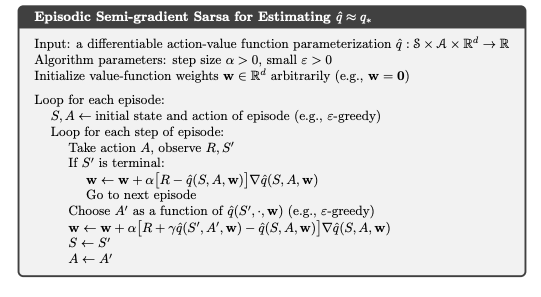